In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json 
import os

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import Bounds
from scipy.optimize import minimize

In [3]:
from data_utils import read_data, normalization, plot_results
from opt_utils import func, fit_curve 
from opt_utils import f_standard, get_x0_standard, unpack_standard
from opt_utils import f_exp, get_x0_exp, unpack_exp

In [4]:
bounds_standard = Bounds(
    np.array([0, 0, 0, 0, 0, 0], dtype=np.float64), 
    np.array([np.inf, np.inf, np.inf, np.inf, np.inf, np.inf], dtype=np.float64)
)

cons_standard = [
    {
        'type': 'eq',
        'fun': lambda x: np.array([x[0] + x[1] + x[2] - 1]),
        'jac': lambda x: np.array([1.0, 1.0, 1.0, 0, 0, 0])
    },
    {
        'type': 'ineq',
        'fun': lambda x: np.array([x[3] - x[4]]),
        'jac': lambda x: np.array([0, 0, 0, 1.0, -1.0, 0])
    },
]

In [5]:
bounds_exp = Bounds(
    np.array([0, 0], dtype=np.float64), 
    np.array([np.inf, np.inf], dtype=np.float64)
)

cons_exp = []

In [6]:
source_path = 'CFs'

  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/2/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/12/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/1/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/8/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/3/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/7/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/10/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/6/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/4/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/14/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/9/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/11/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/5/down_part900/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/5/upper_part900/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/13/down/results


  0%|          | 0/12 [00:00<?, ?it/s]

Current directory: CFs/13/upper/results


100%|██████████| 12/12 [00:24<00:00,  1.88s/it]


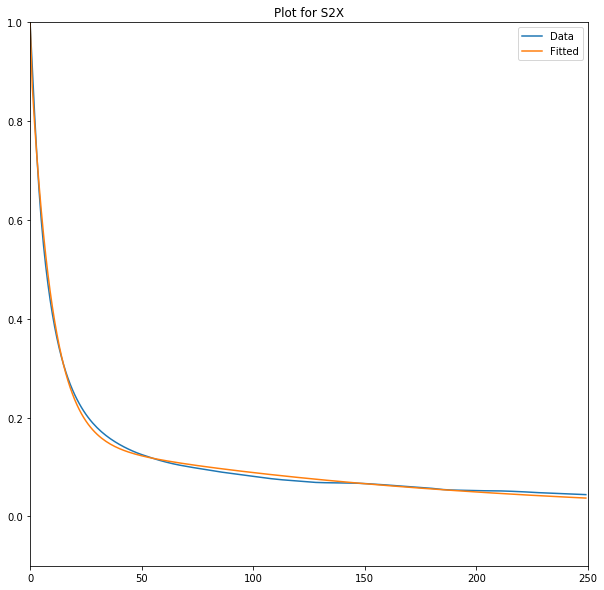

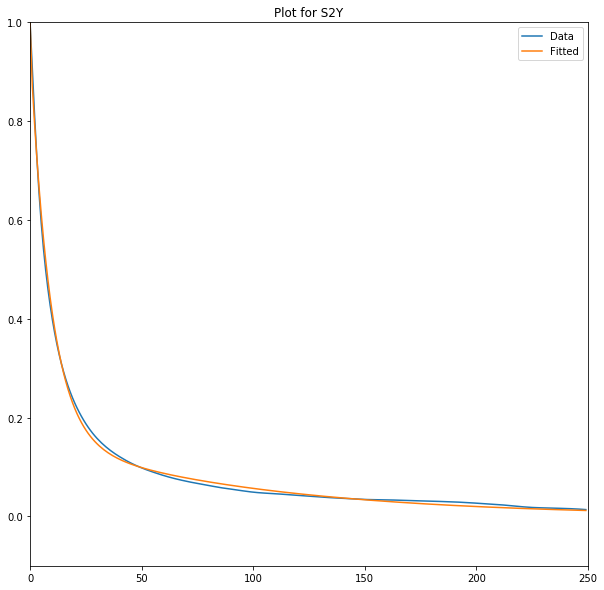

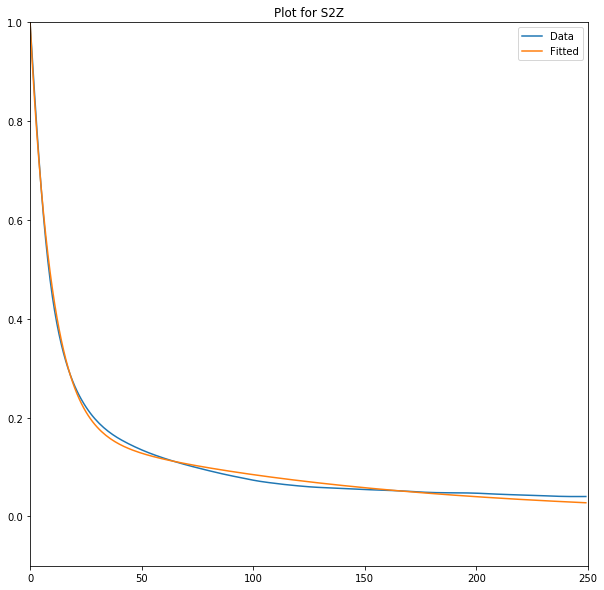

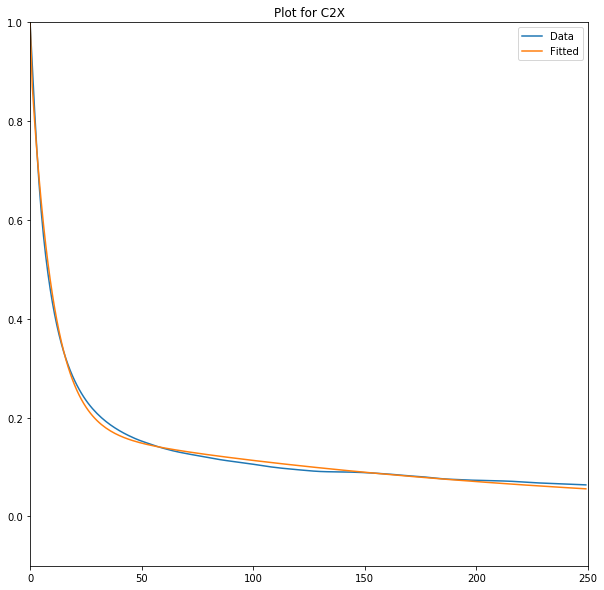

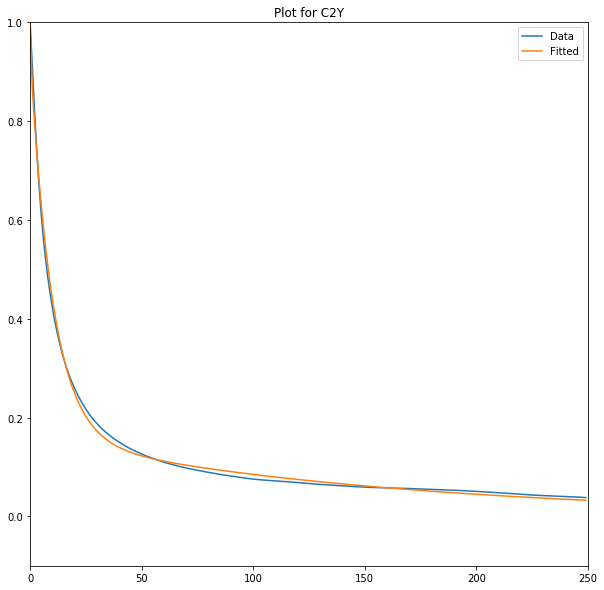

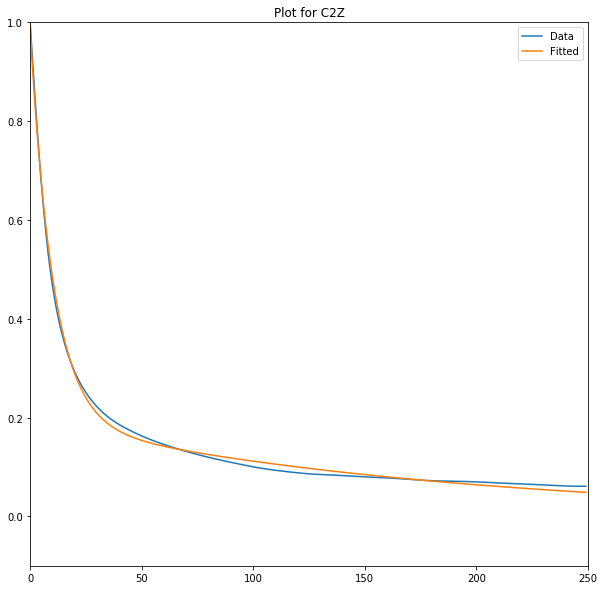

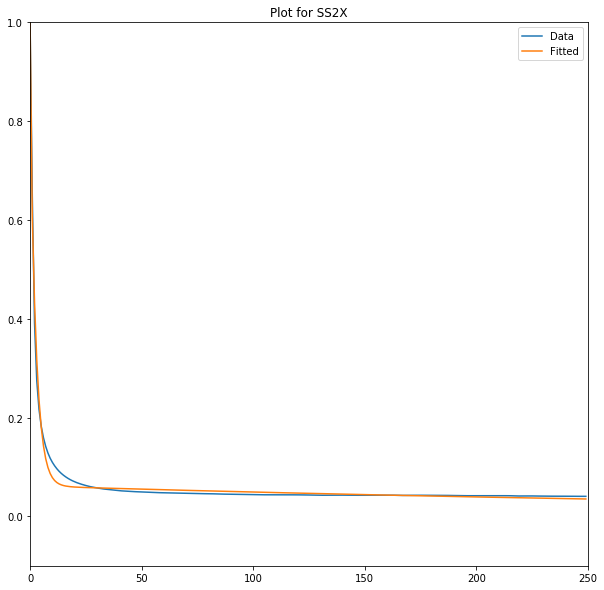

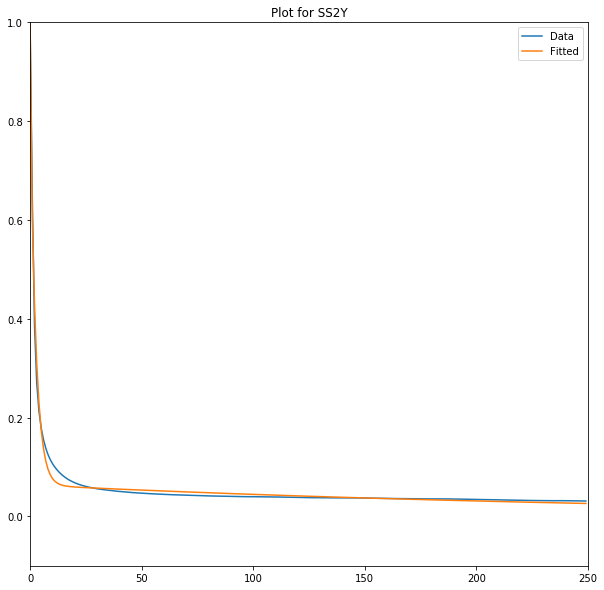

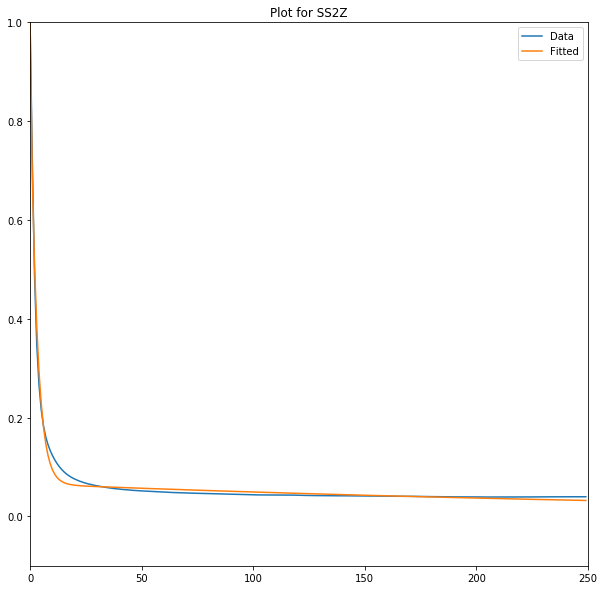

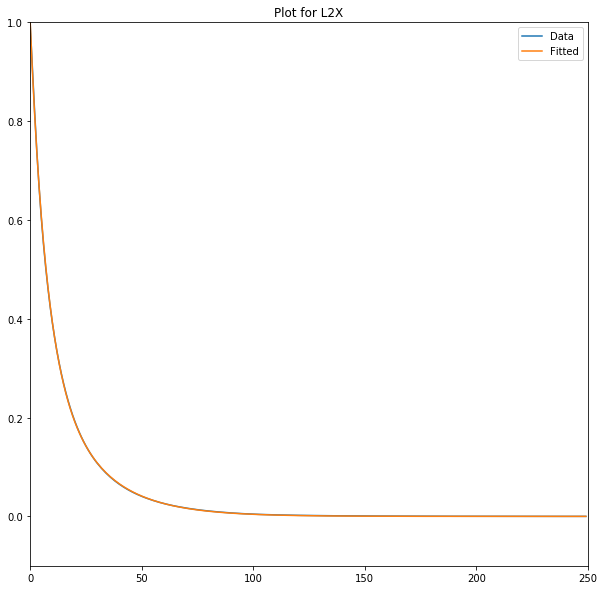

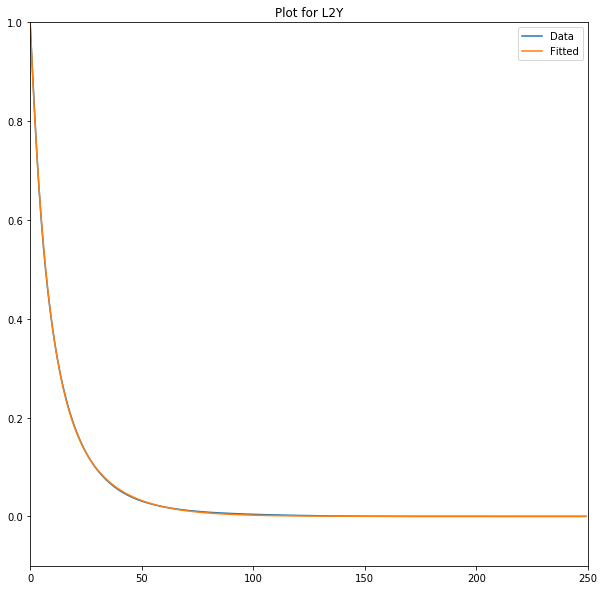

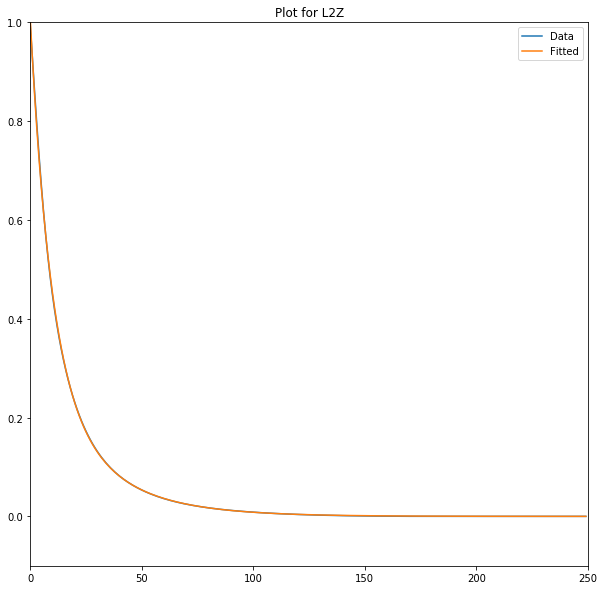

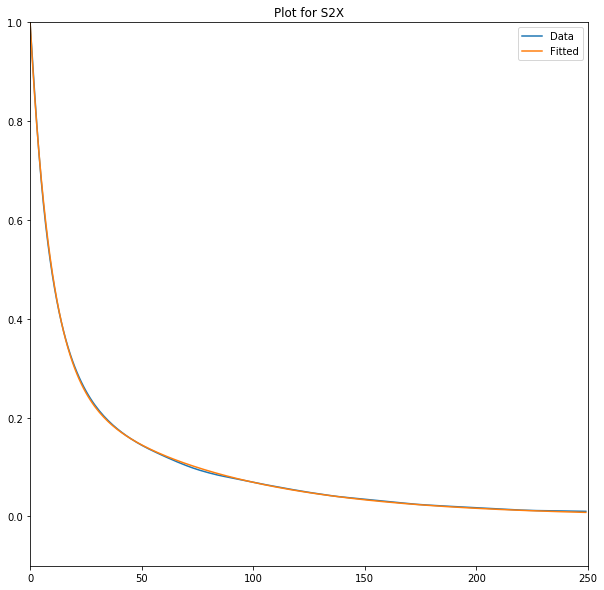

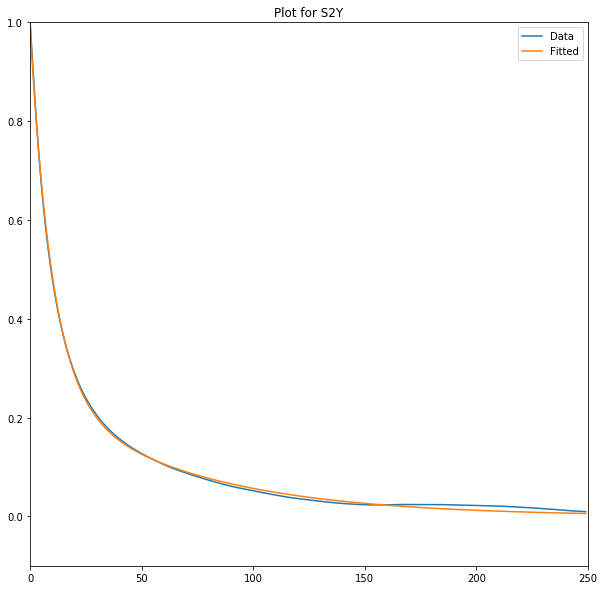

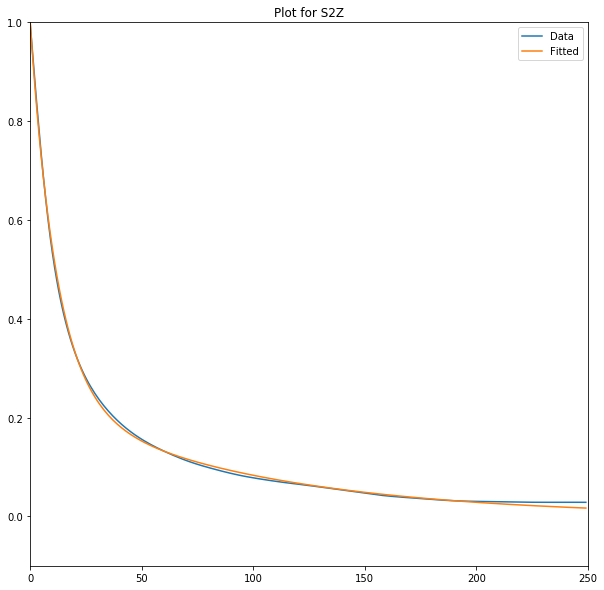

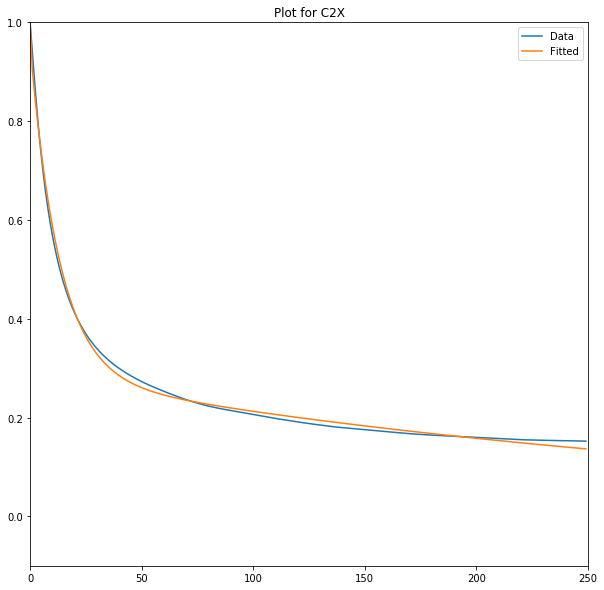

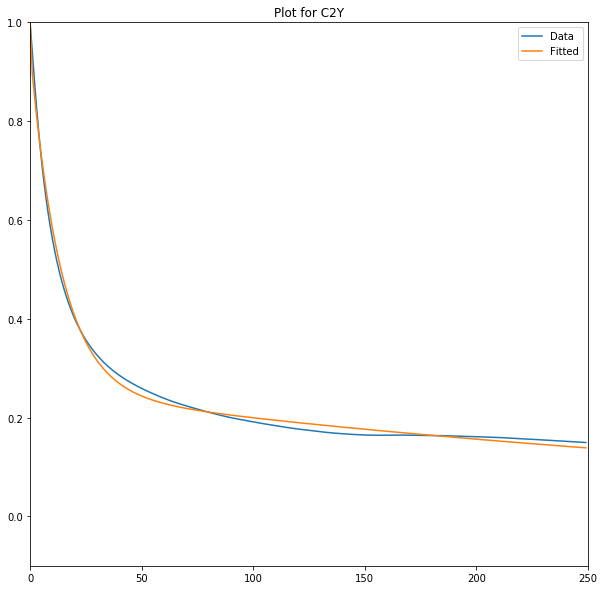

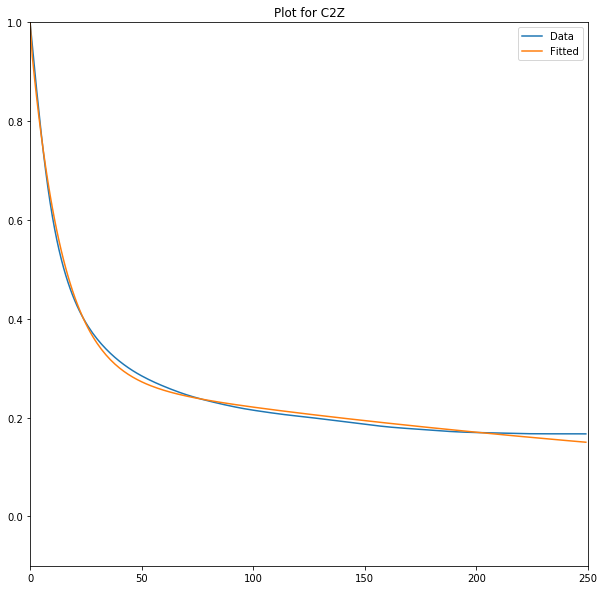

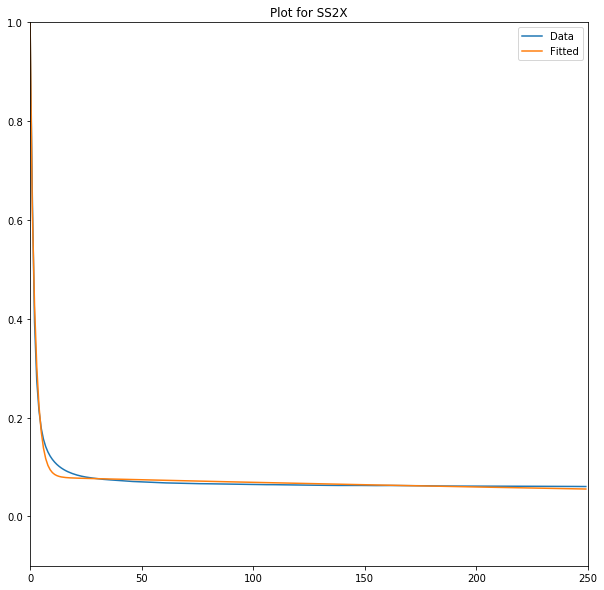

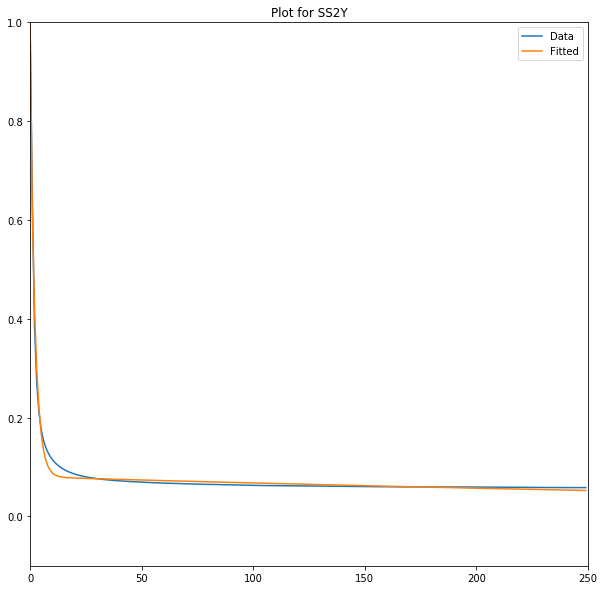

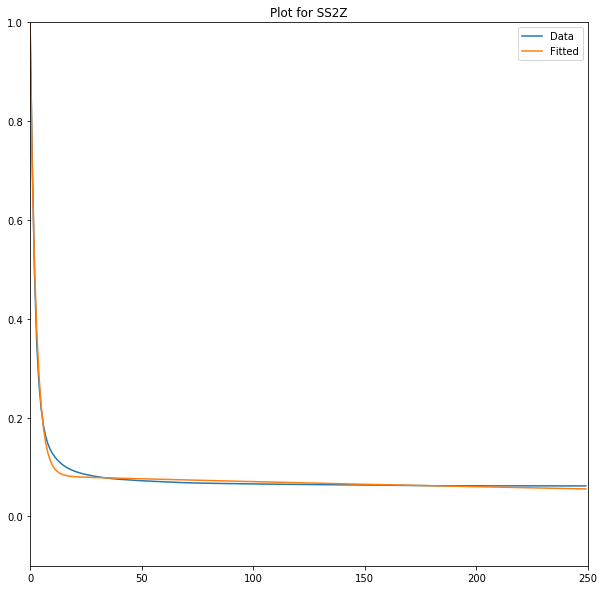

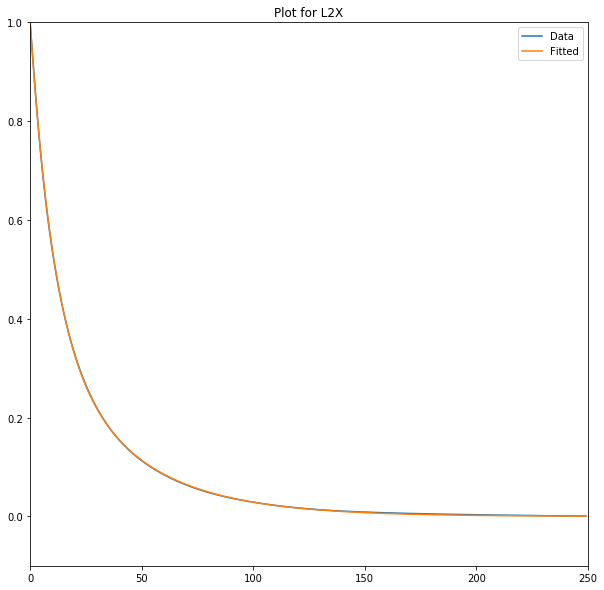

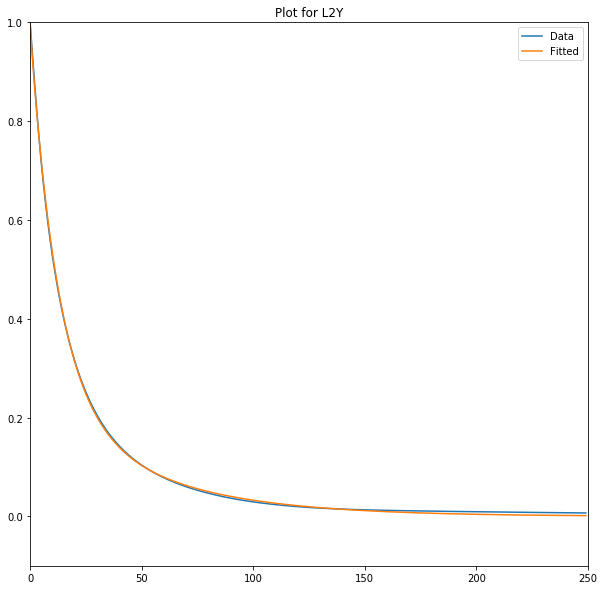

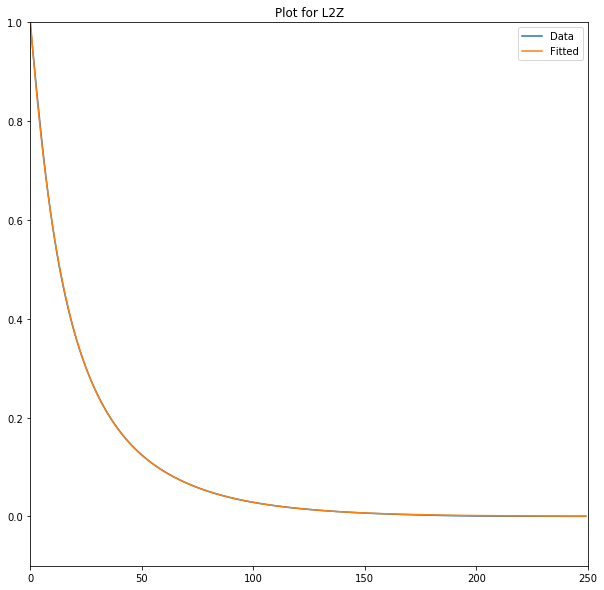

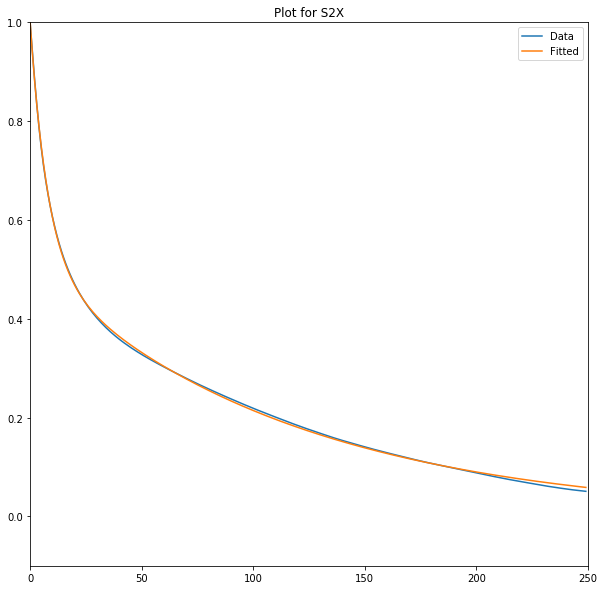

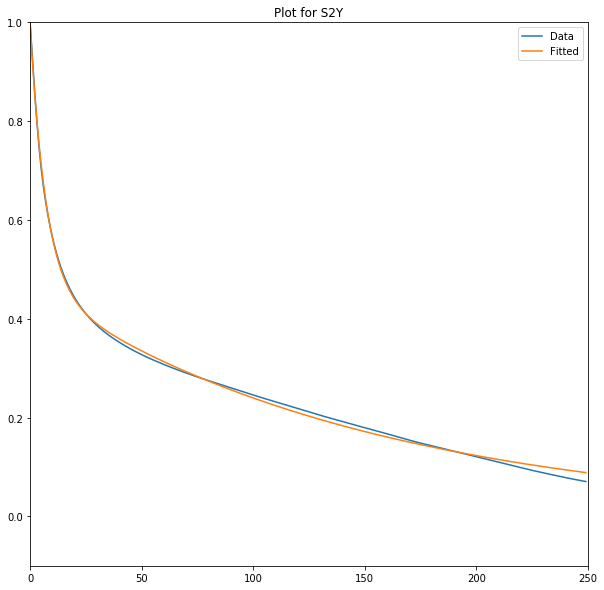

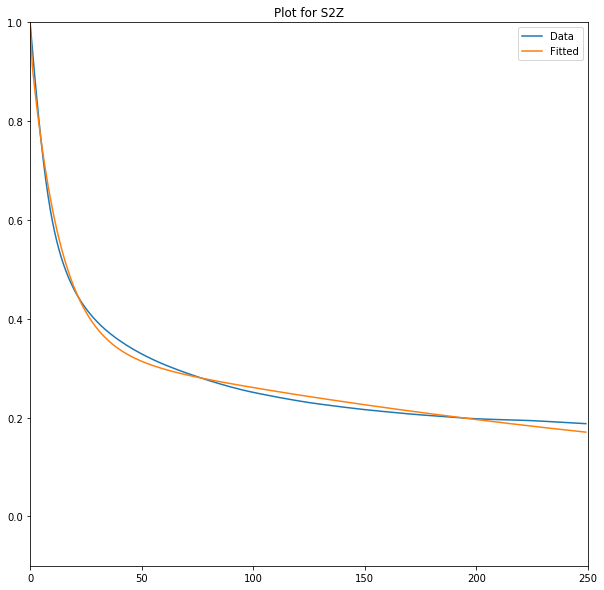

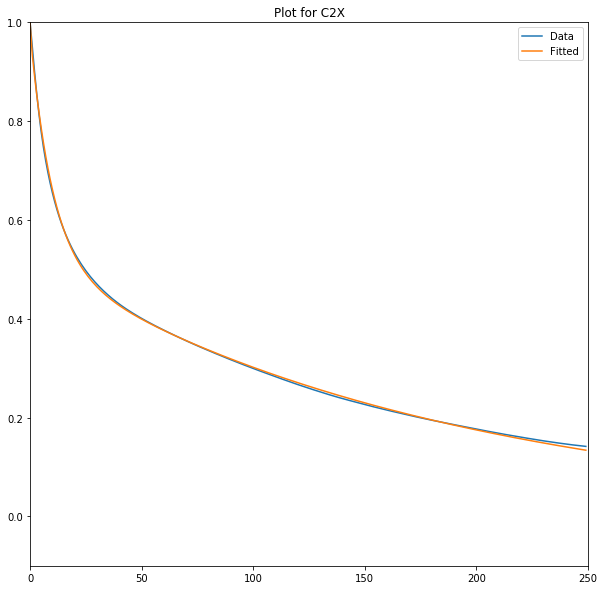

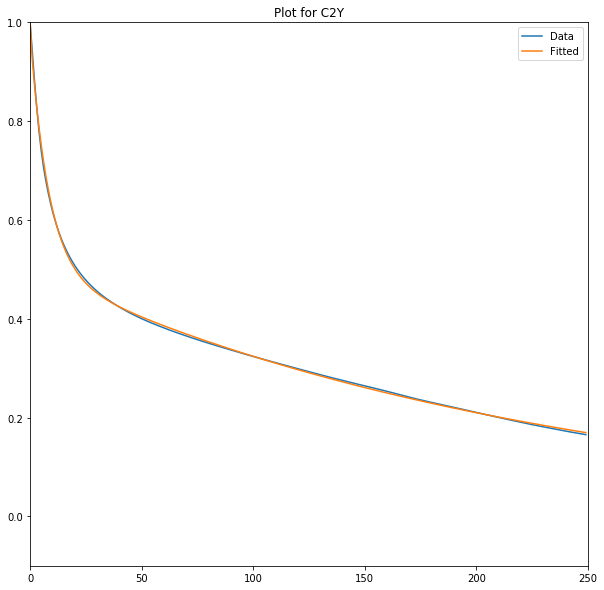

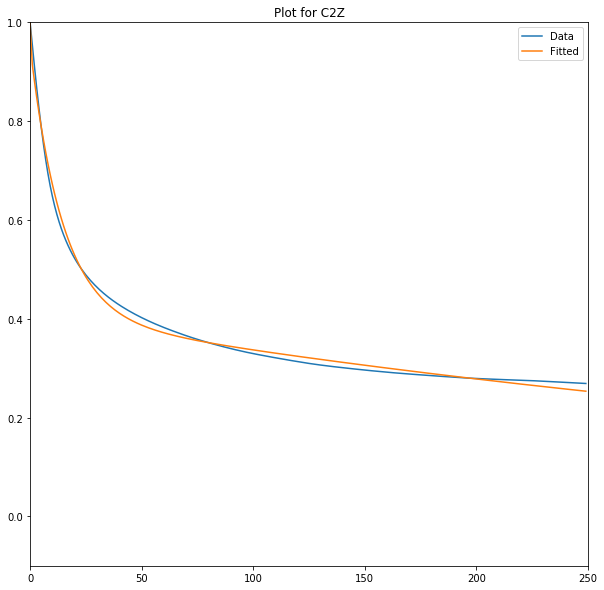

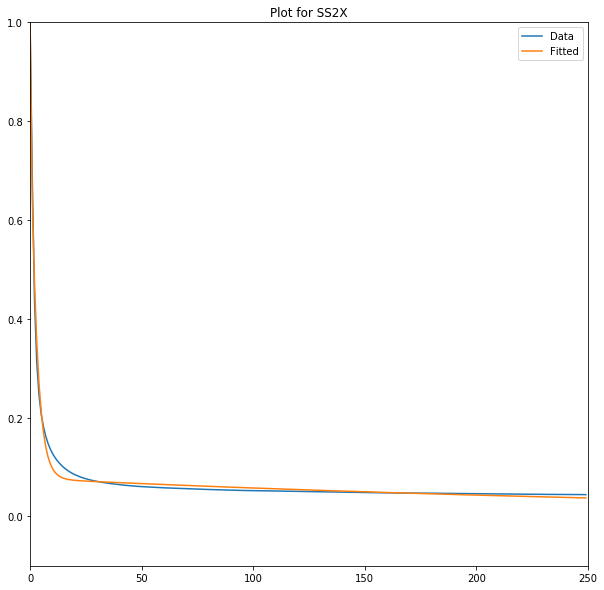

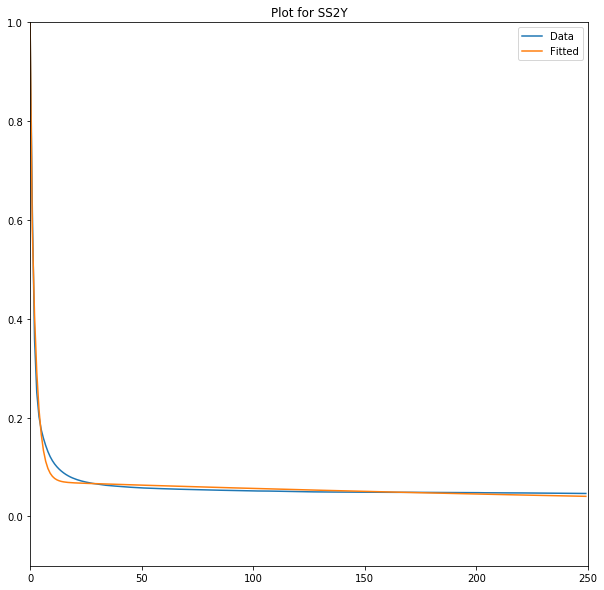

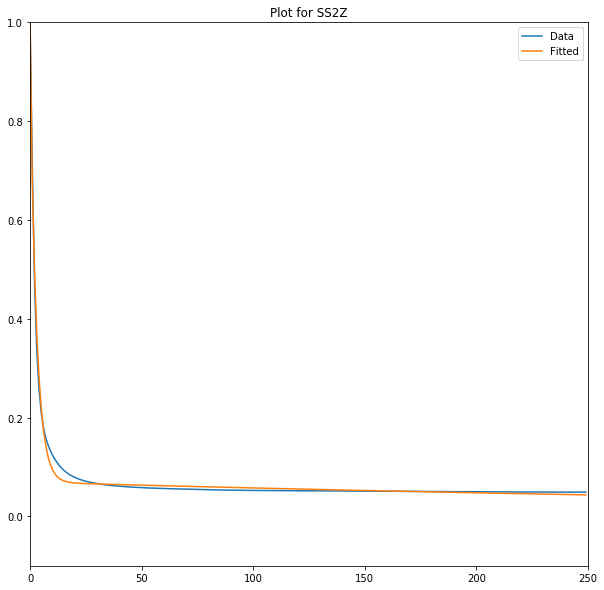

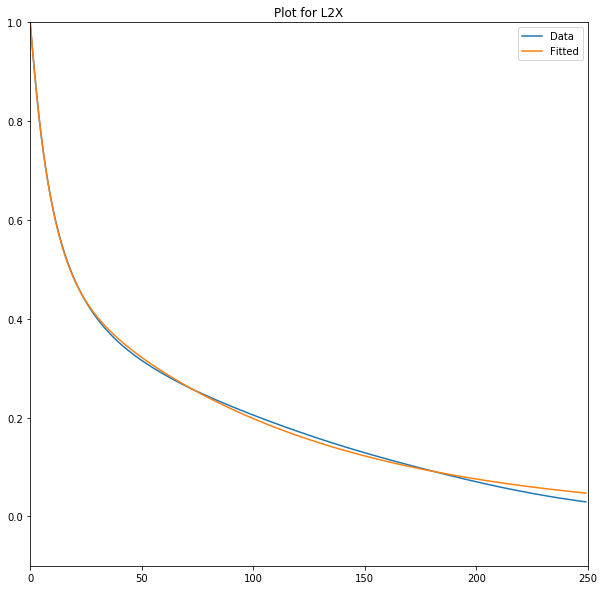

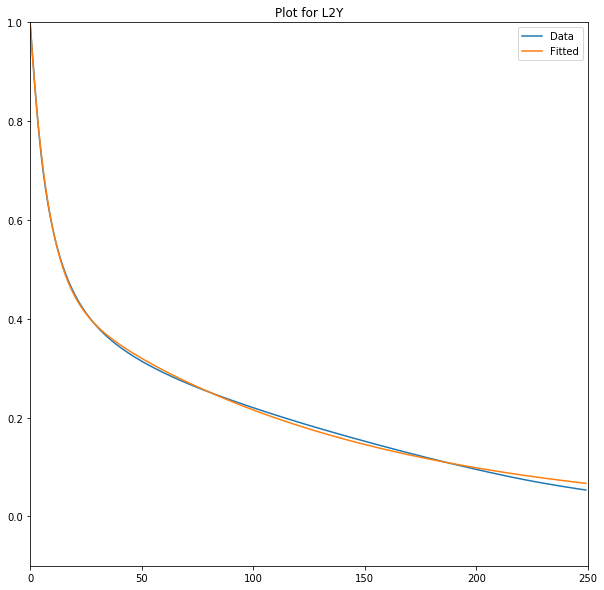

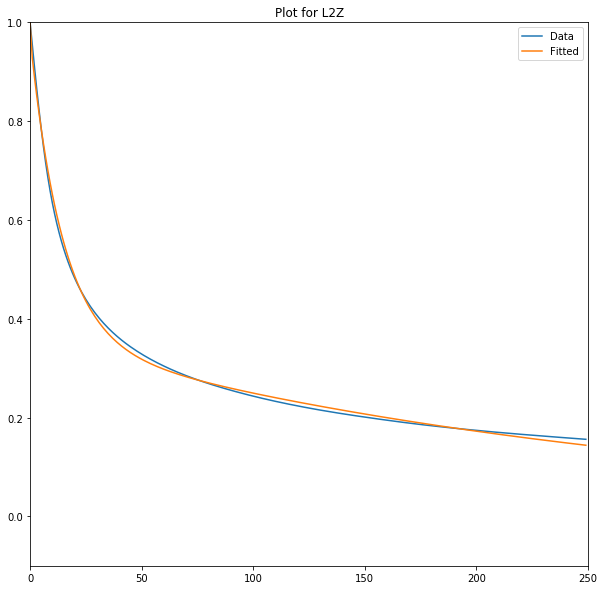

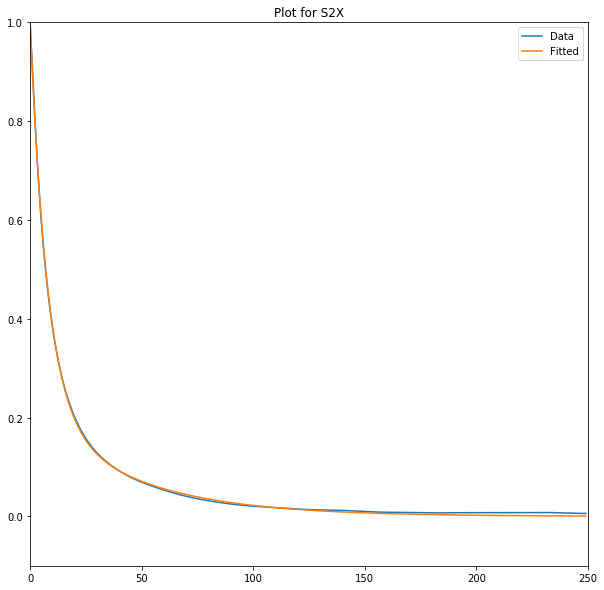

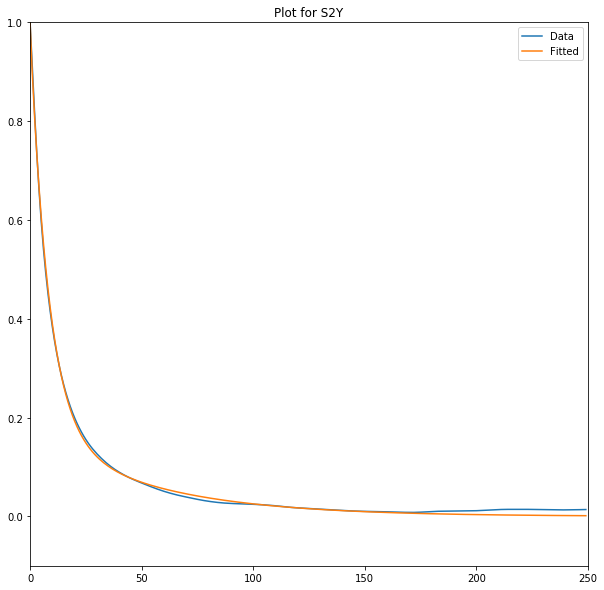

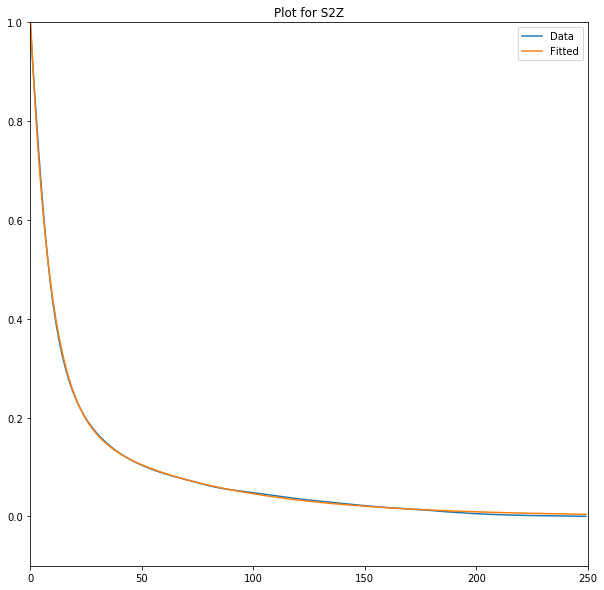

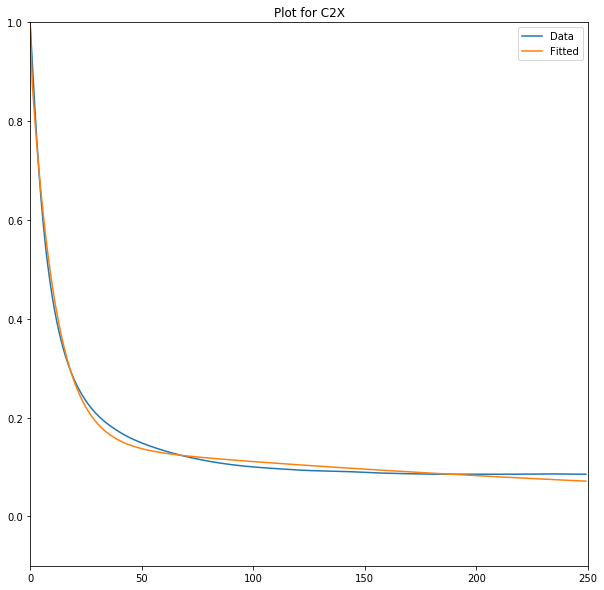

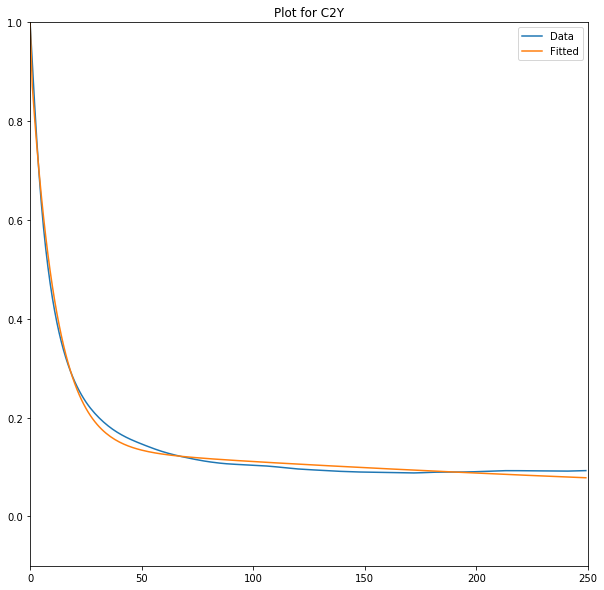

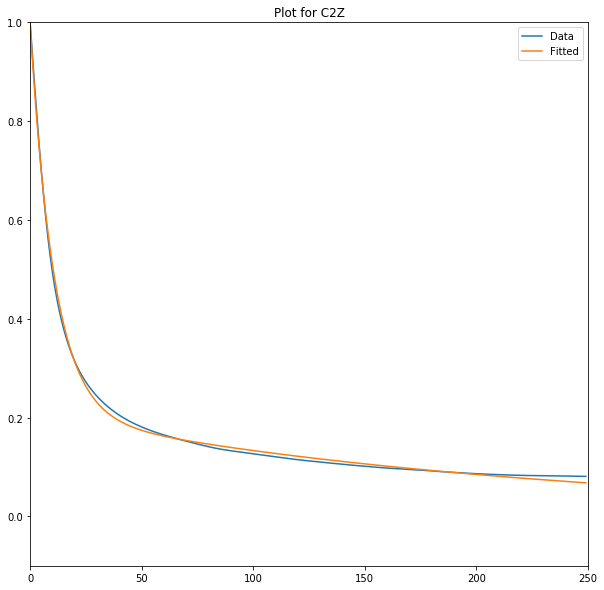

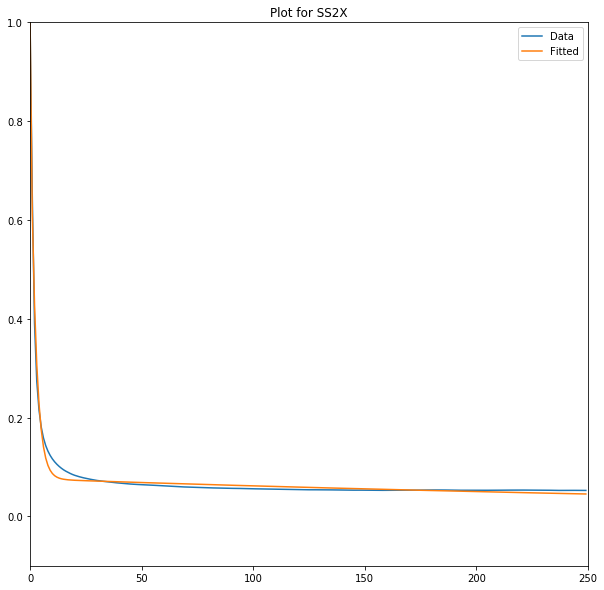

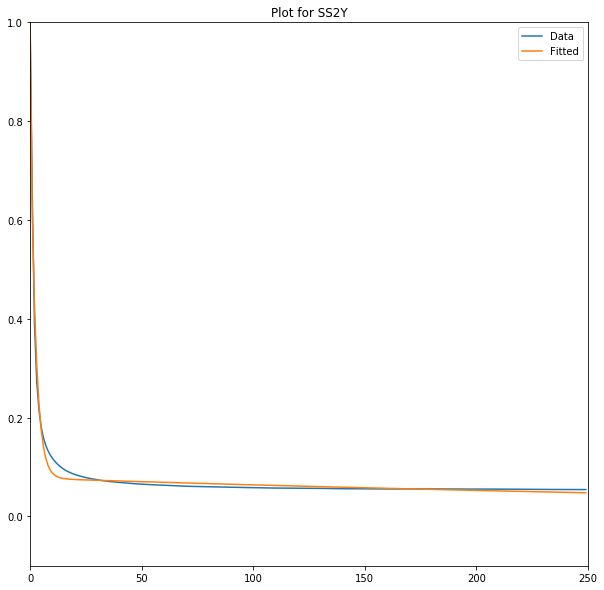

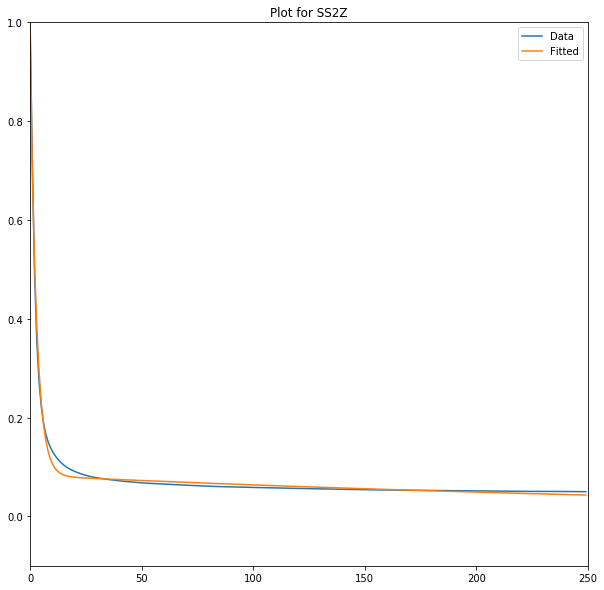

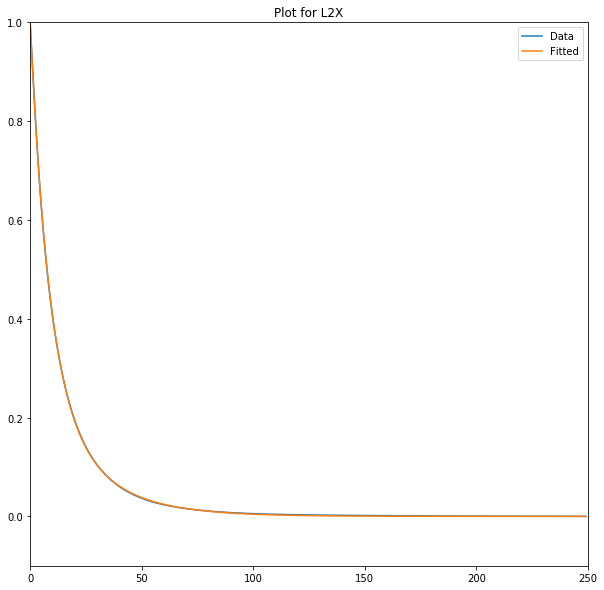

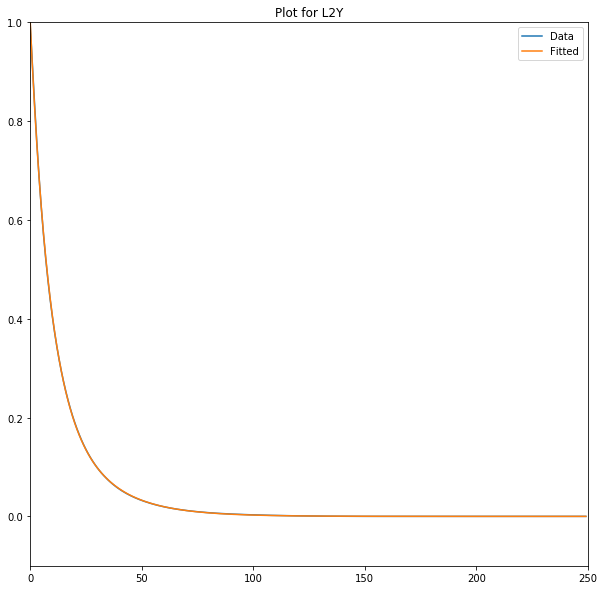

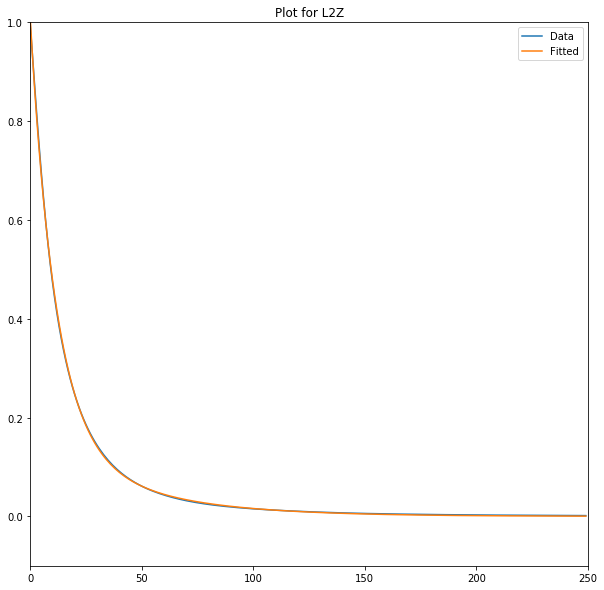

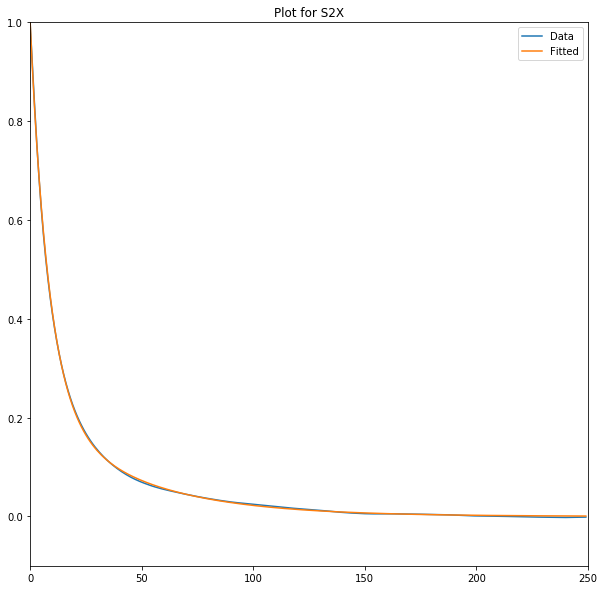

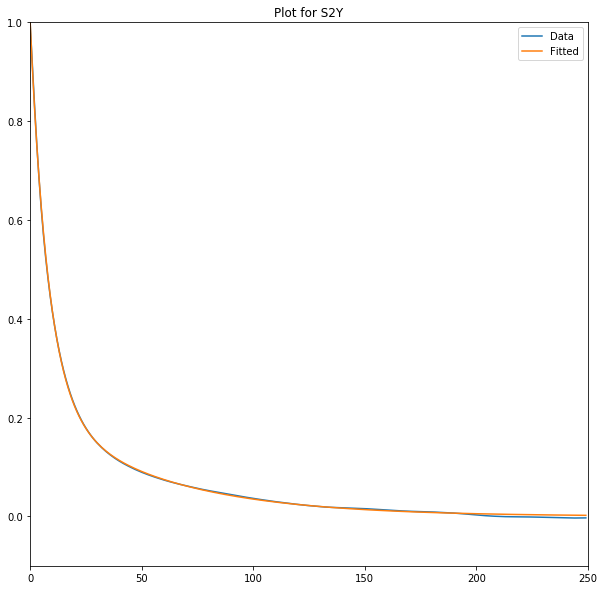

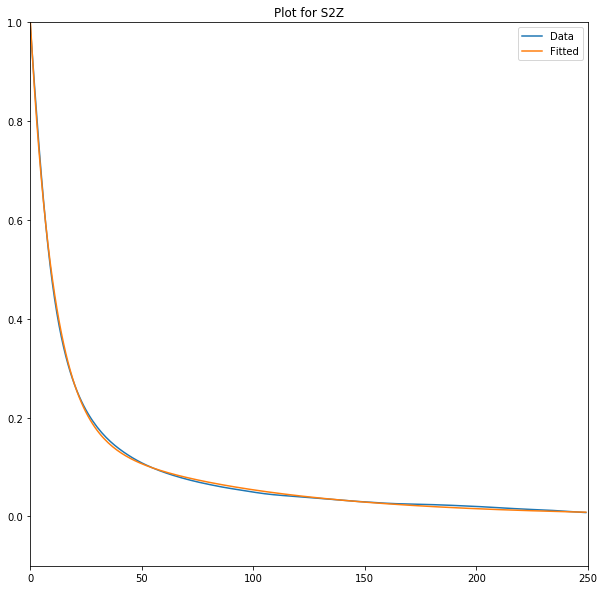

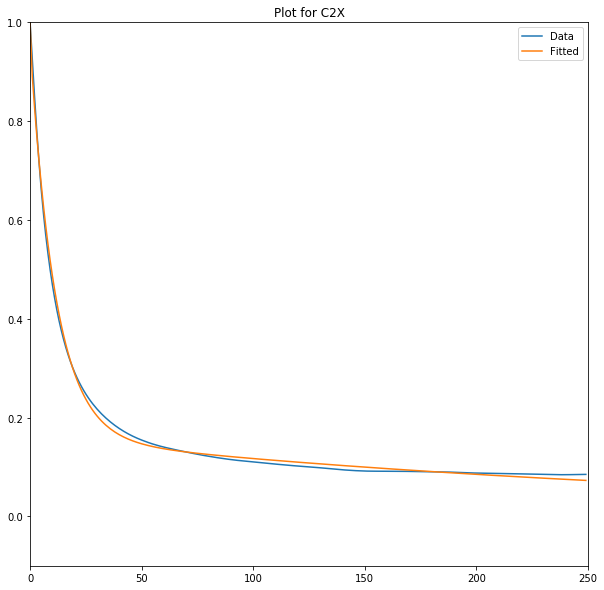

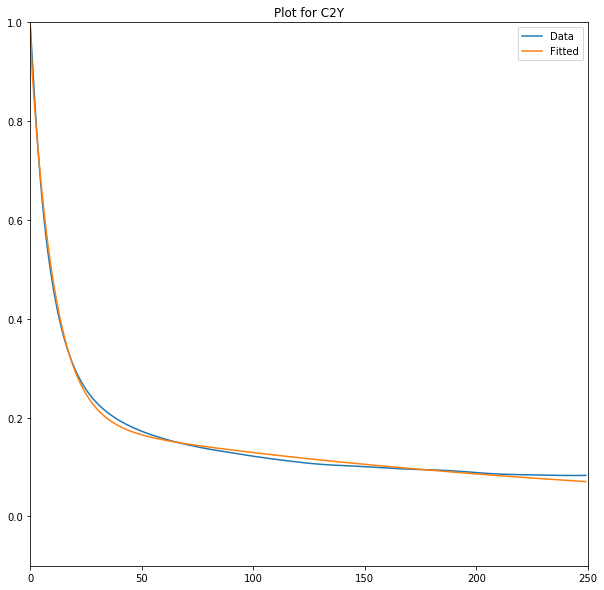

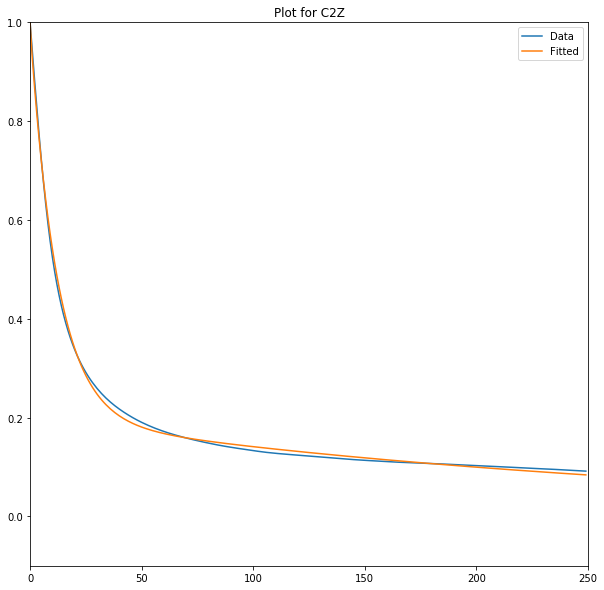

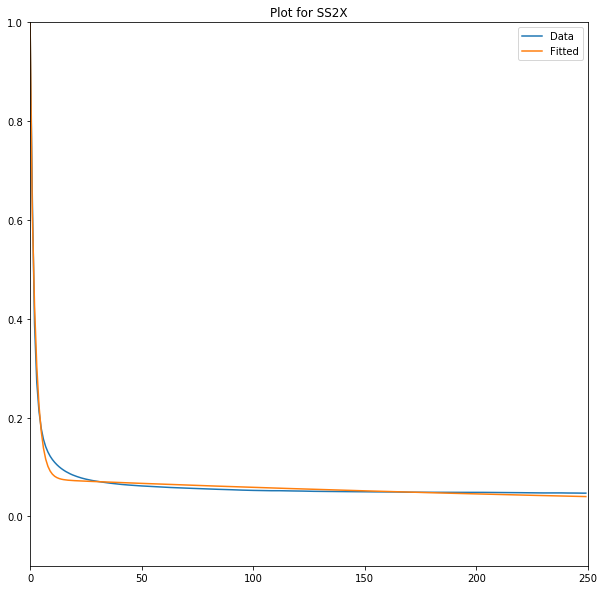

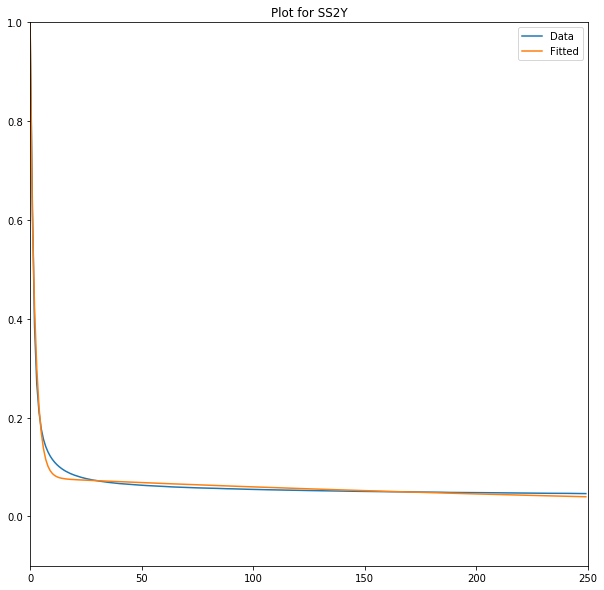

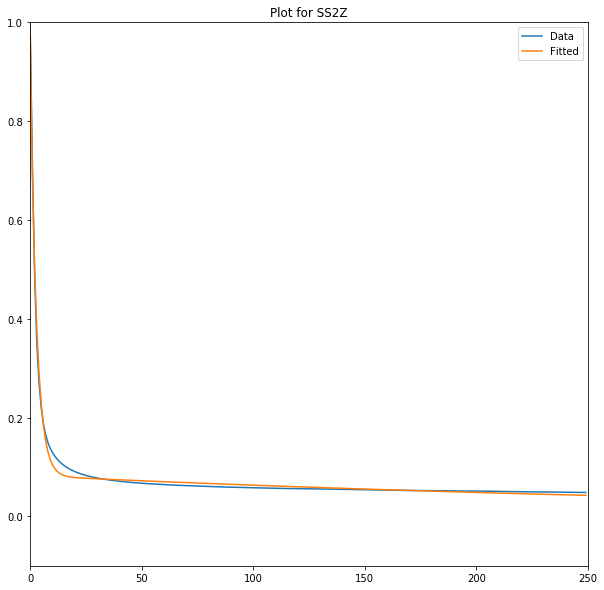

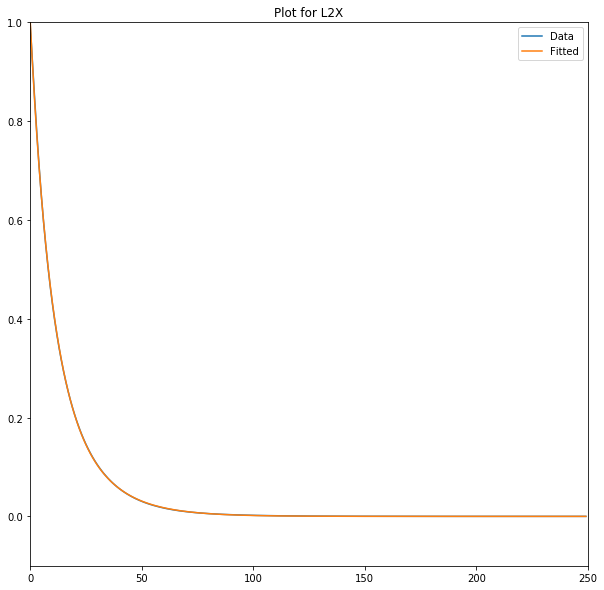

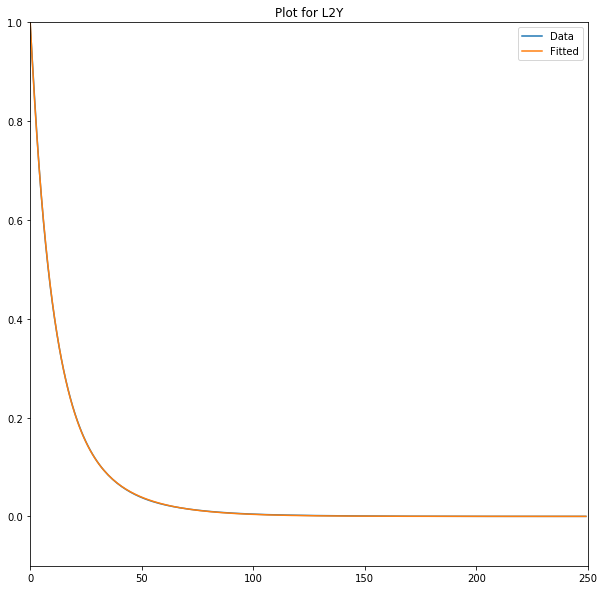

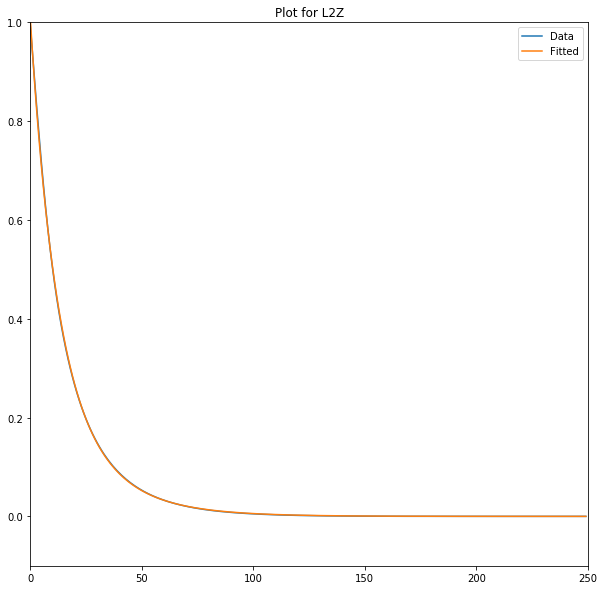

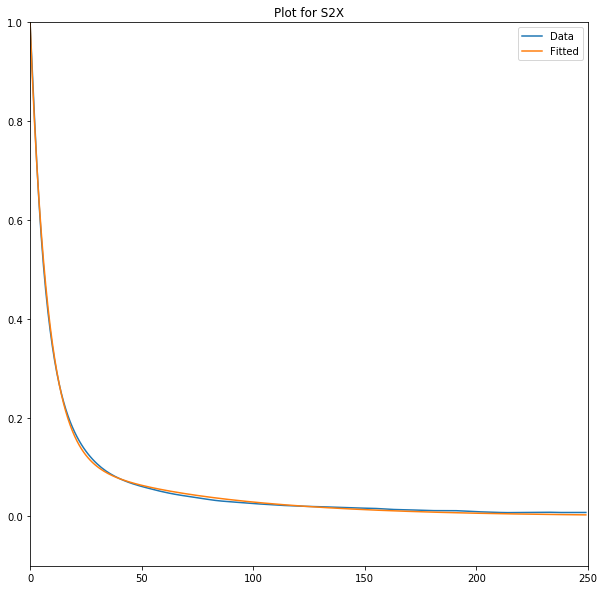

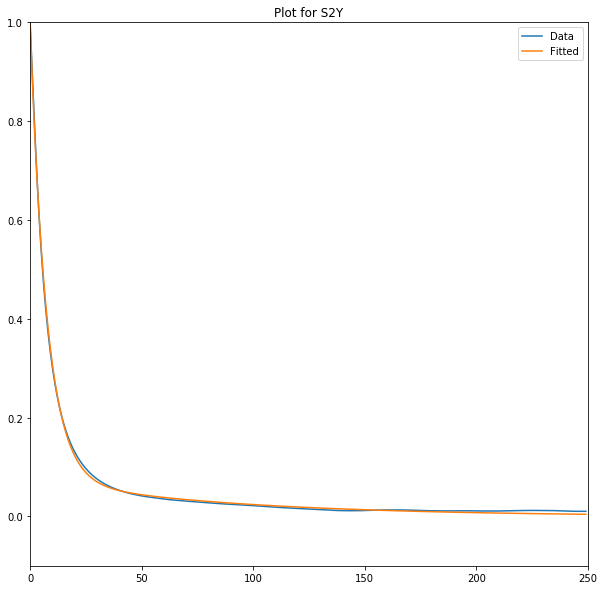

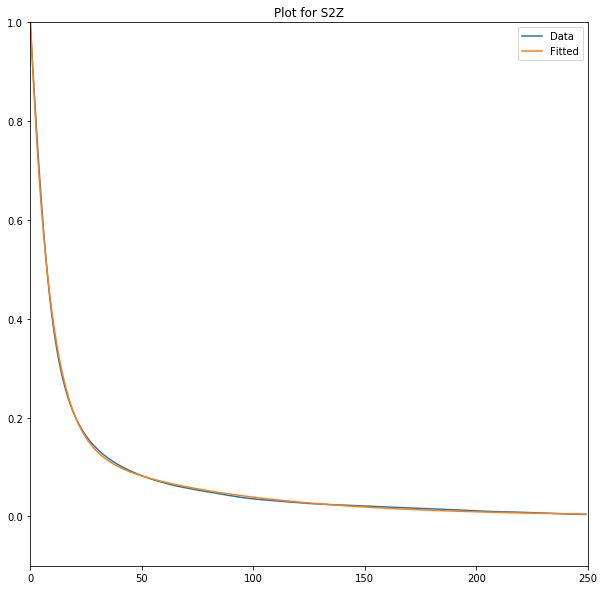

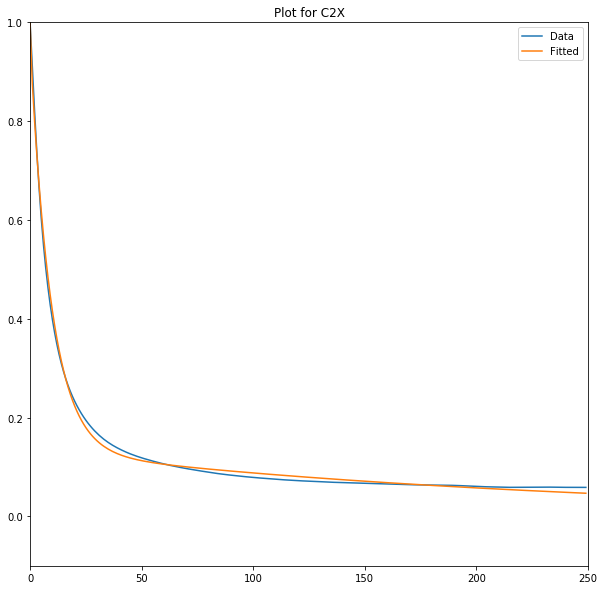

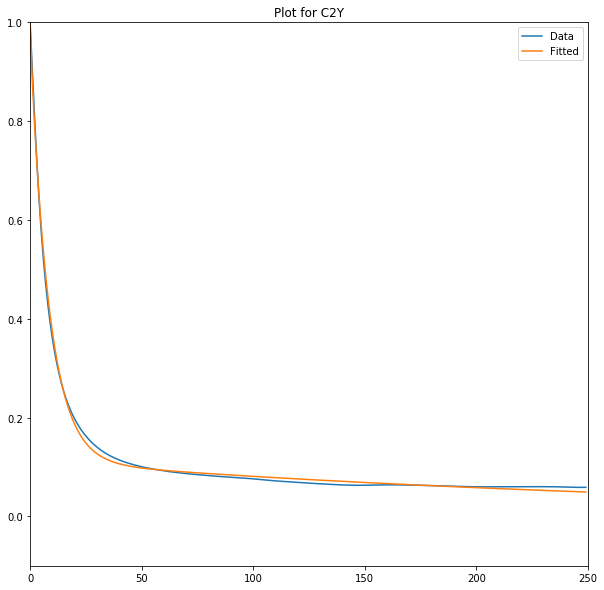

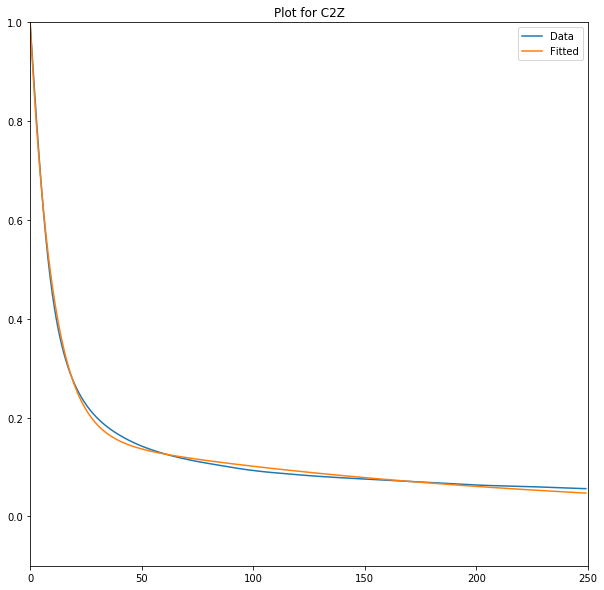

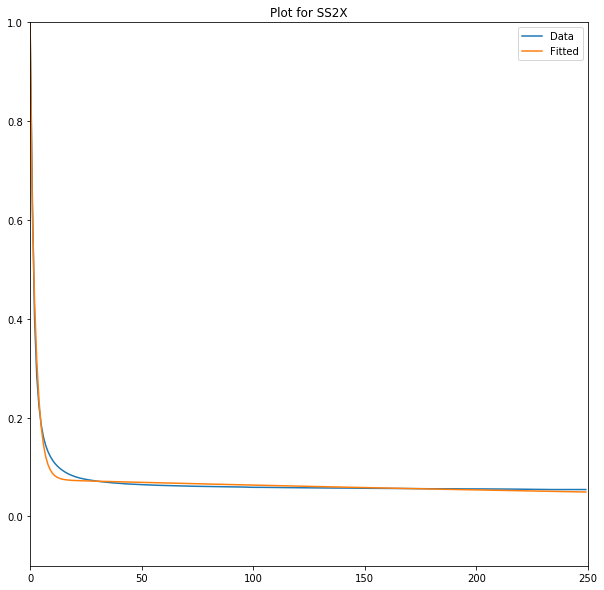

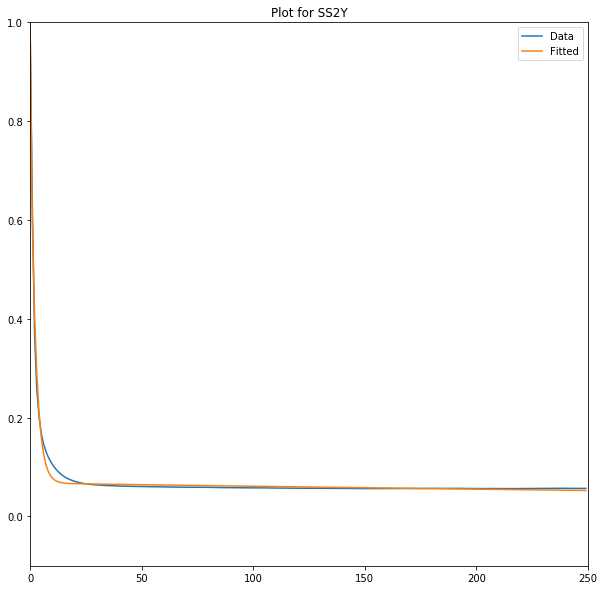

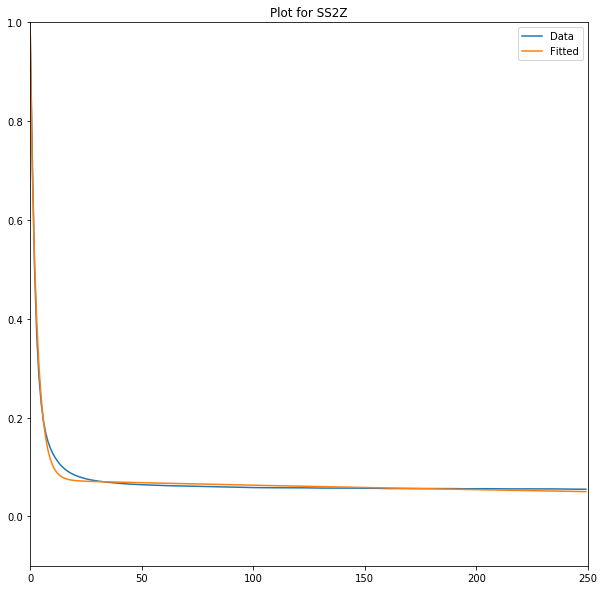

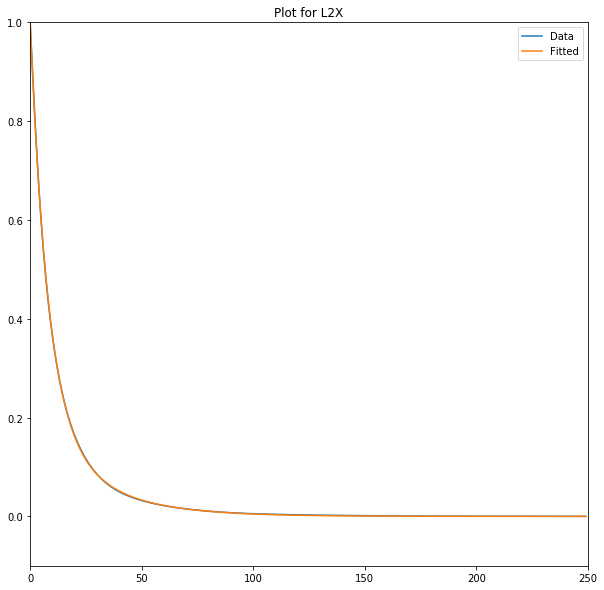

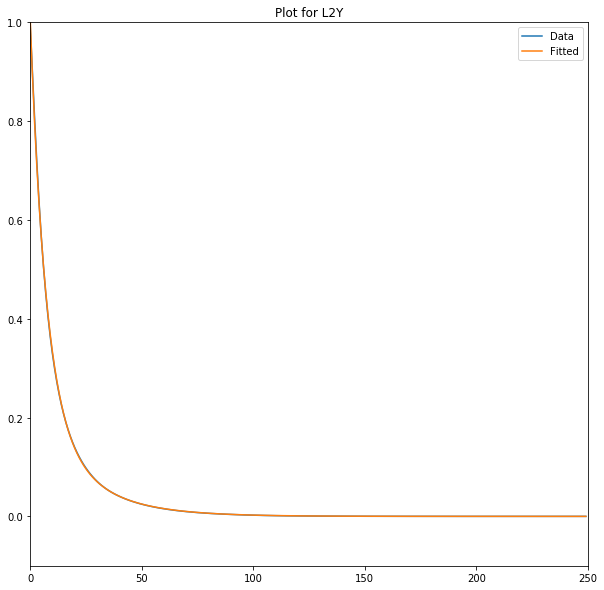

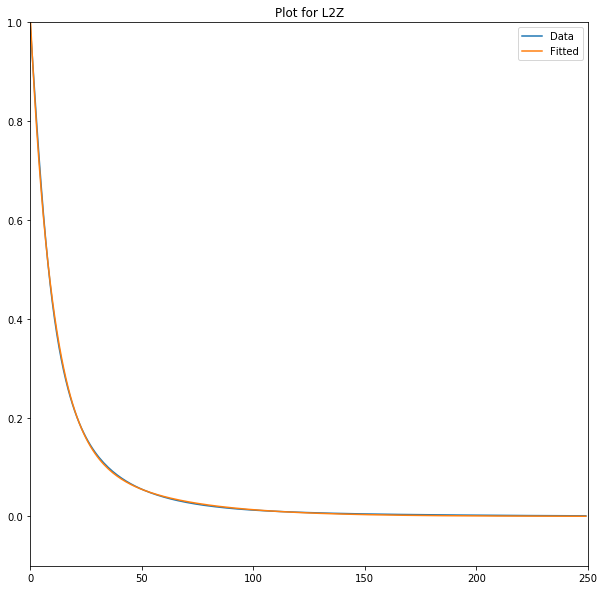

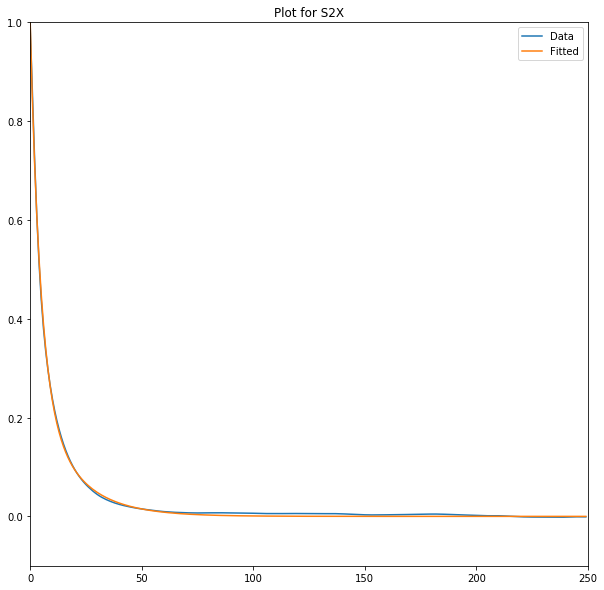

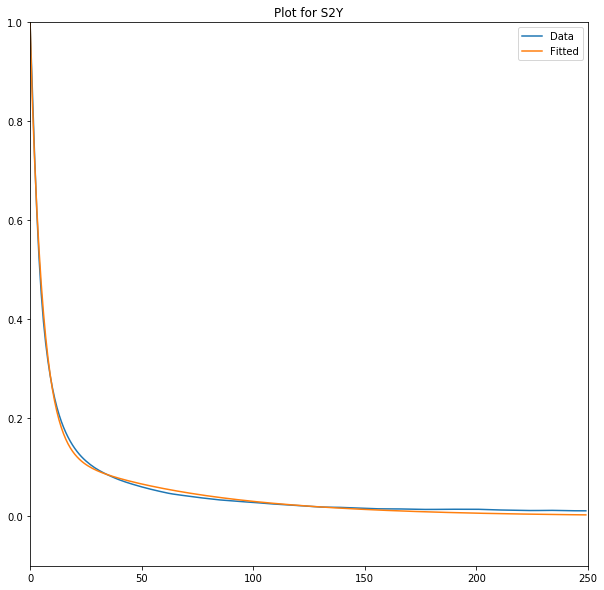

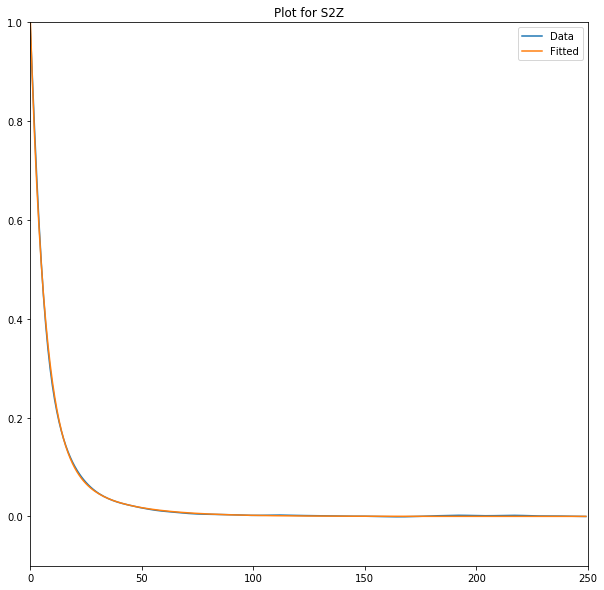

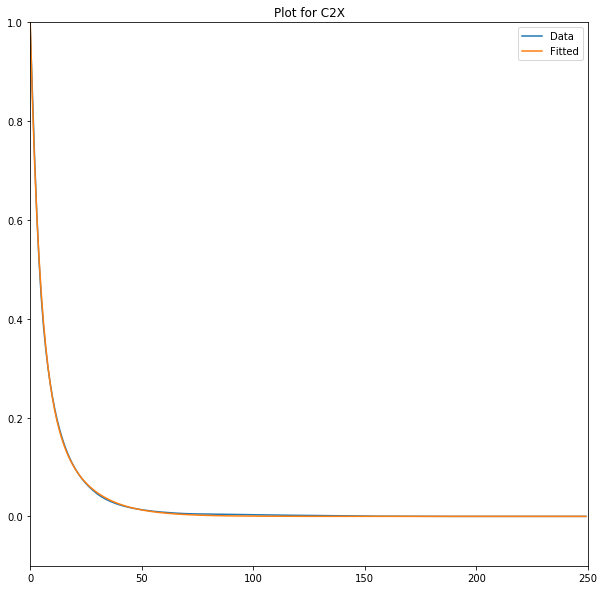

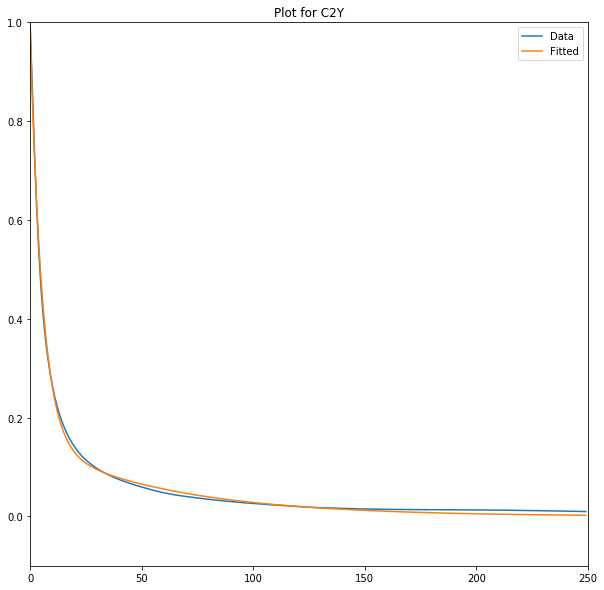

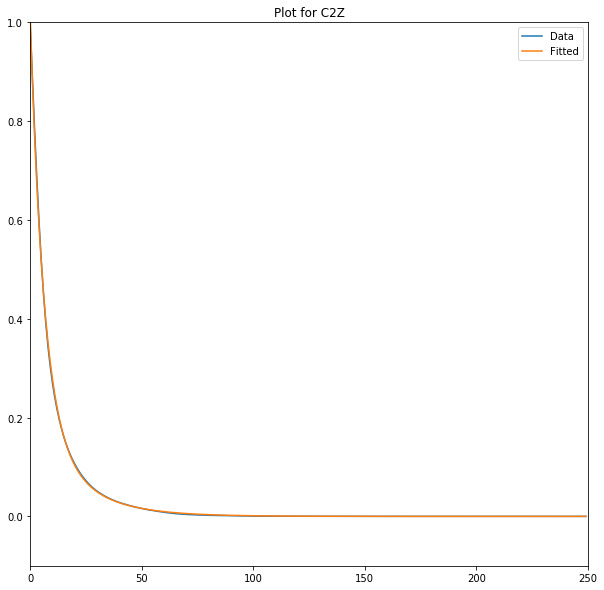

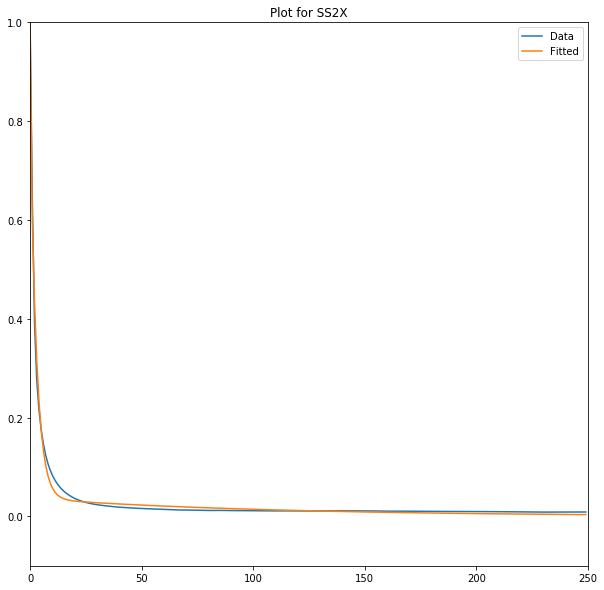

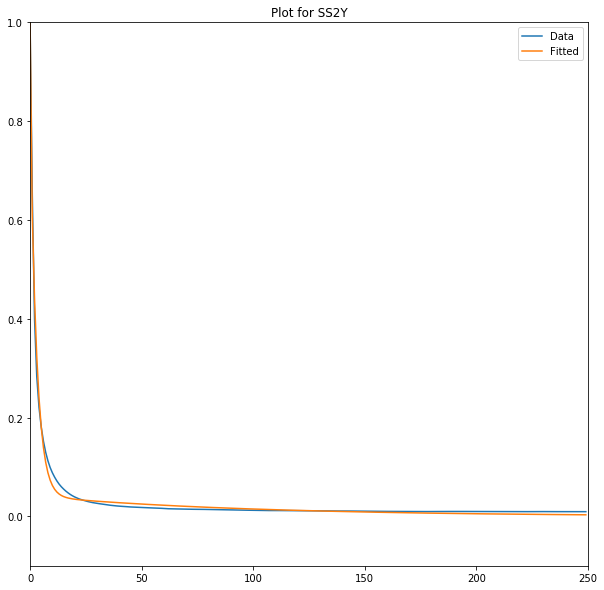

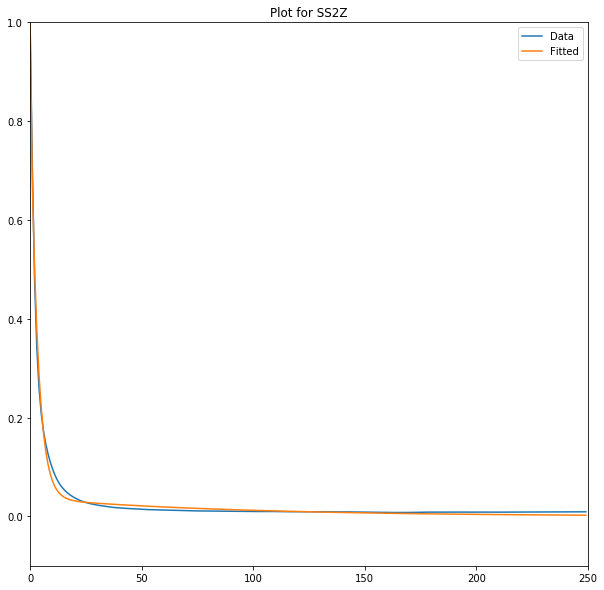

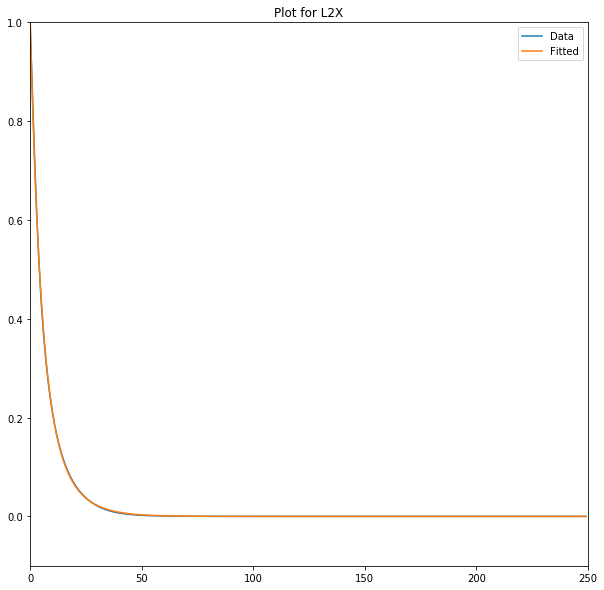

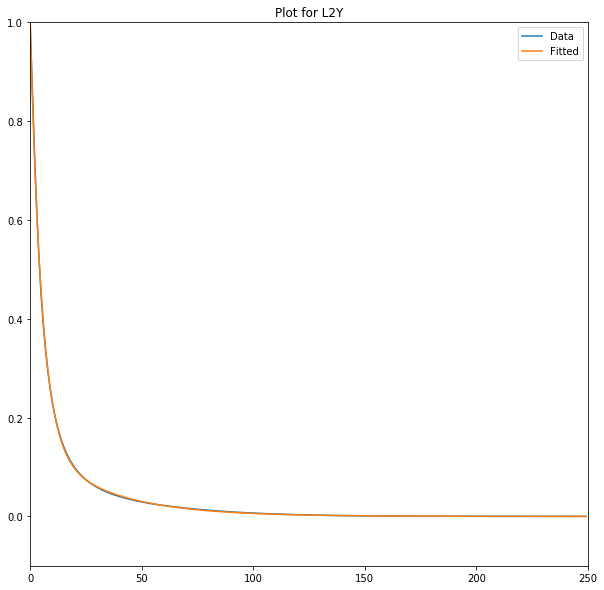

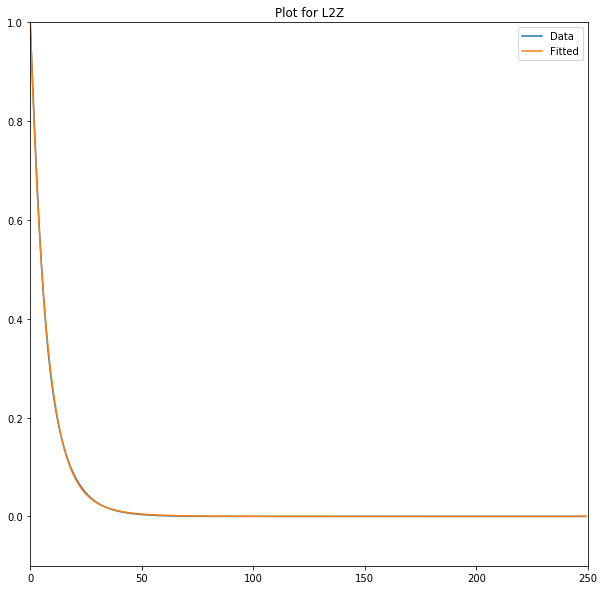

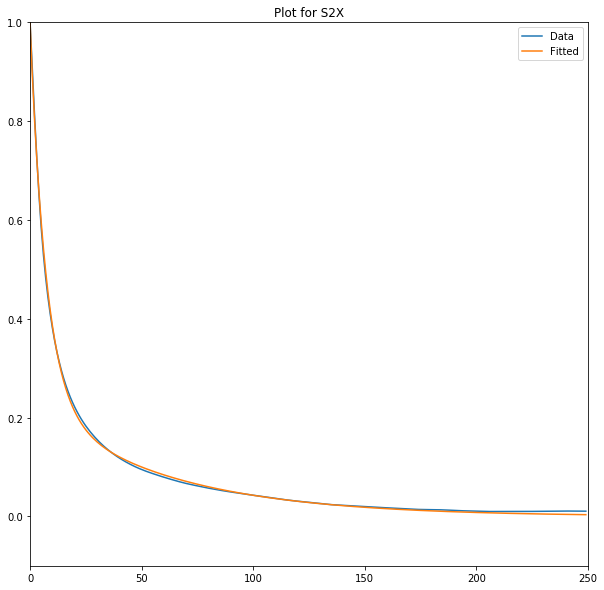

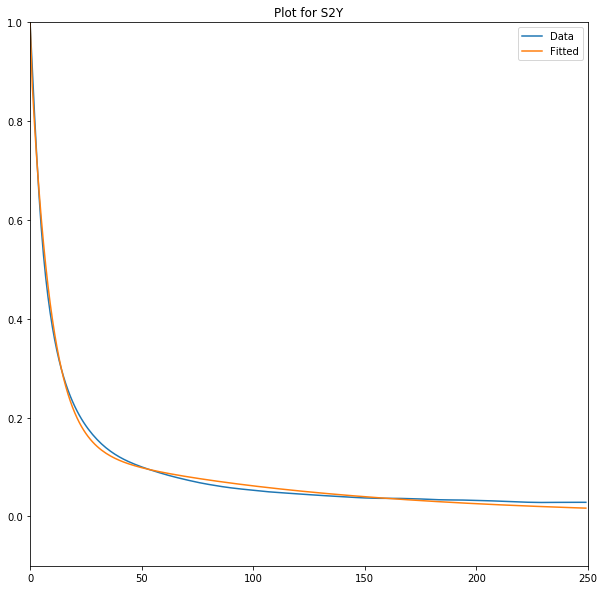

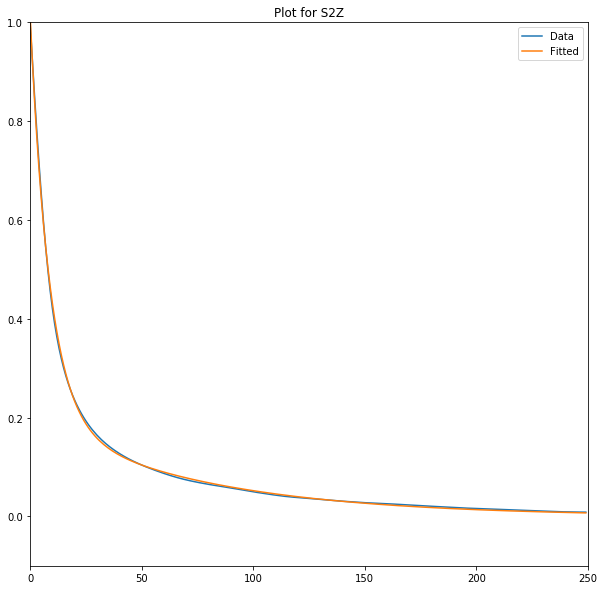

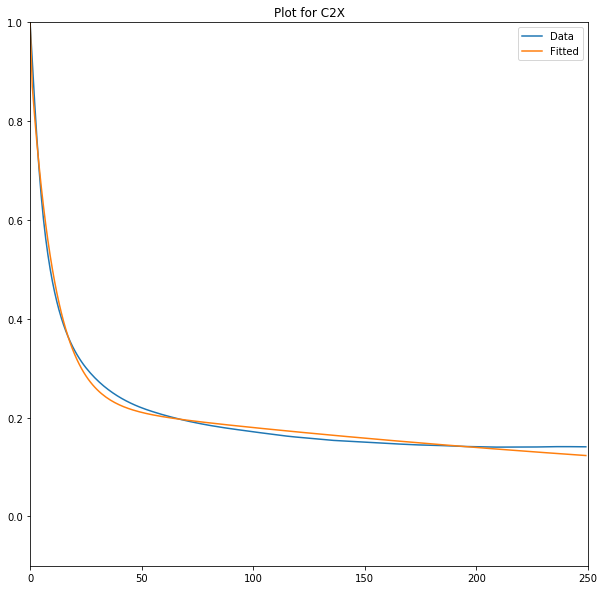

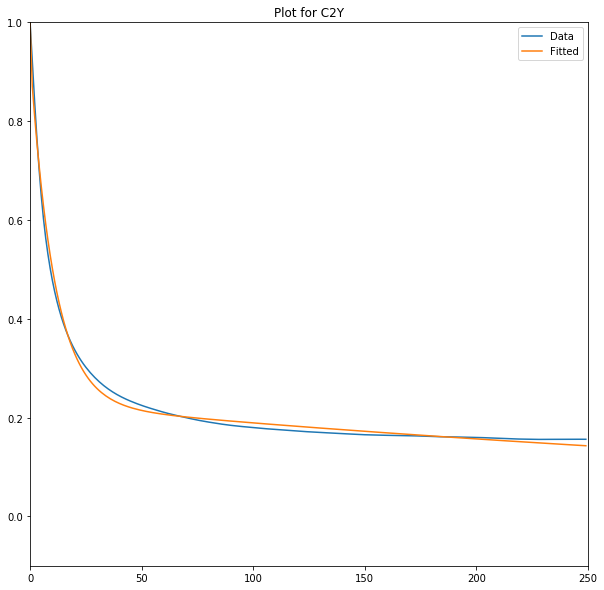

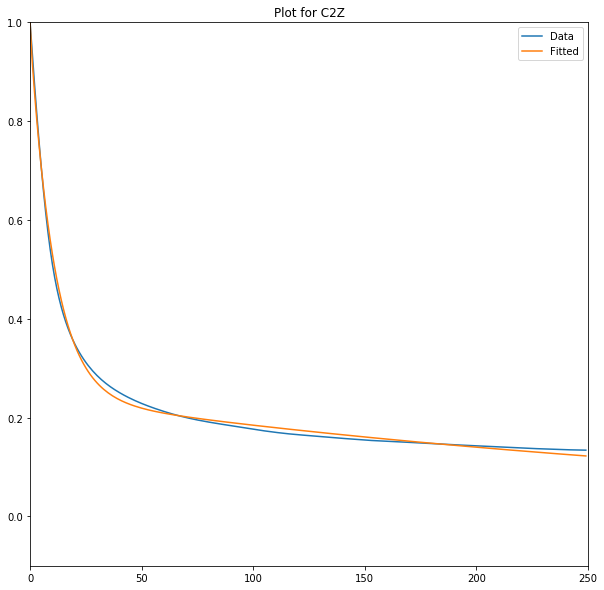

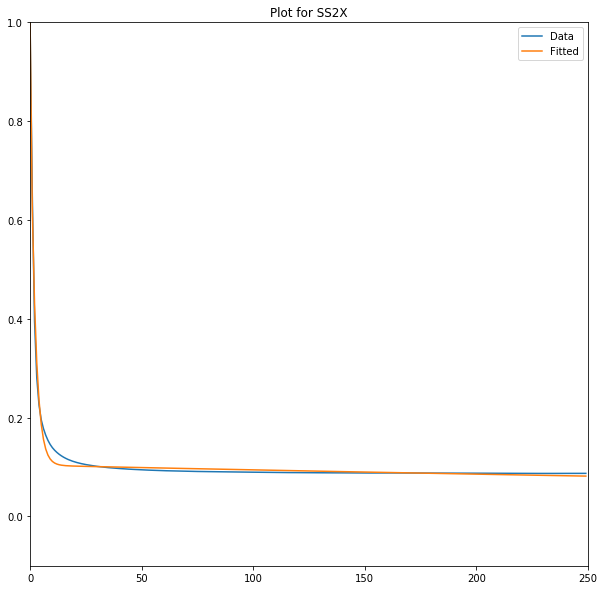

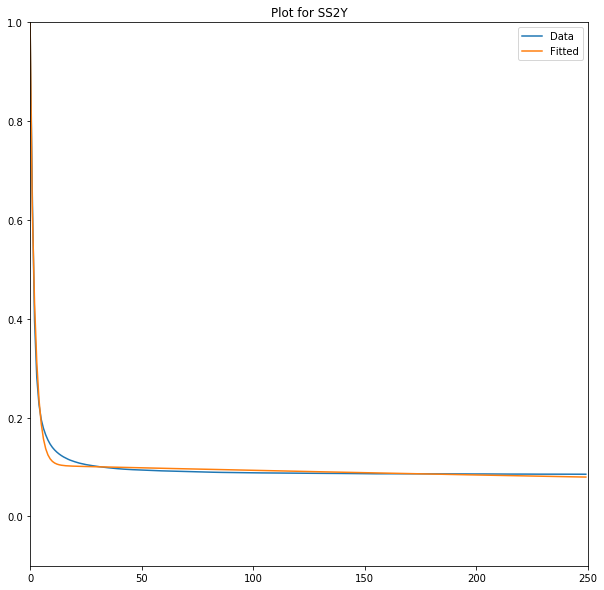

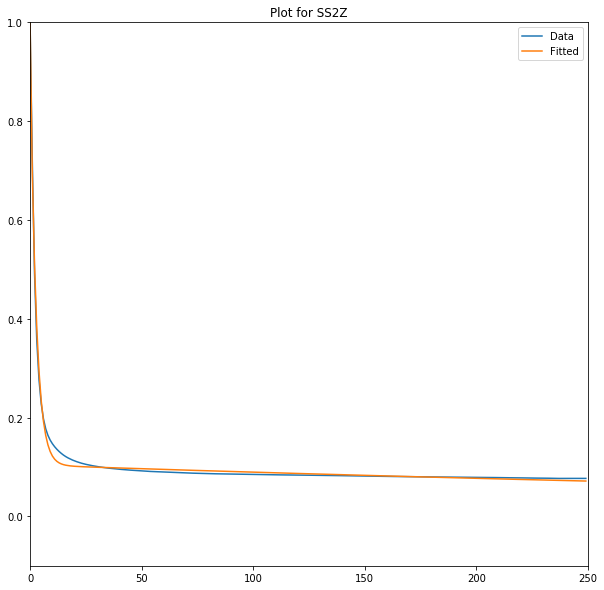

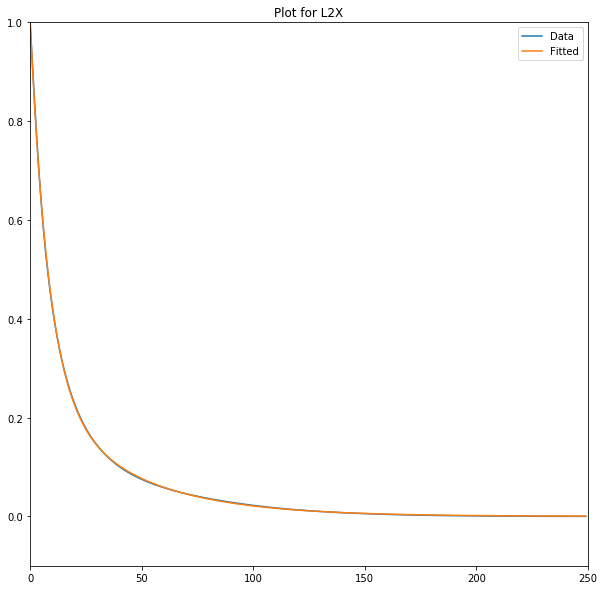

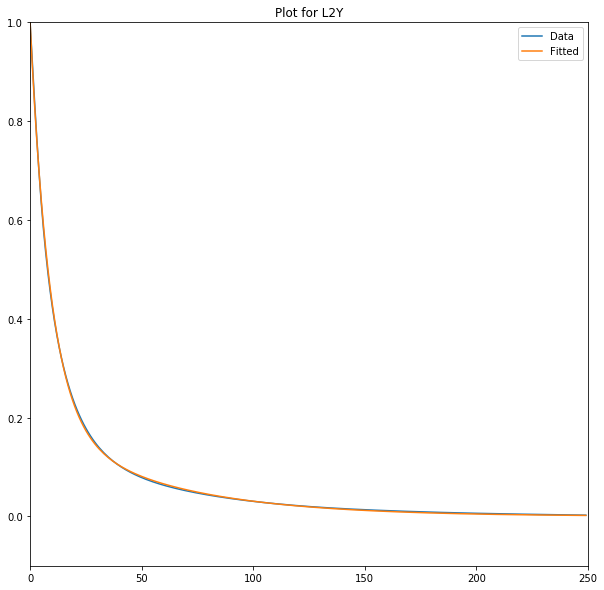

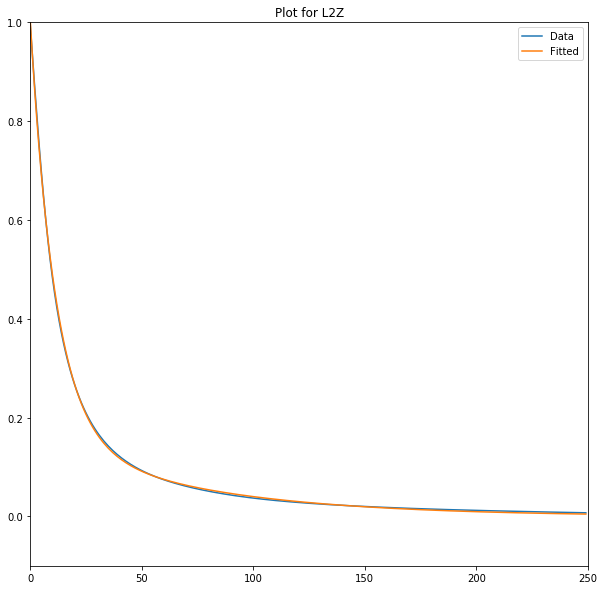

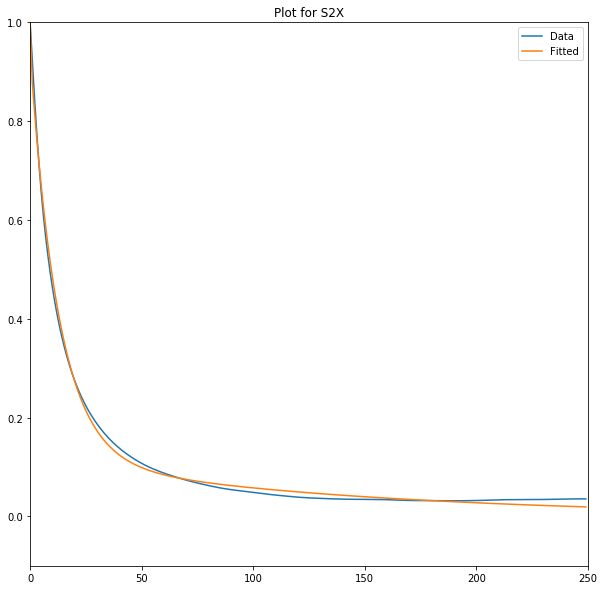

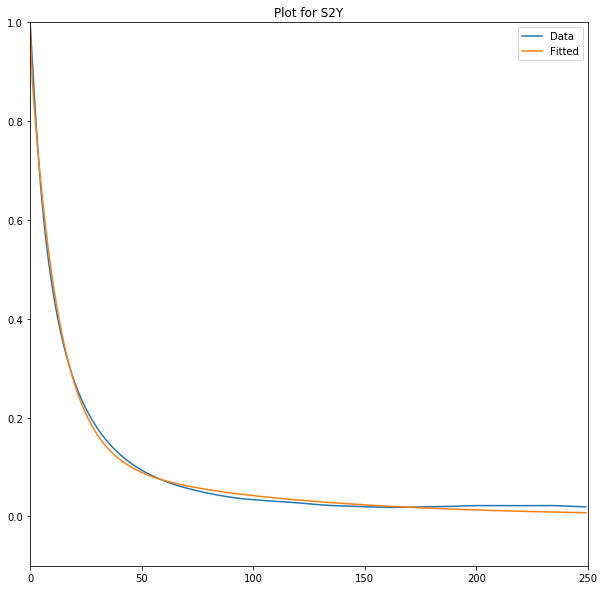

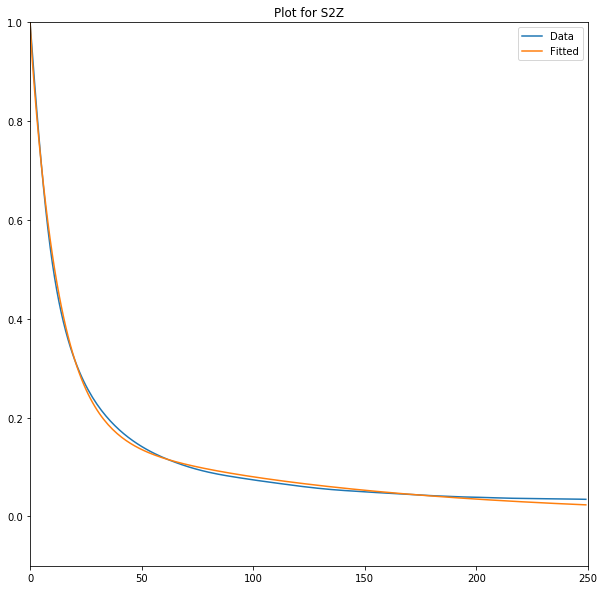

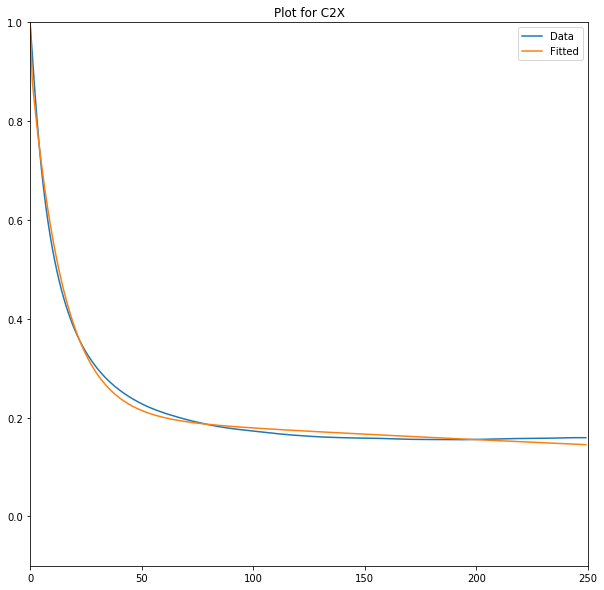

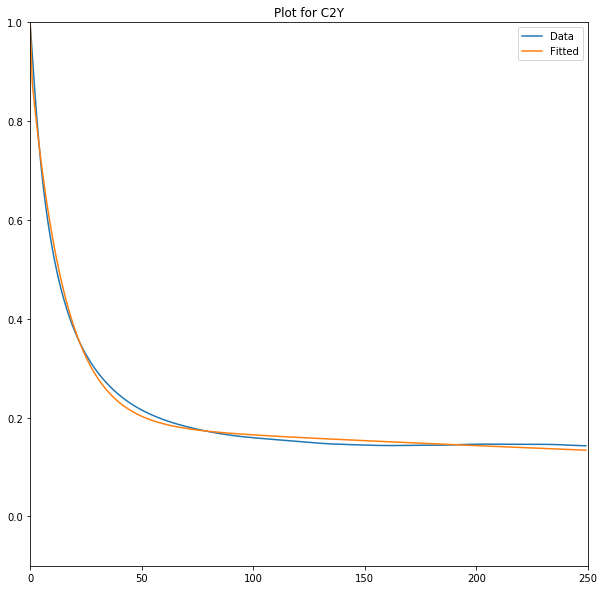

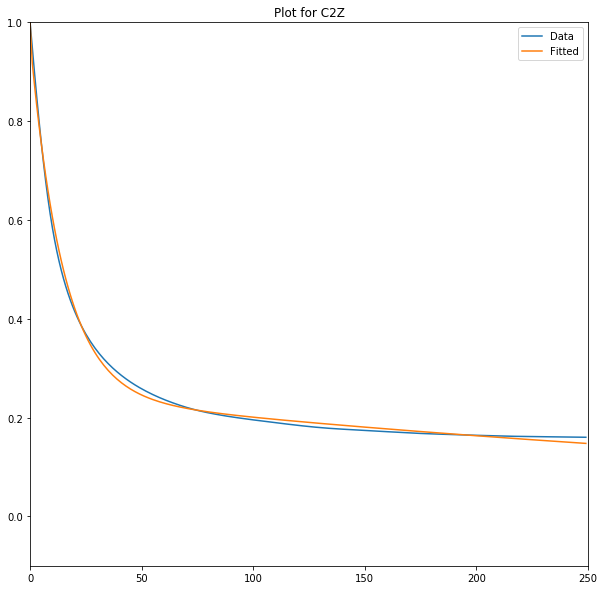

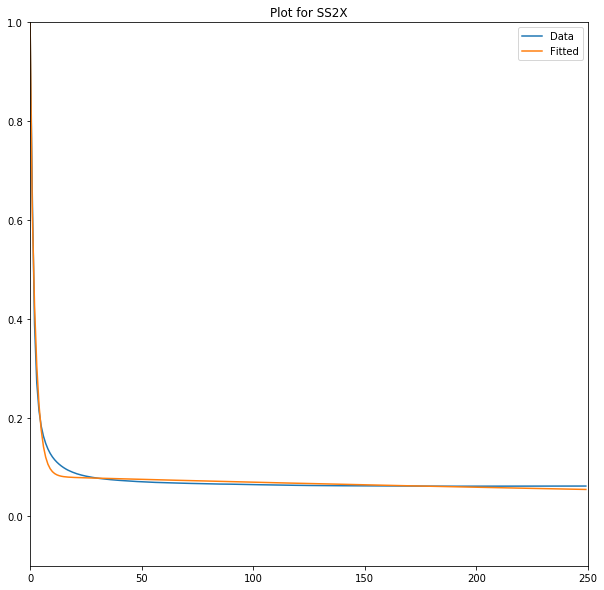

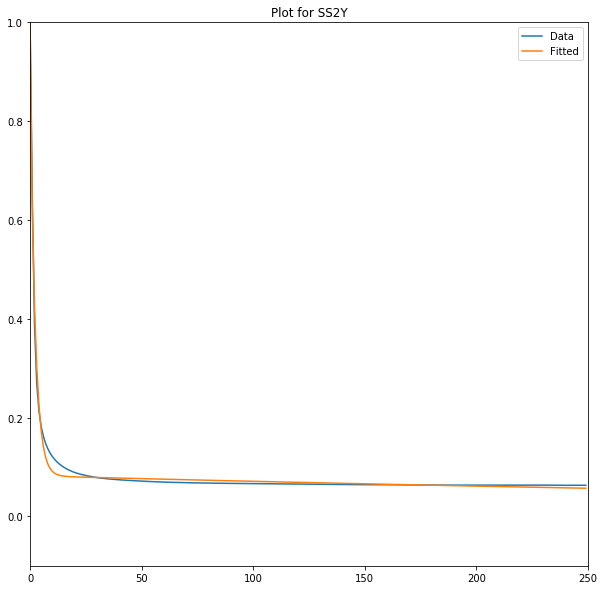

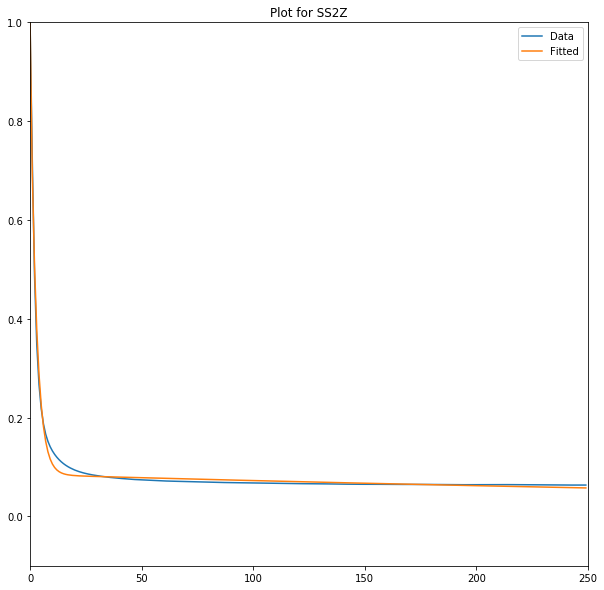

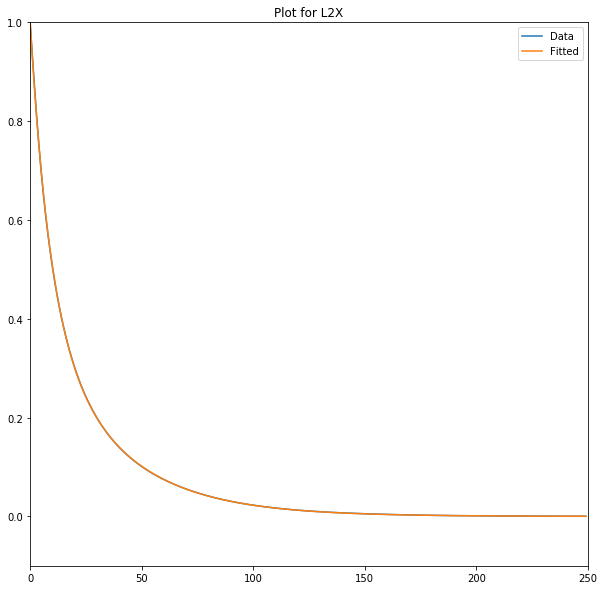

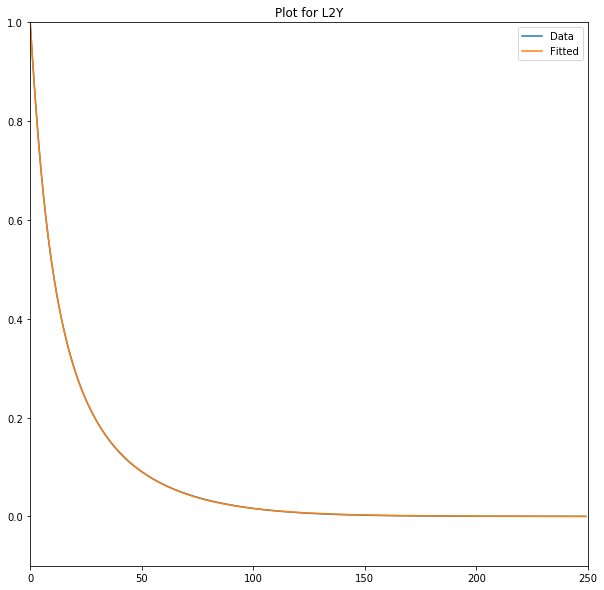

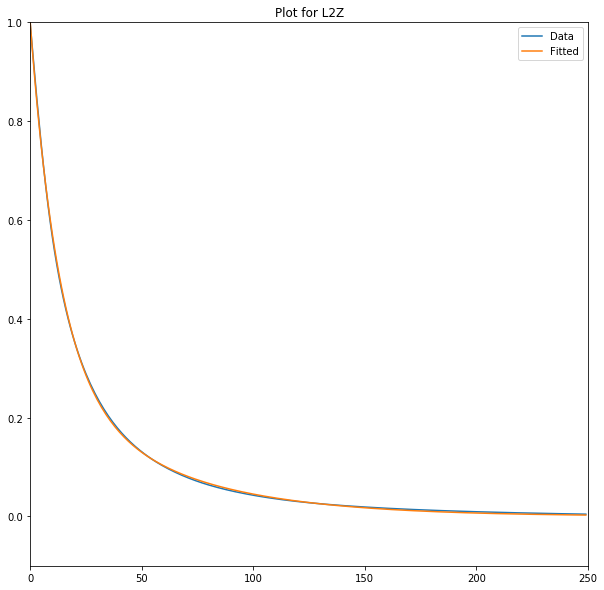

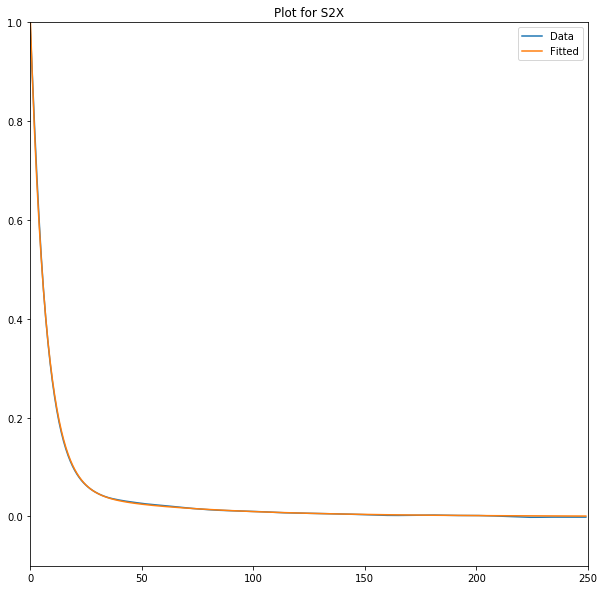

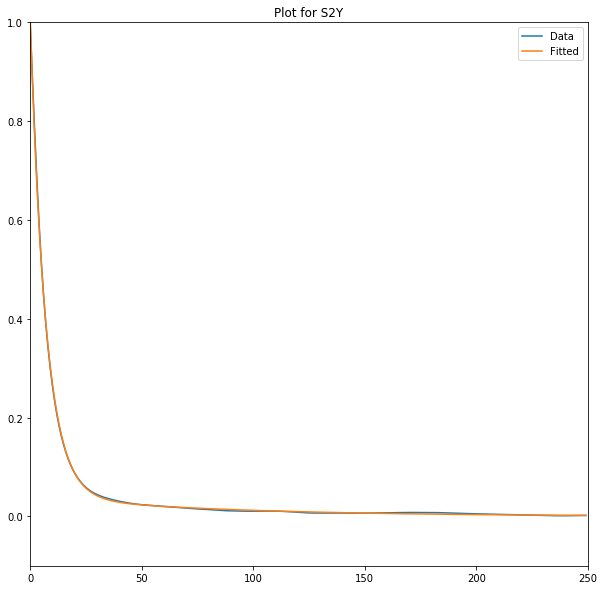

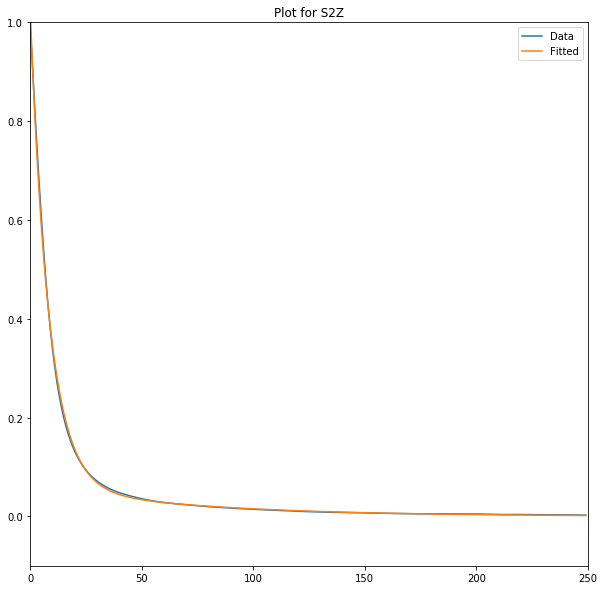

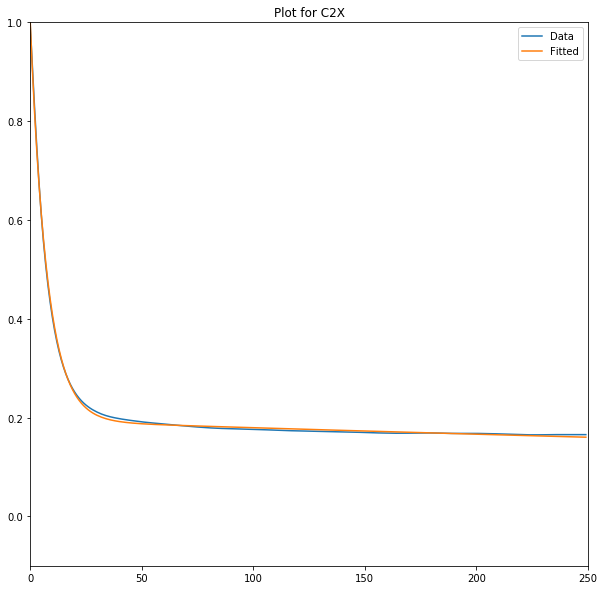

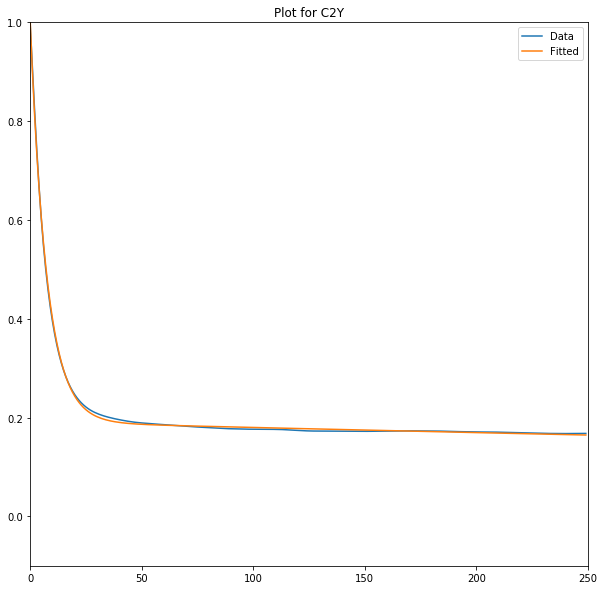

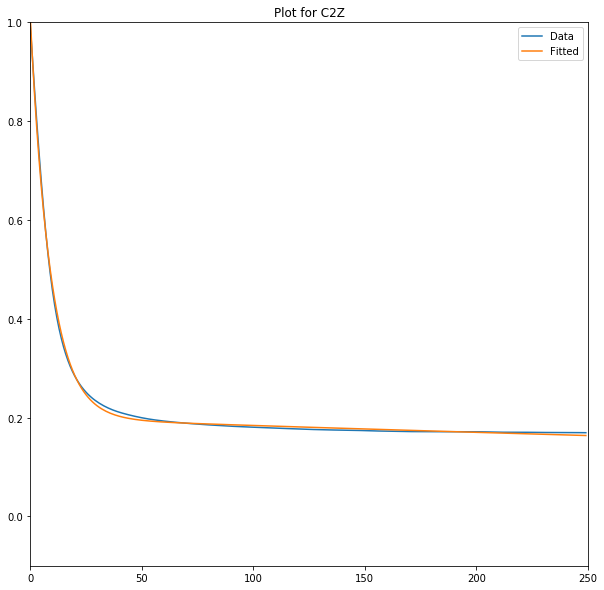

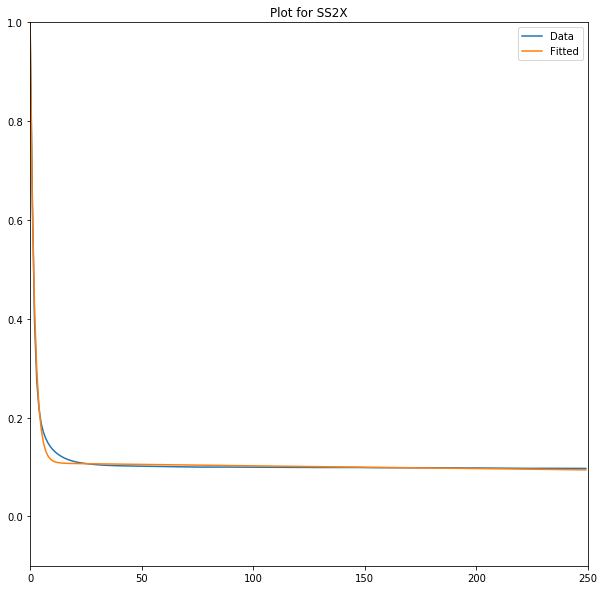

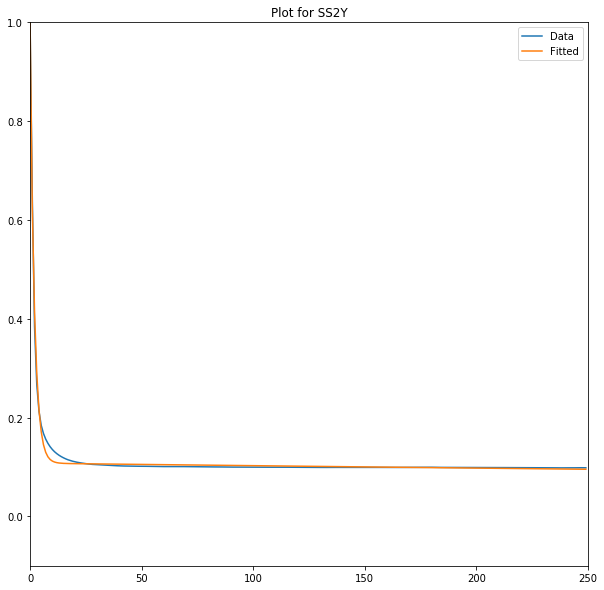

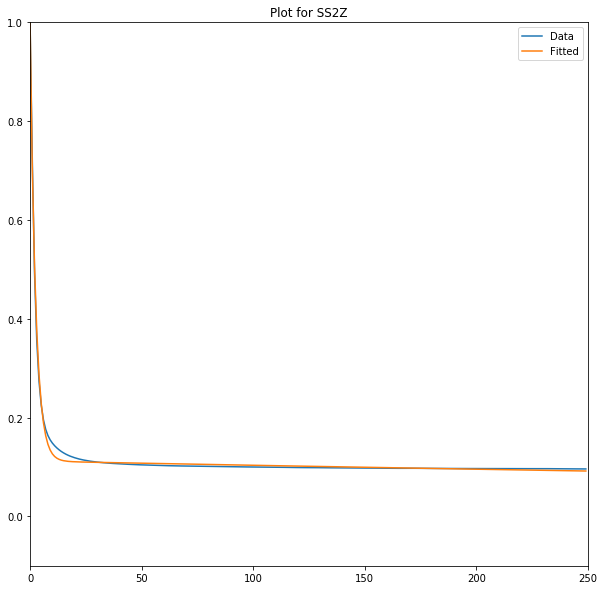

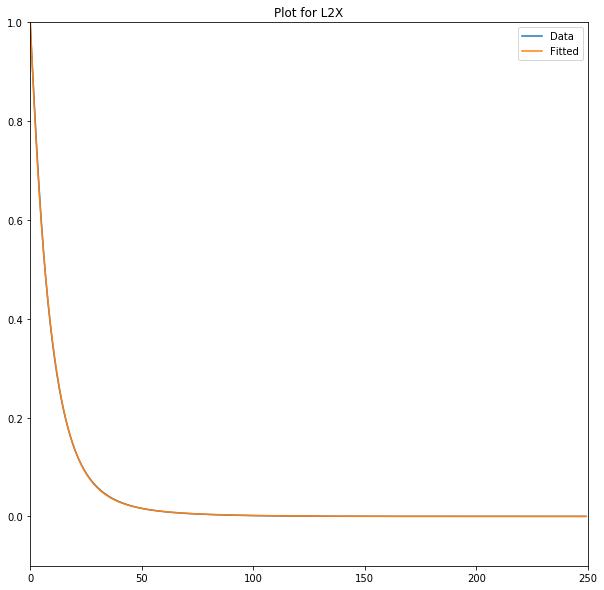

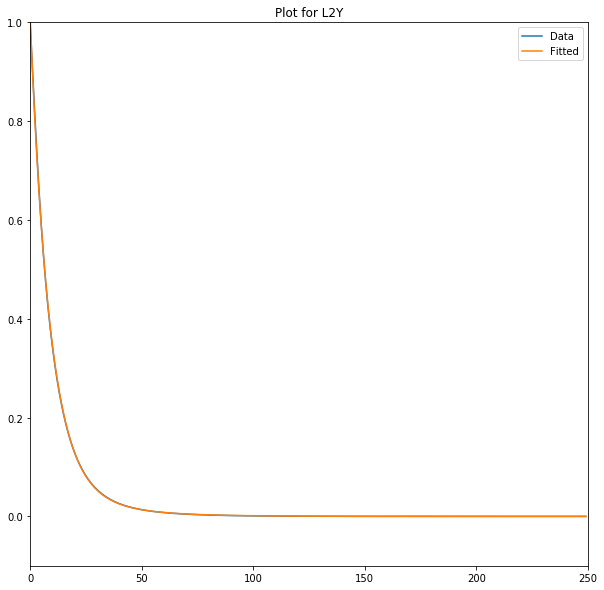

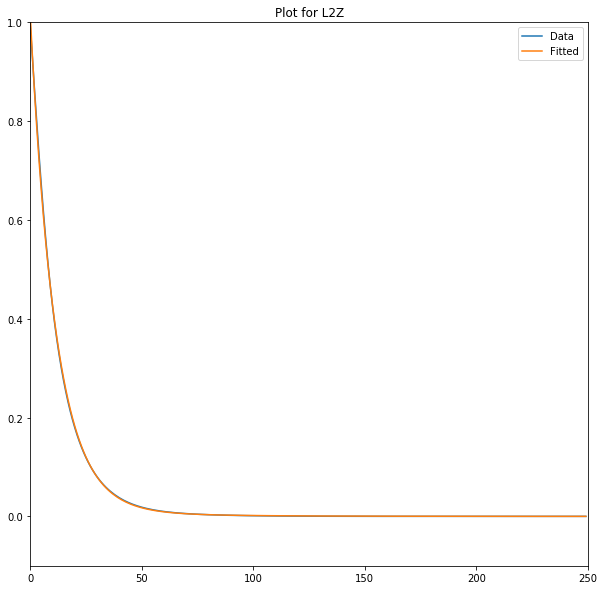

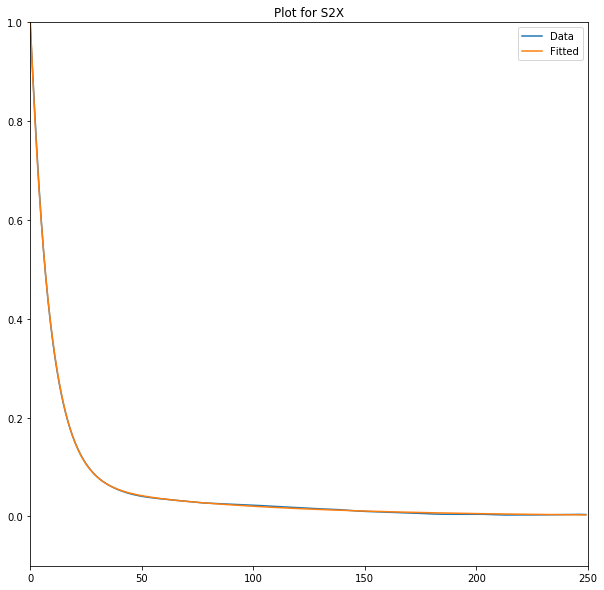

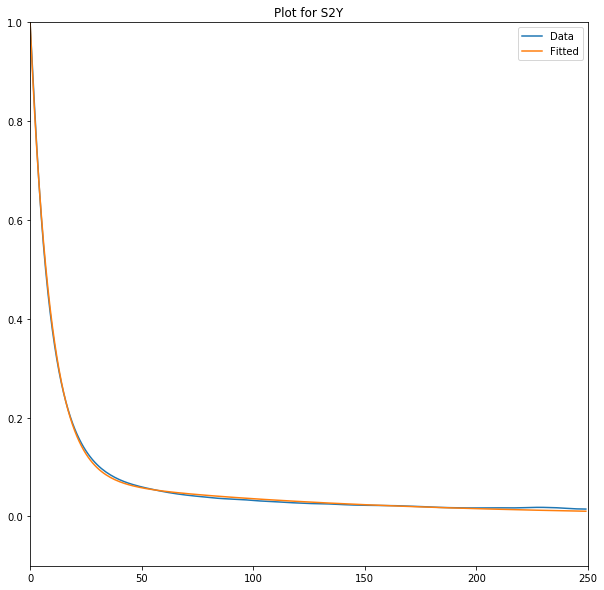

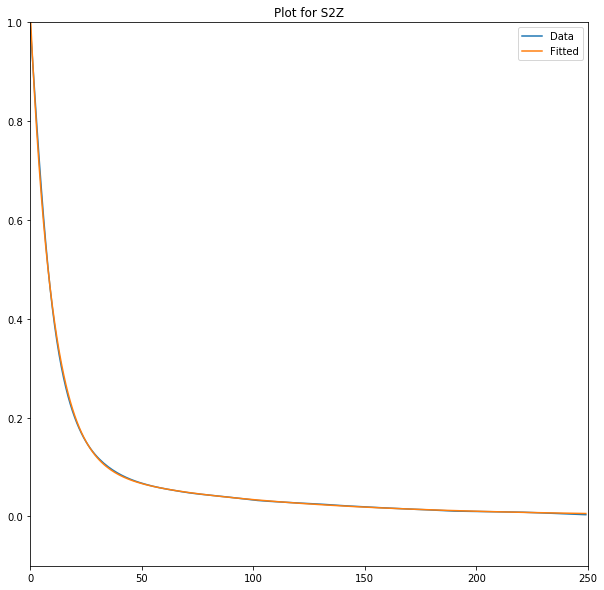

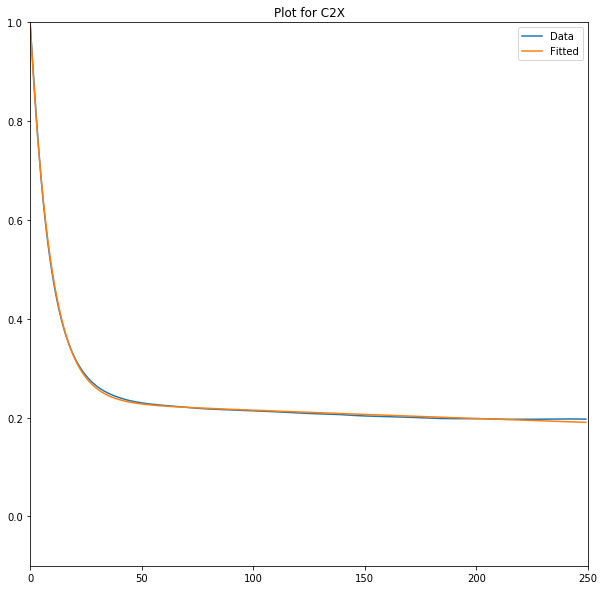

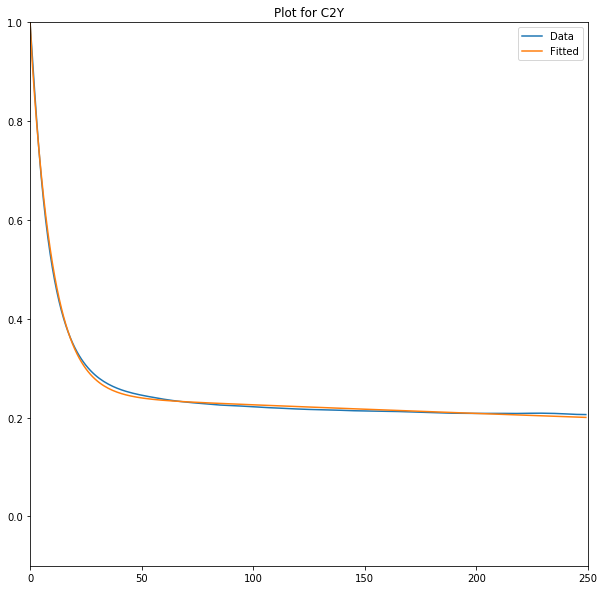

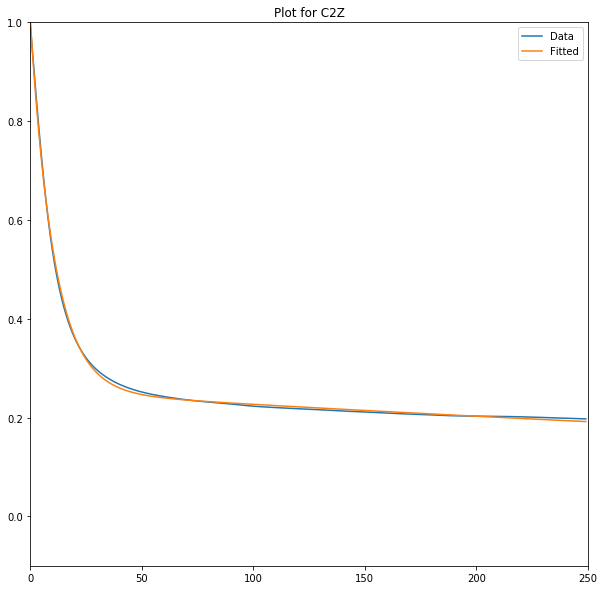

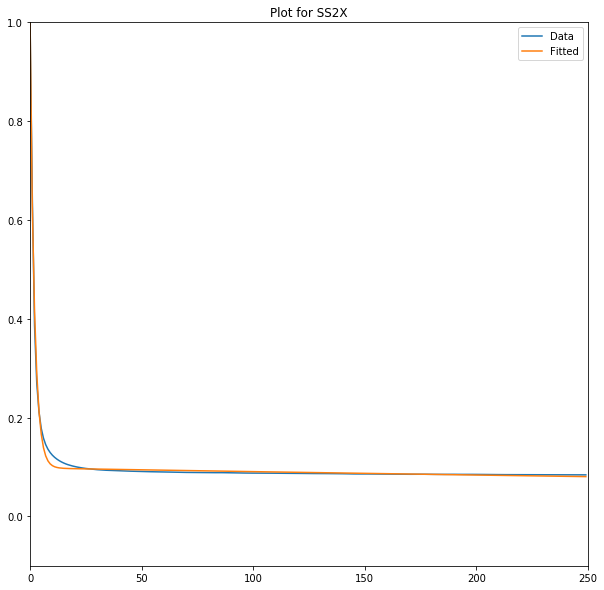

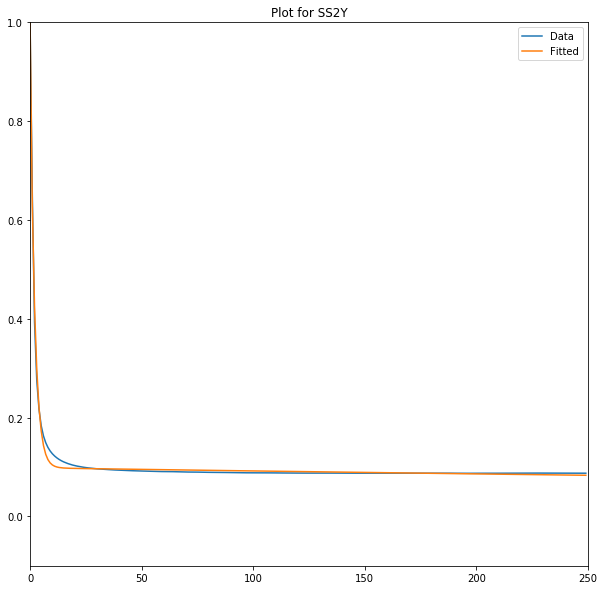

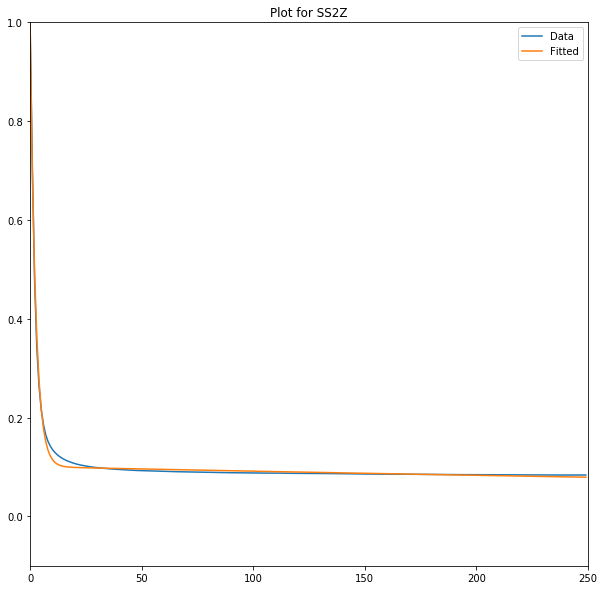

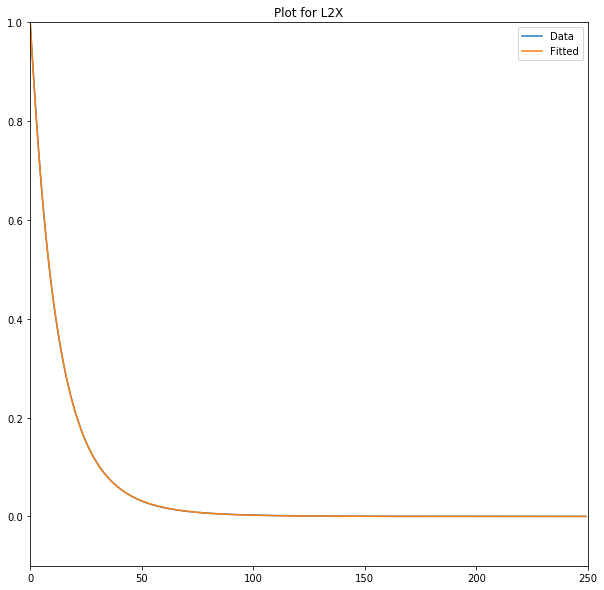

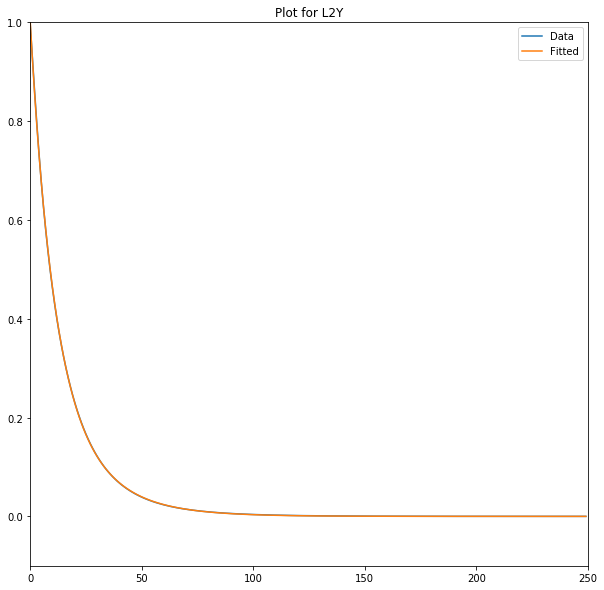

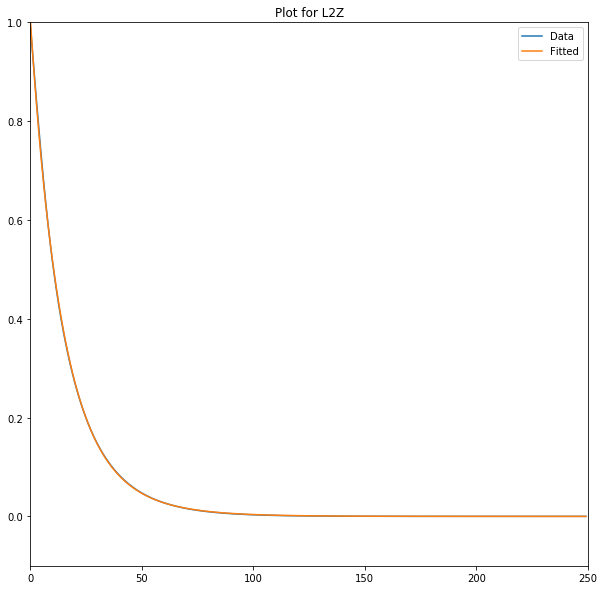

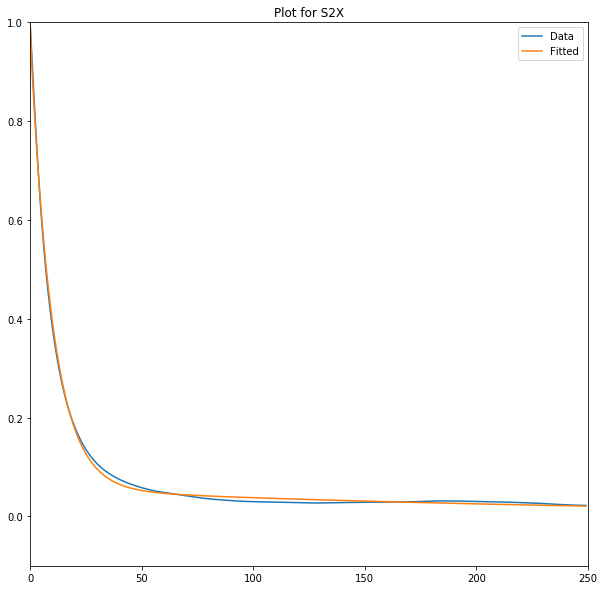

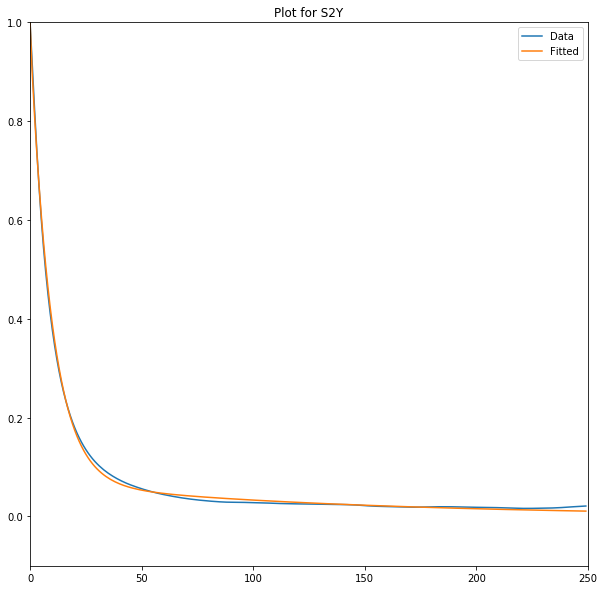

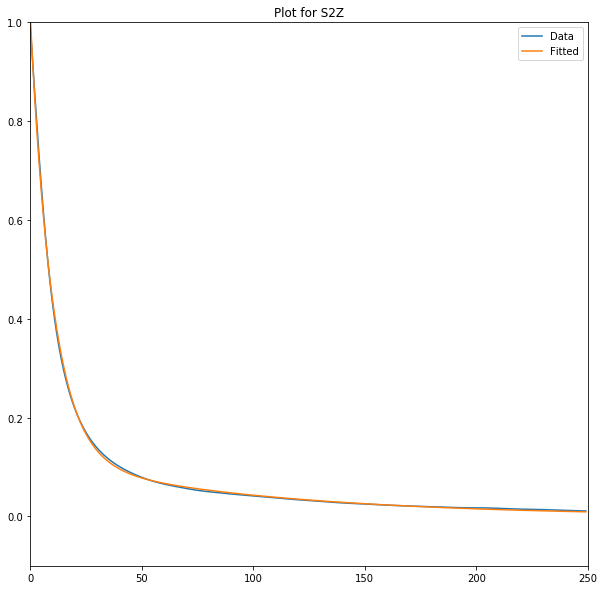

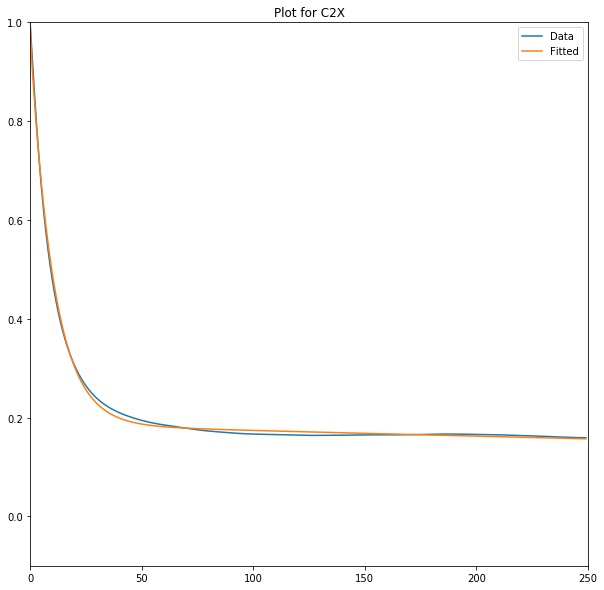

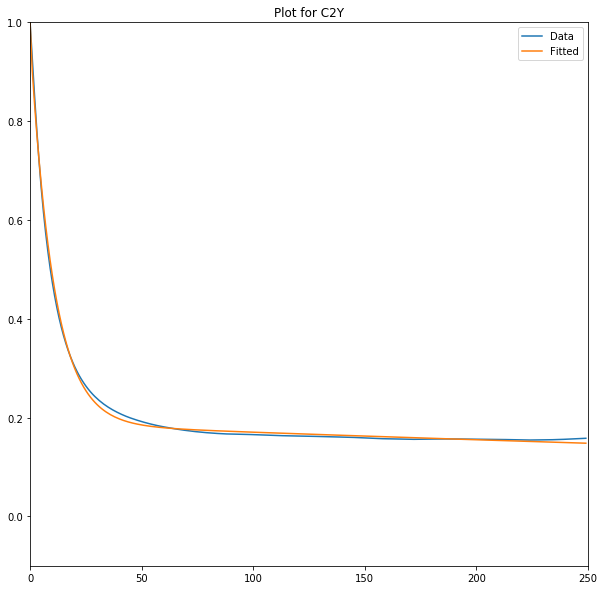

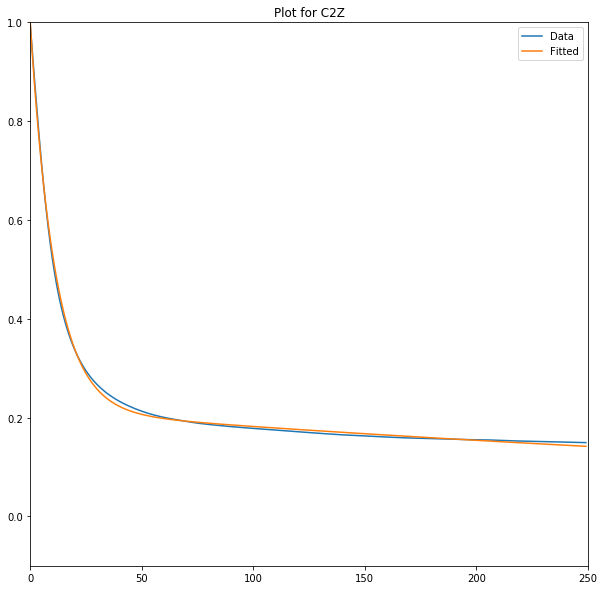

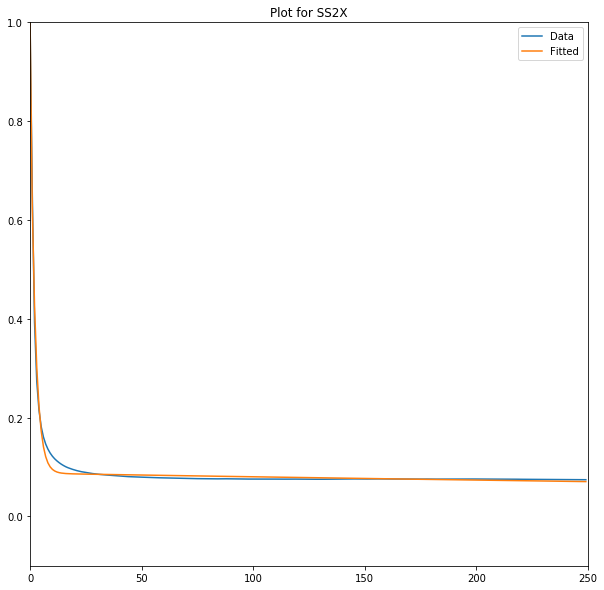

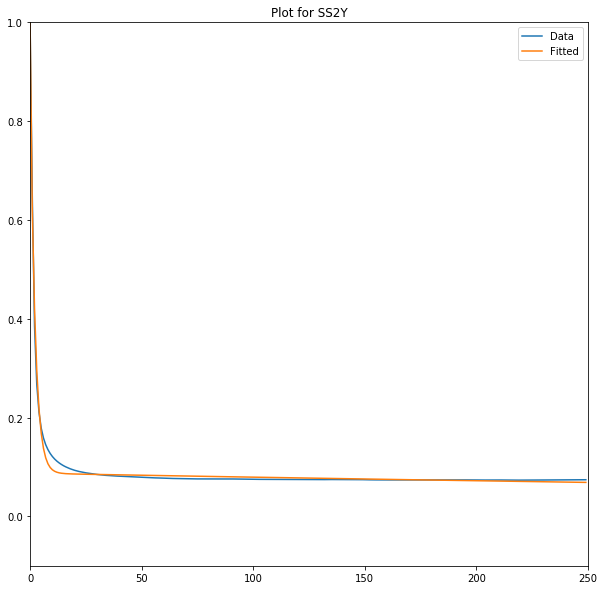

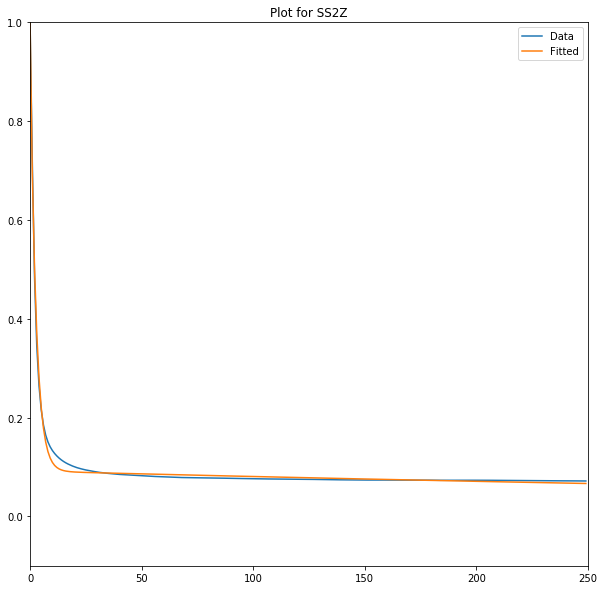

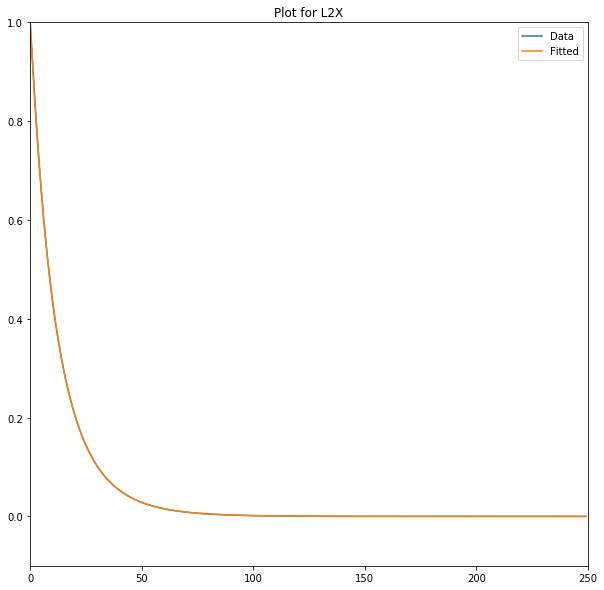

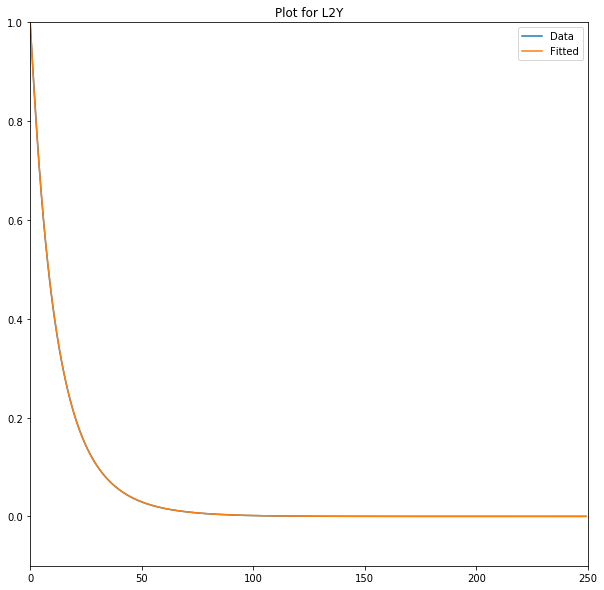

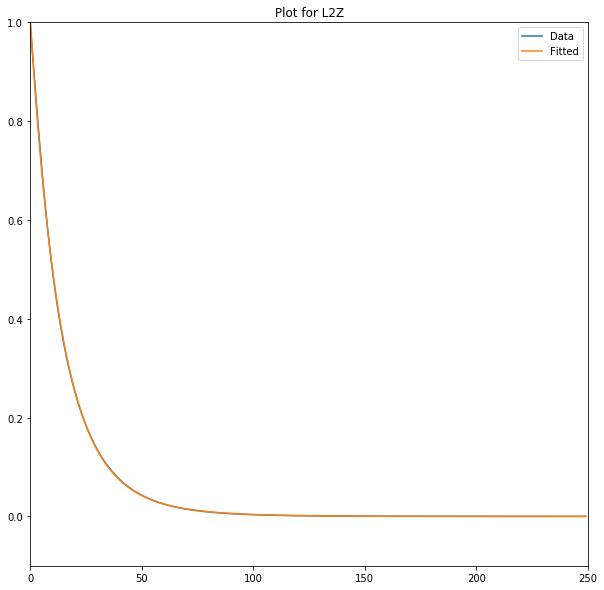

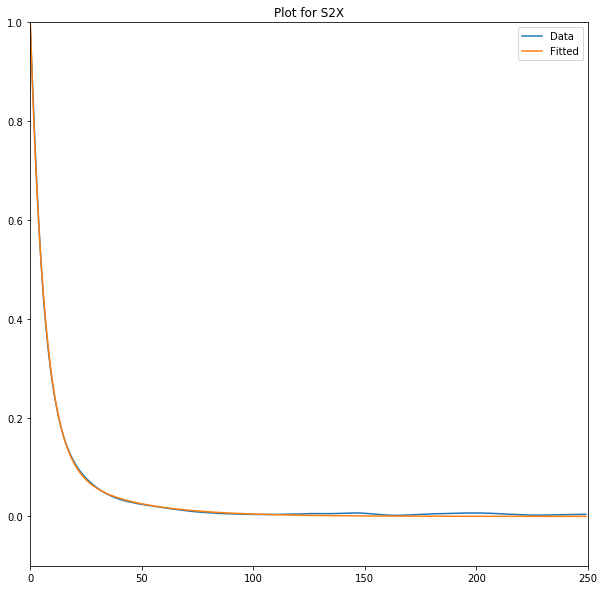

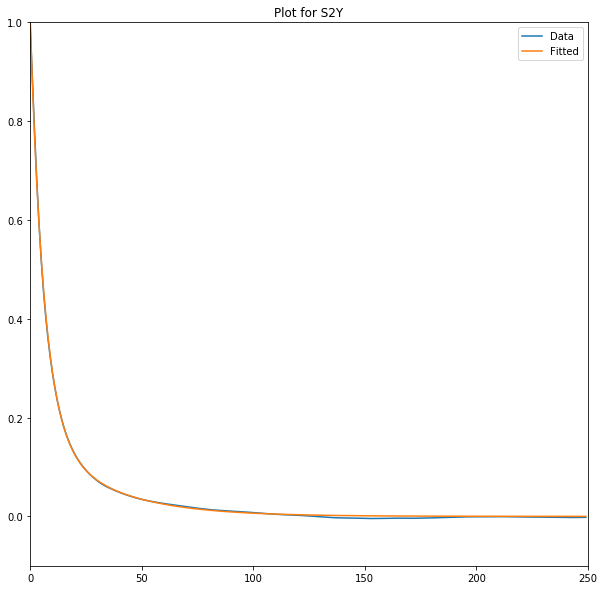

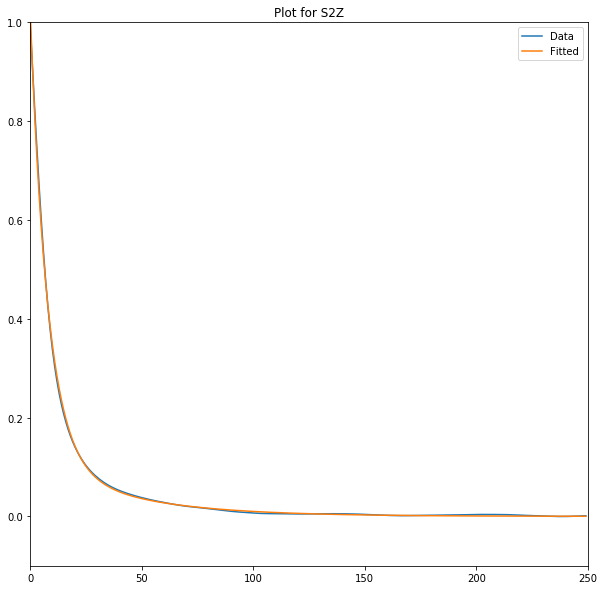

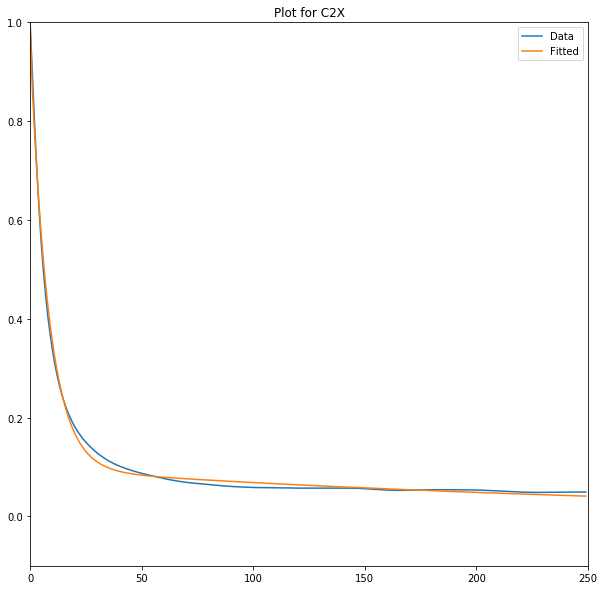

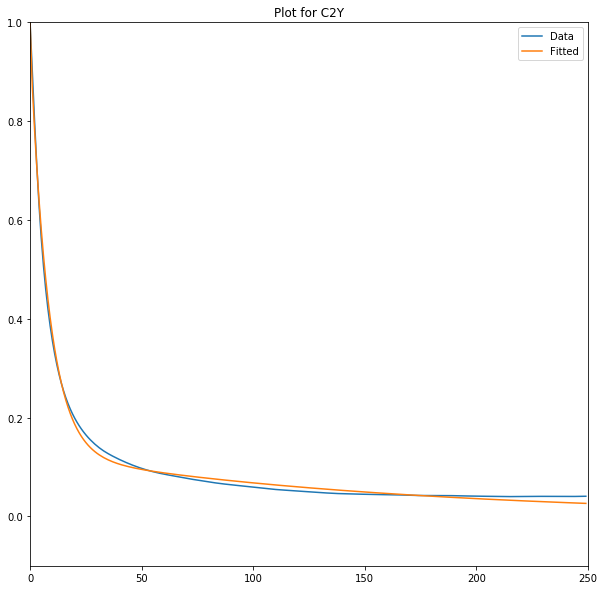

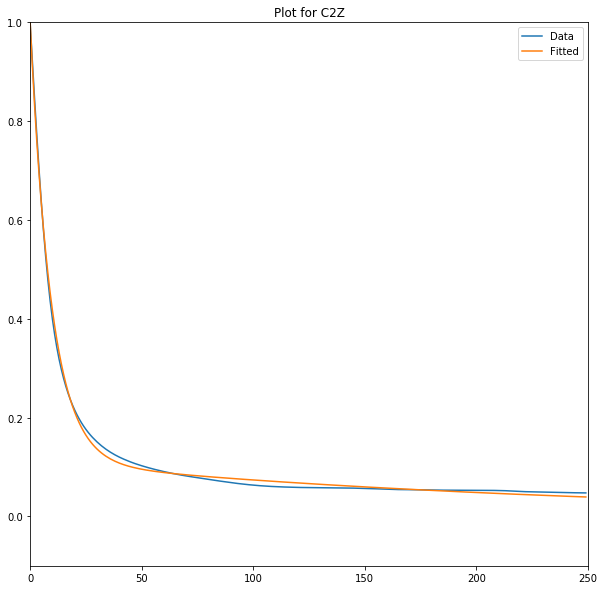

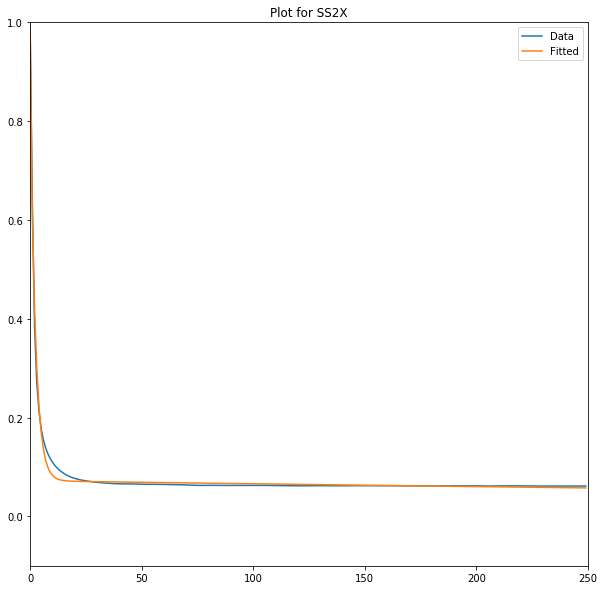

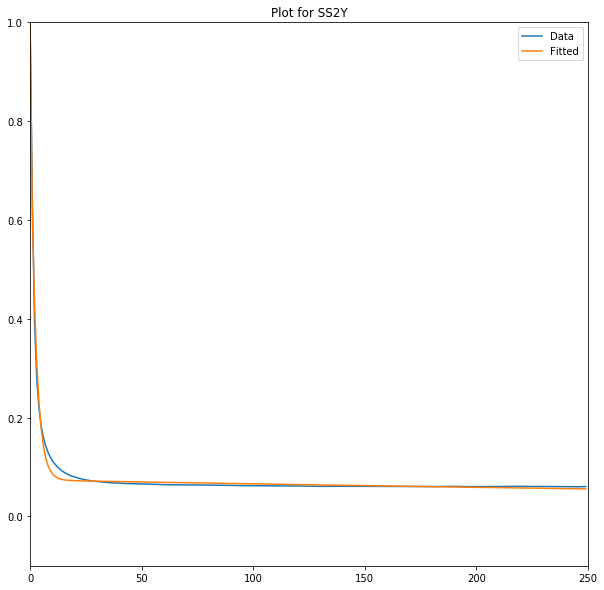

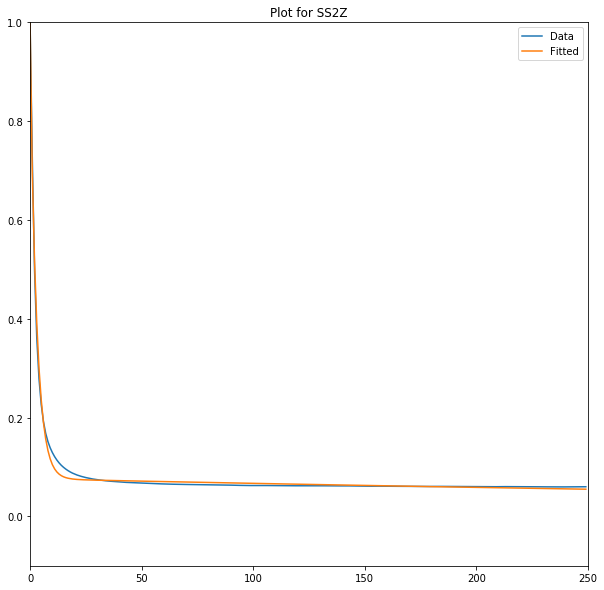

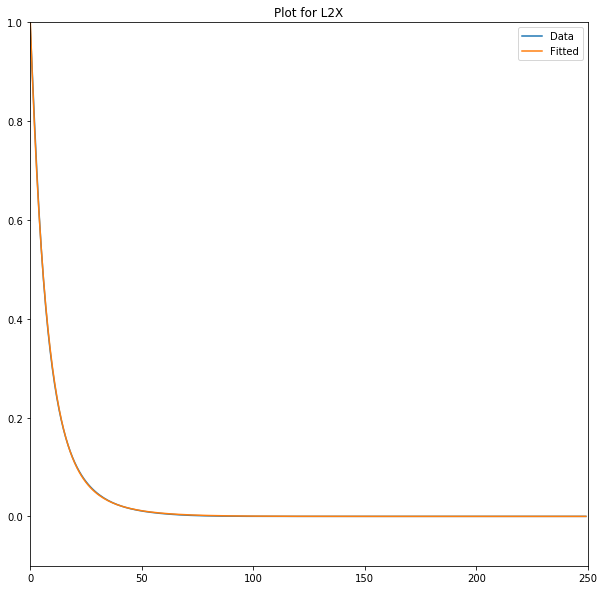

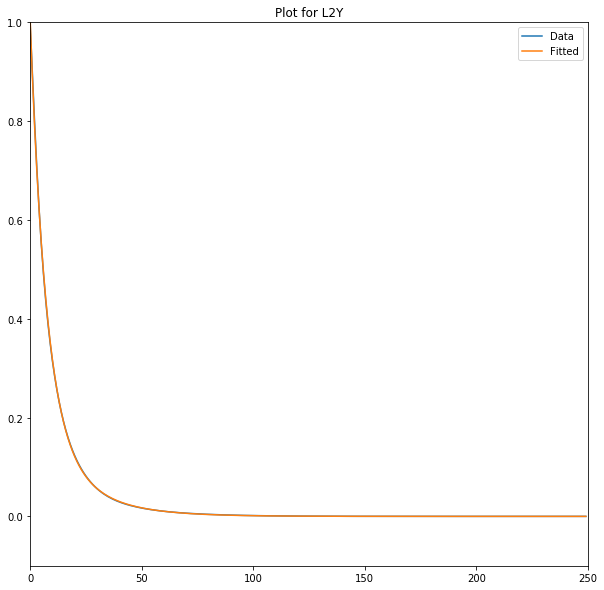

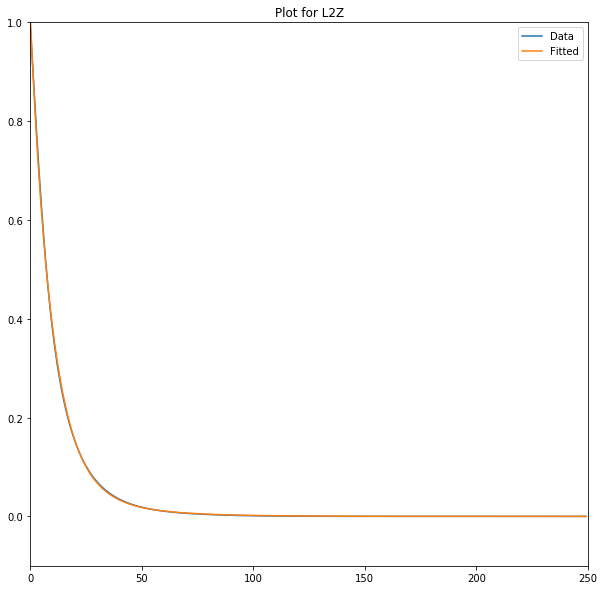

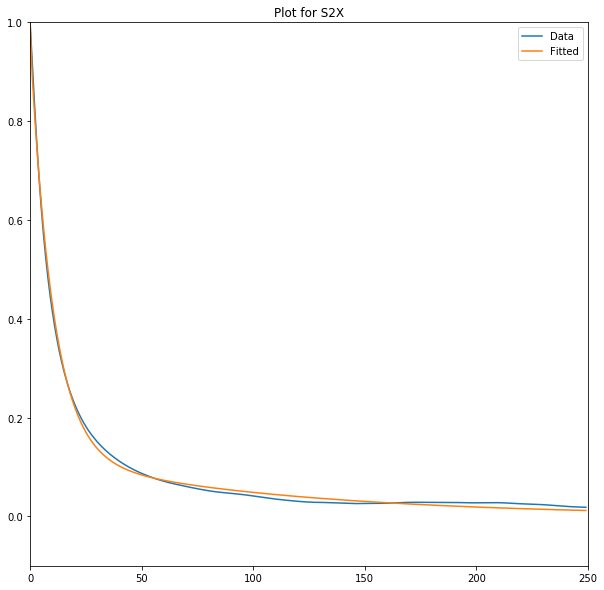

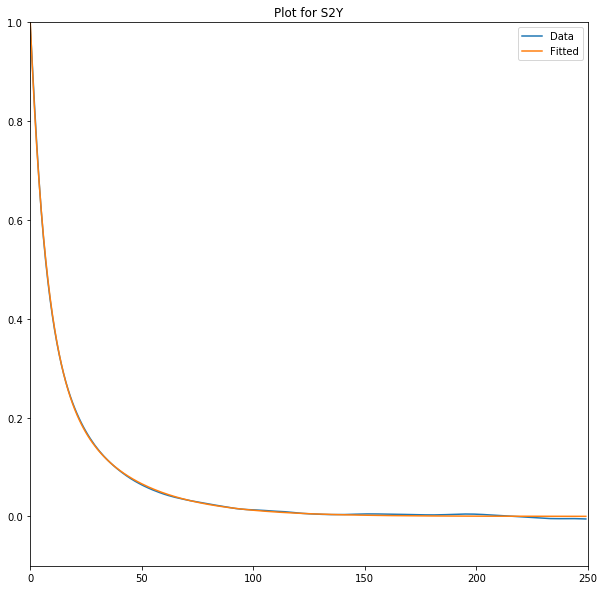

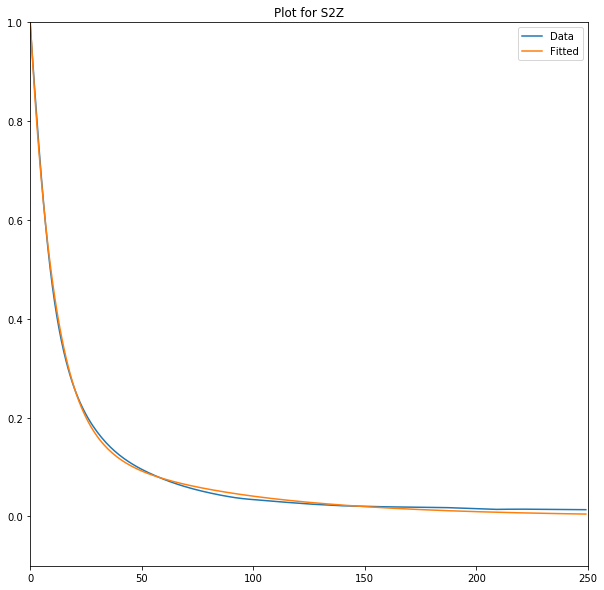

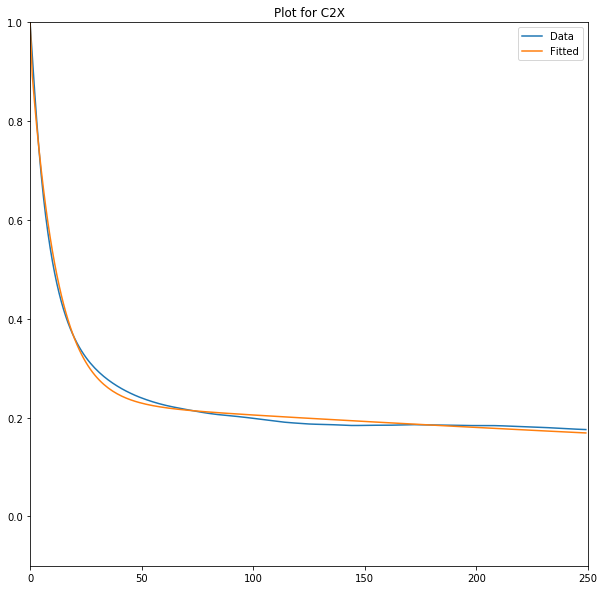

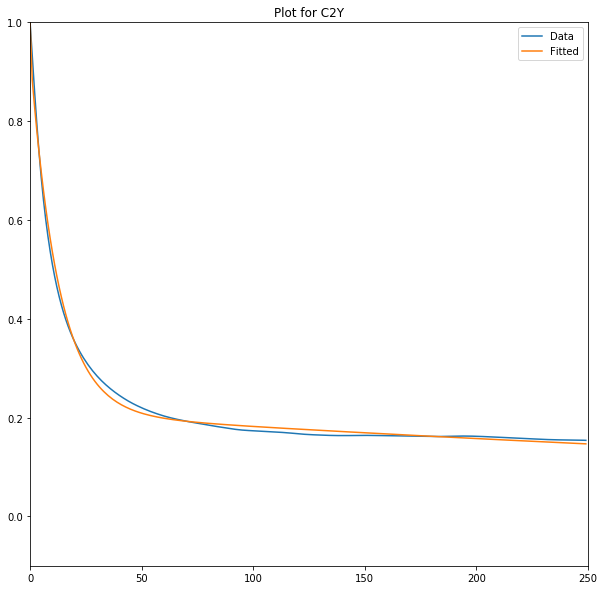

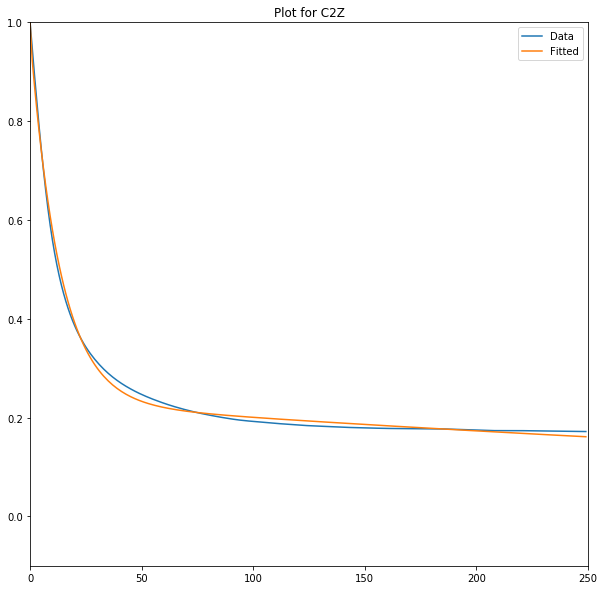

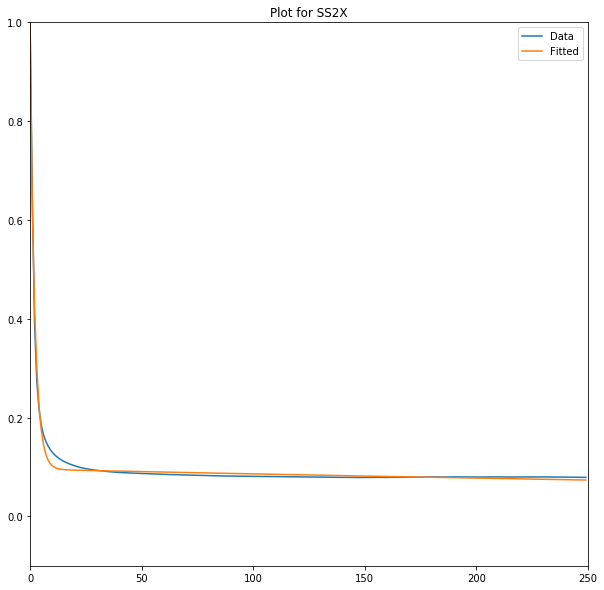

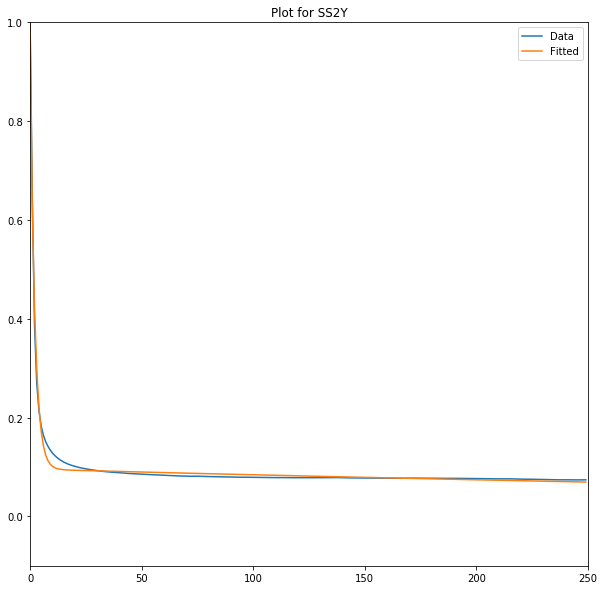

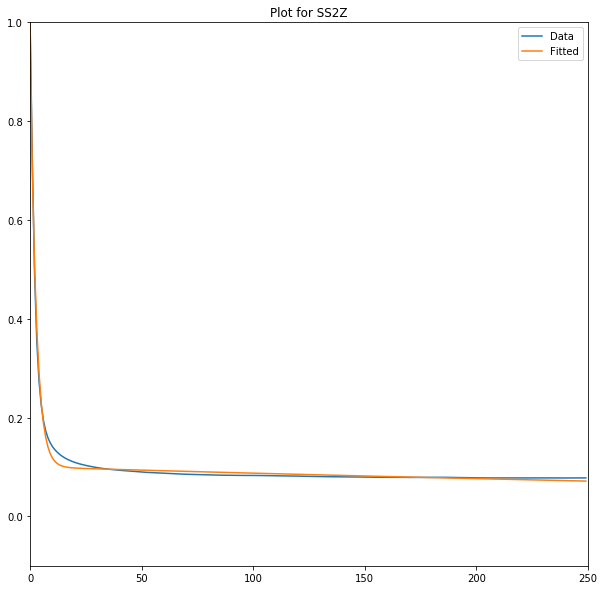

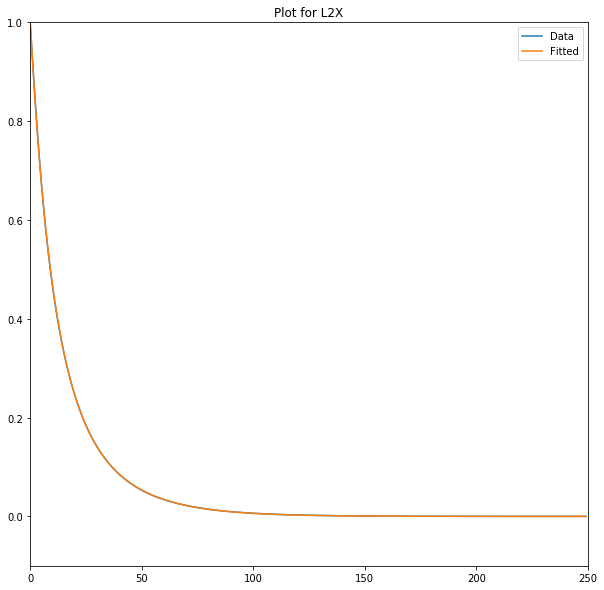

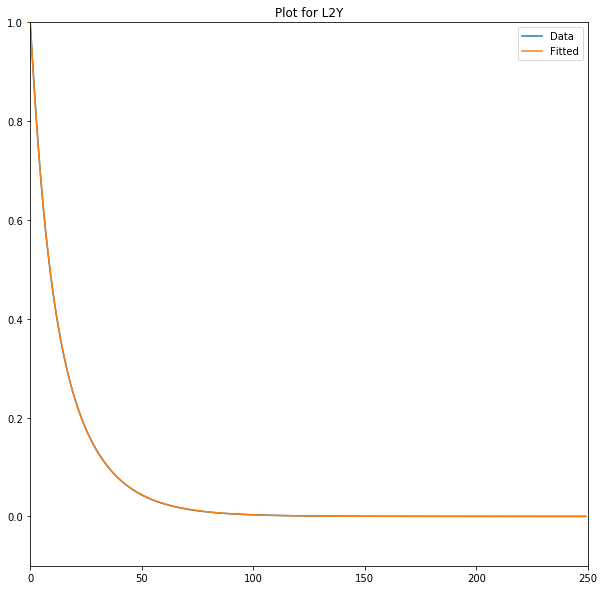

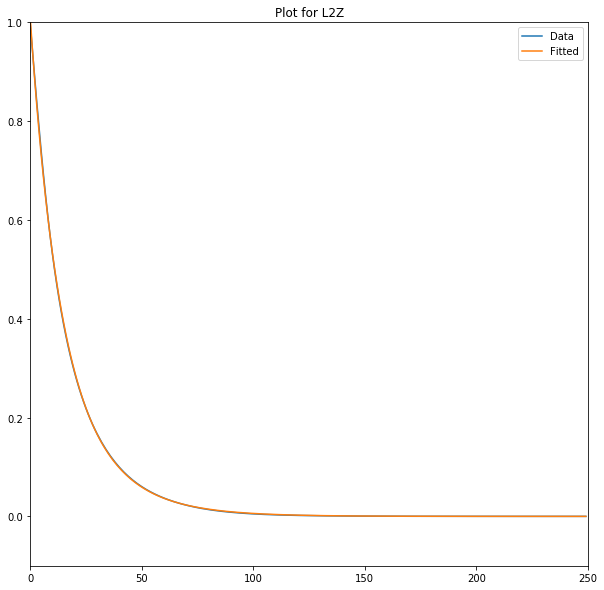

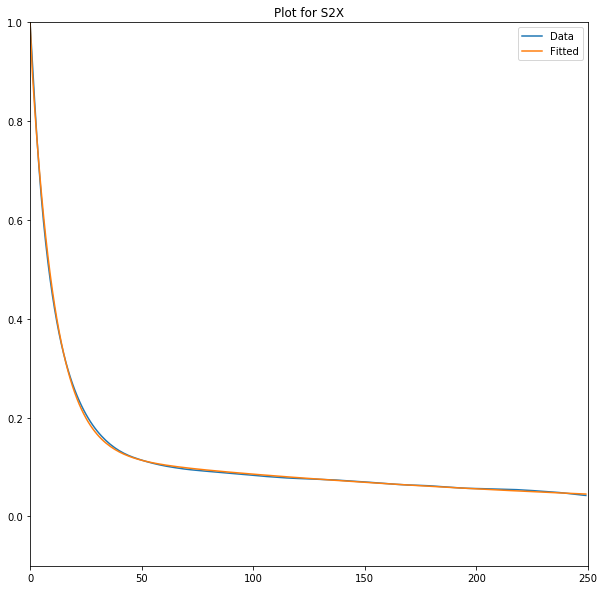

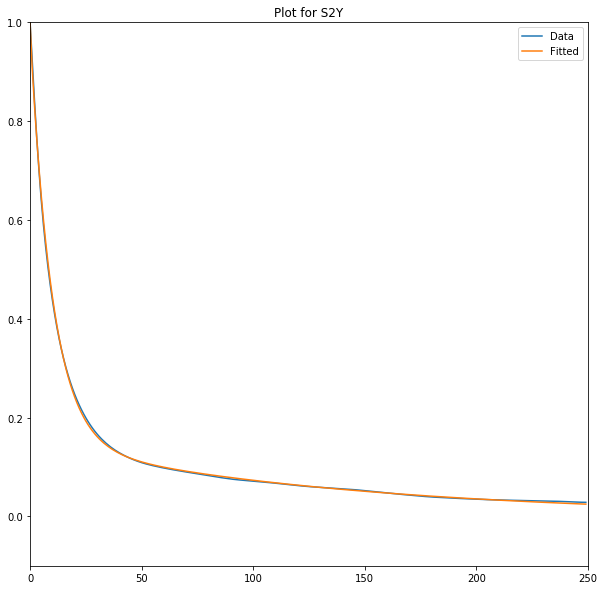

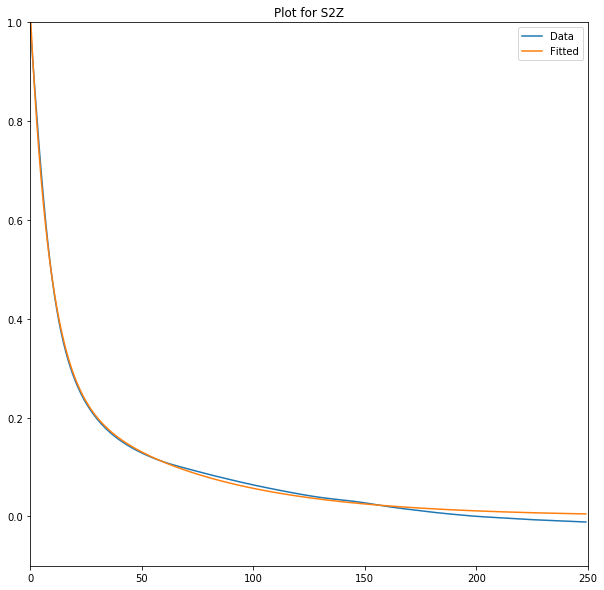

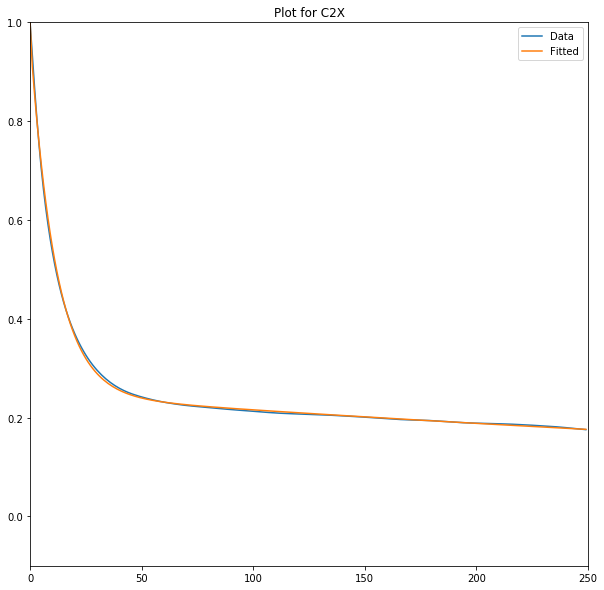

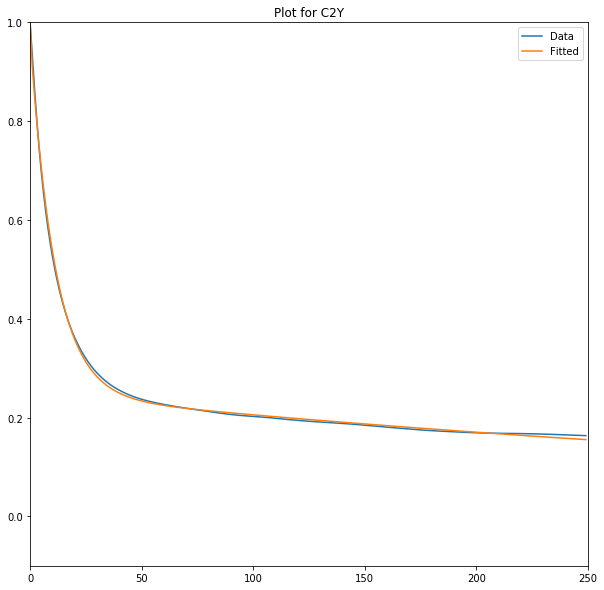

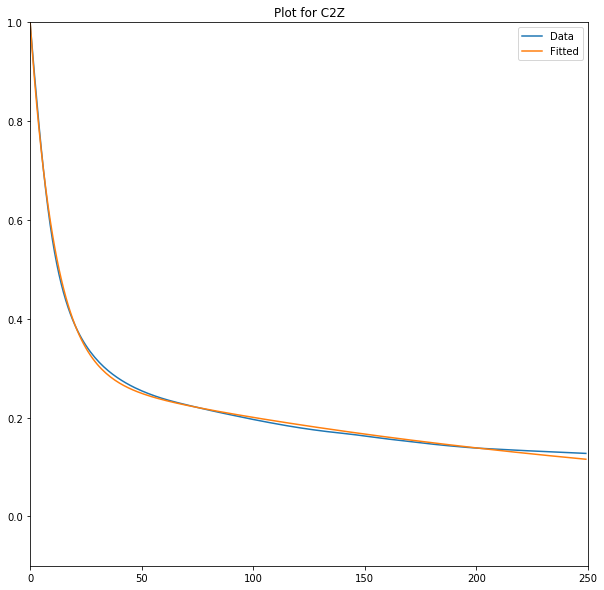

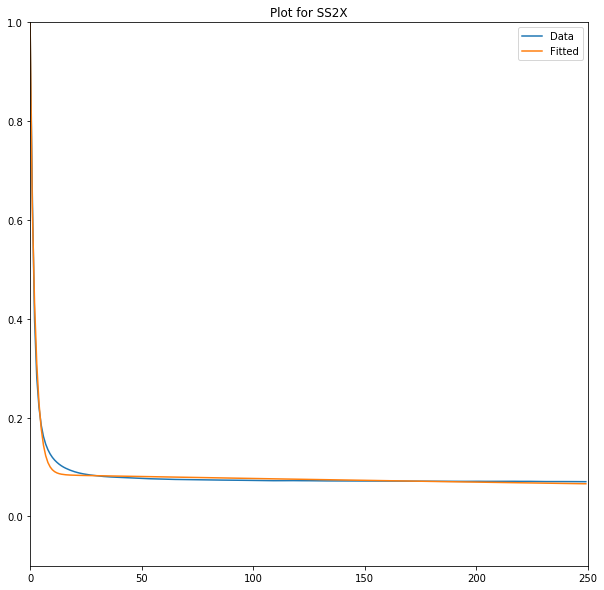

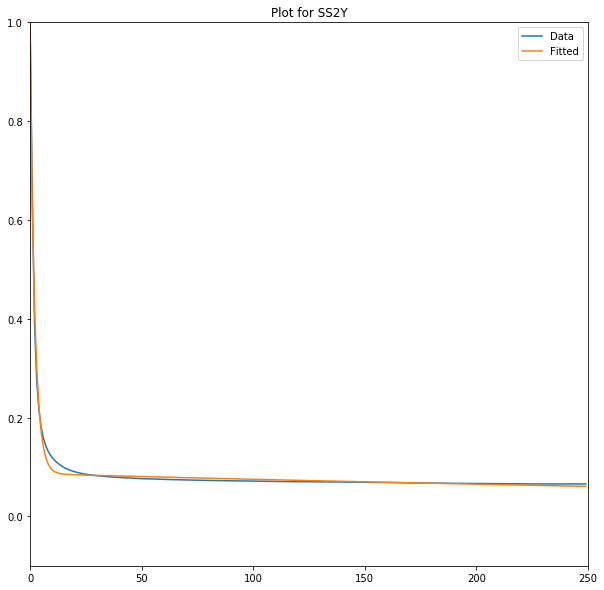

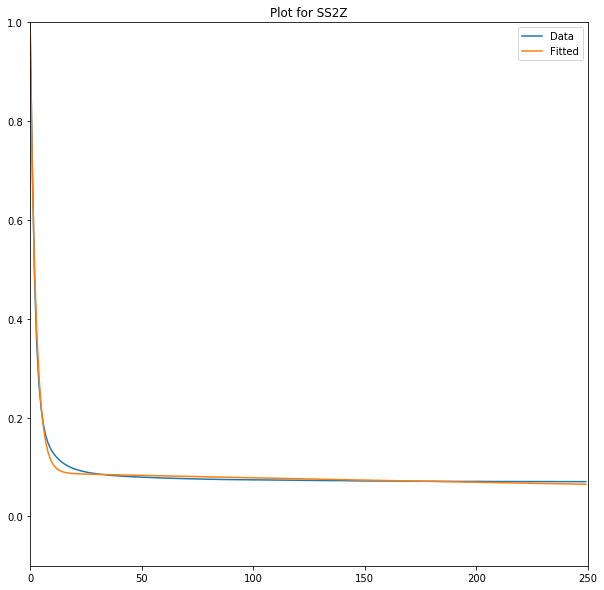

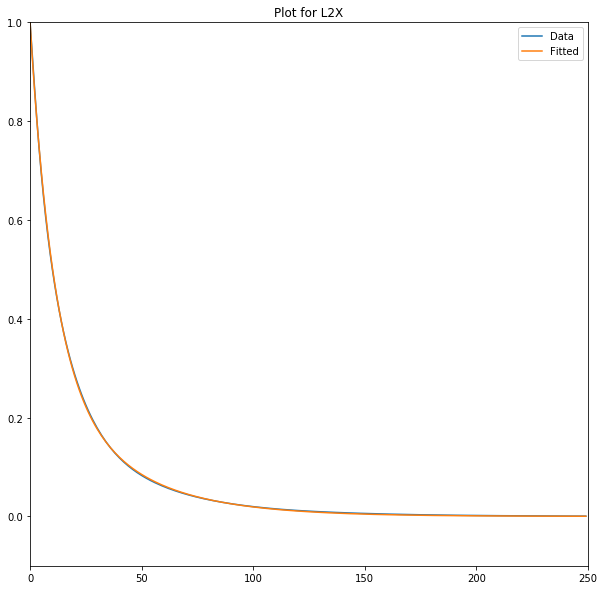

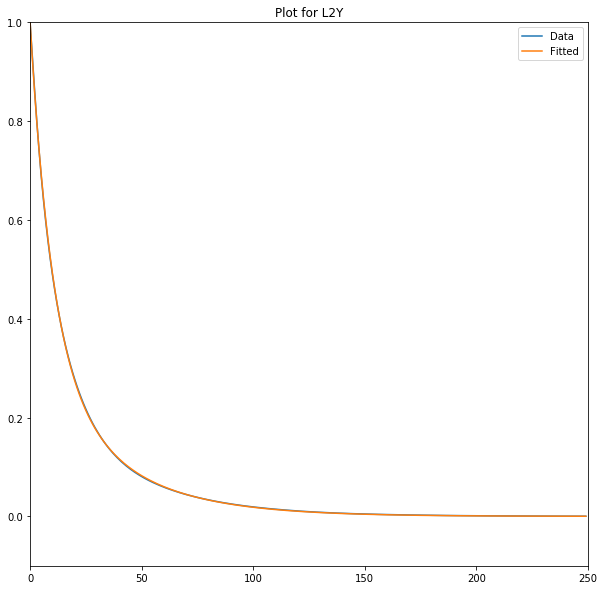

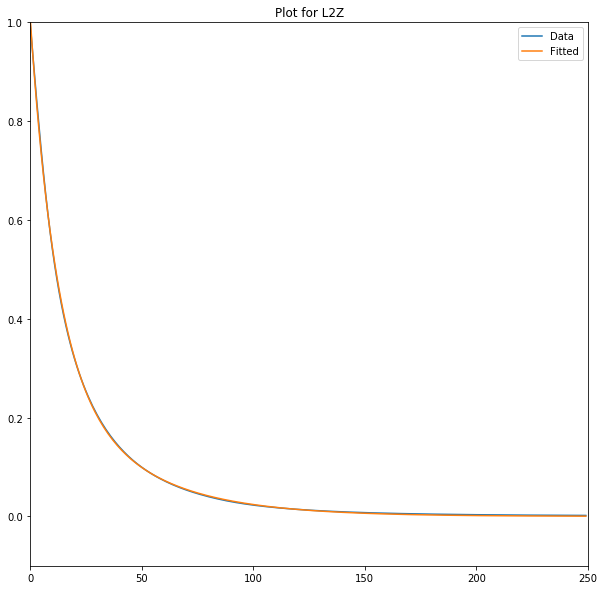

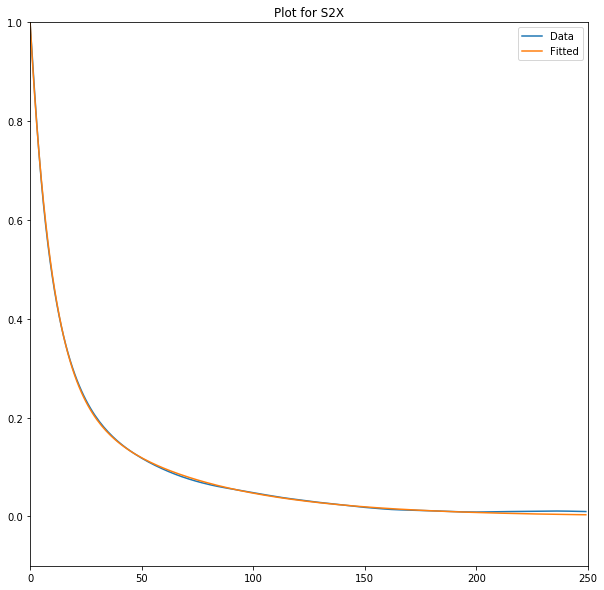

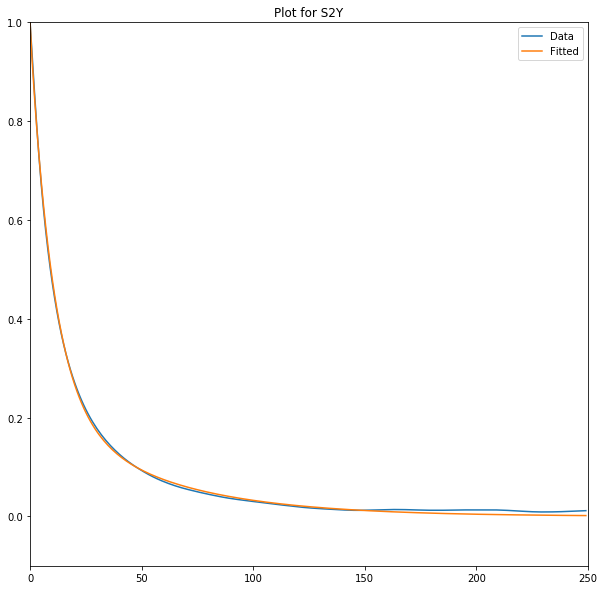

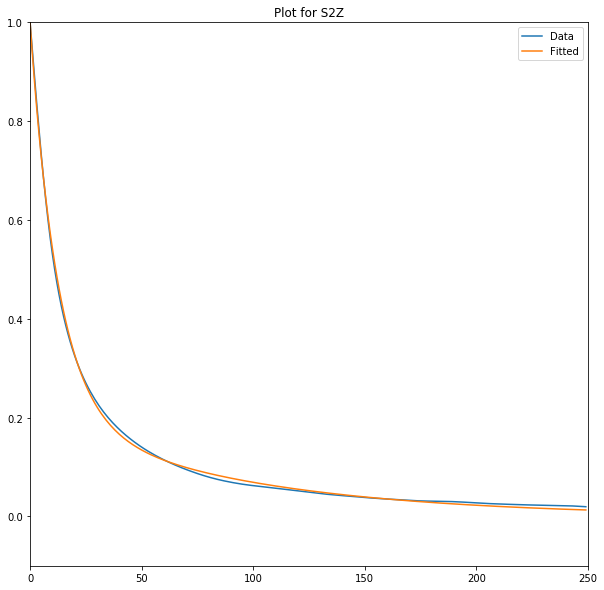

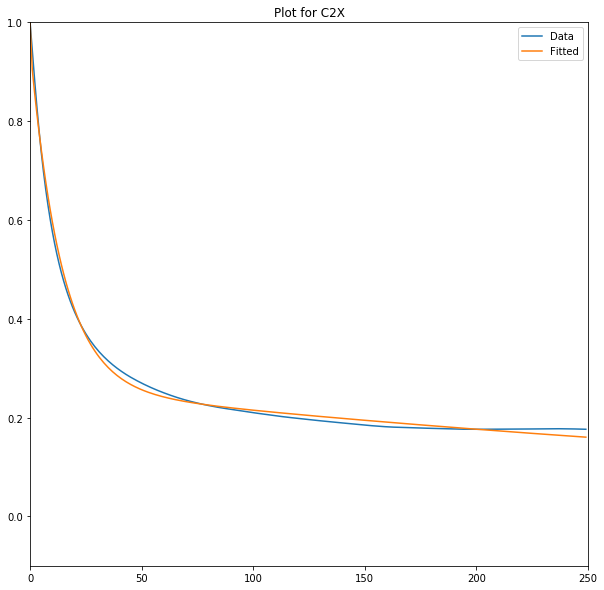

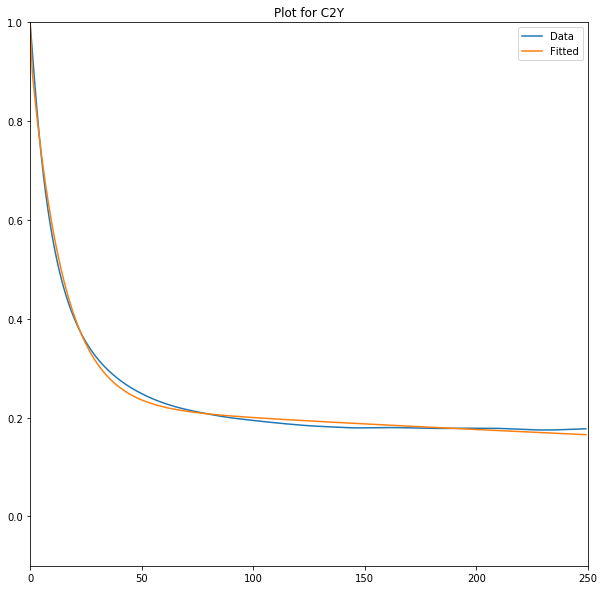

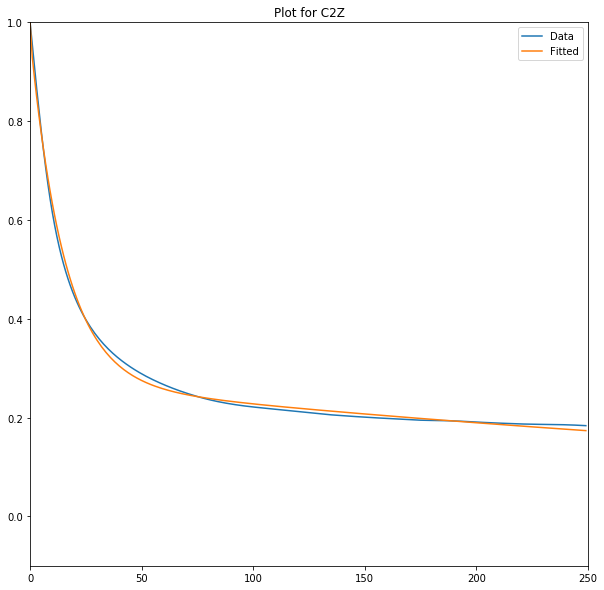

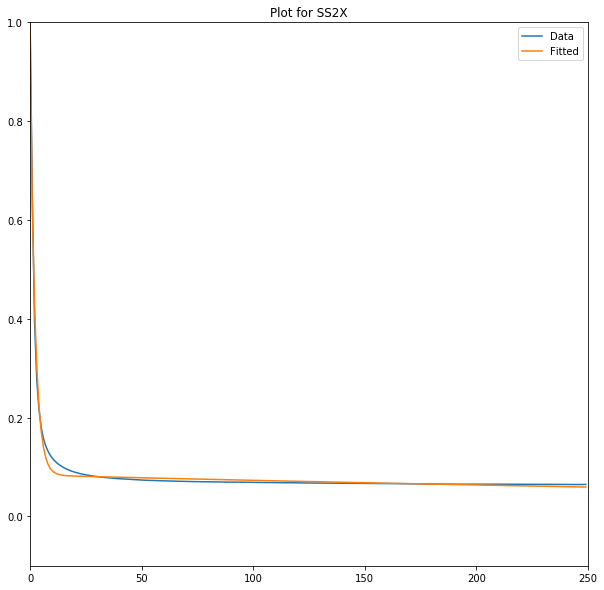

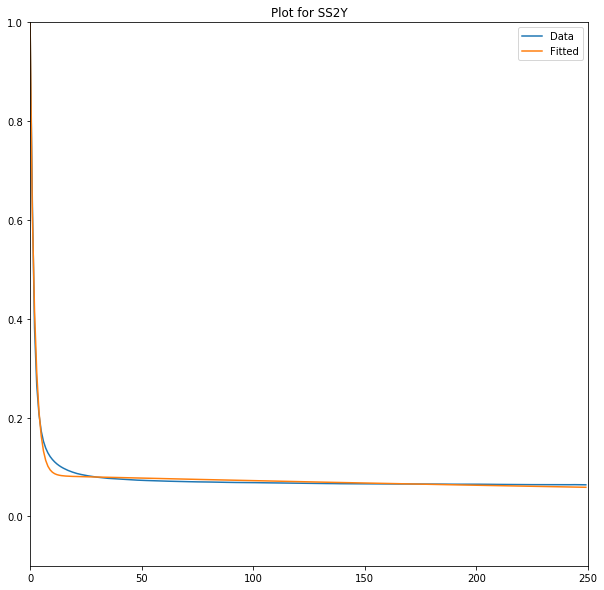

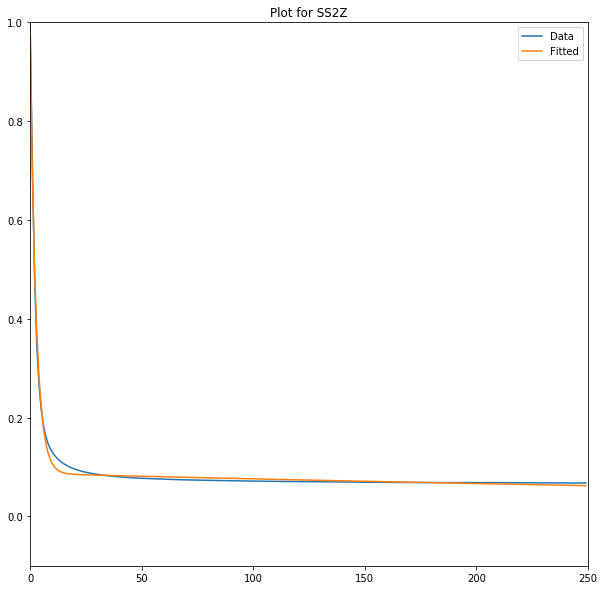

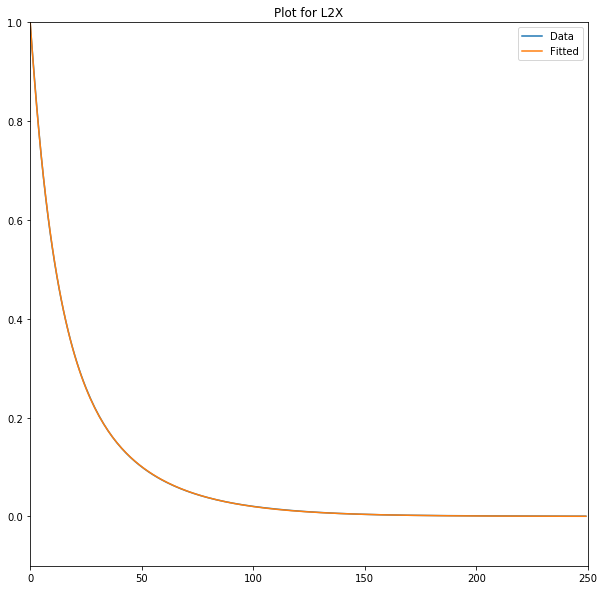

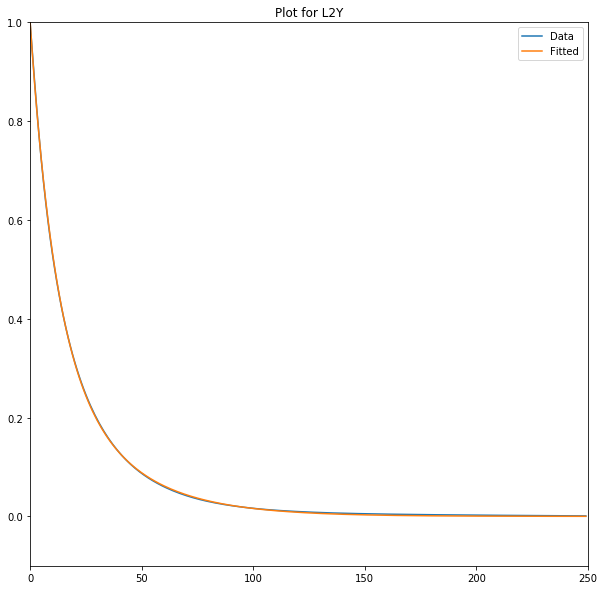

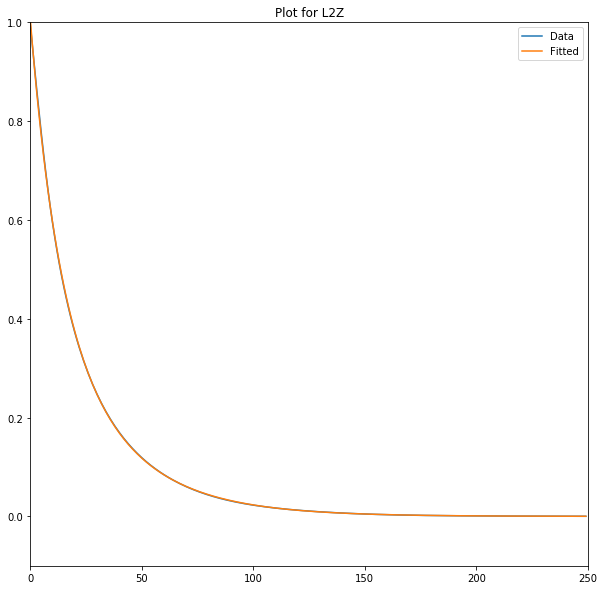

In [11]:
dirs = os.listdir(source_path)
results = []
for cdir in ['5', '13']: 
    dirs.remove(cdir)
    dirs.extend([os.path.join(cdir, d) for d in os.listdir(os.path.join(source_path, cdir))])

for dir_name in dirs:
    if dir_name.startswith('.'):
        continue
    data_path = os.path.join(source_path, dir_name) 
    data = read_data(data_path)
    
    dir_path = os.path.join(data_path, 'results')
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)
    print('Current directory: {}'.format(dir_path))
    for tag in tqdm(data):
        phi = data[tag][0] 
        exp_data = normalization(data, tag=tag)
        n = exp_data.shape[0]

        scores = dict()
        for i in range(100):
#             if tag.startswith('L2'):
#                 result = fit_curve(exp_data, f_exp, get_x0_exp, unpack_exp, bounds_exp, 
#                                    cons_exp, phi=phi)
#             else:
            result = fit_curve(exp_data, f_standard, get_x0_standard,
                               unpack_standard, bounds_standard, 
                               cons_exp)
            scores[result['SSE']] = result

        best = min(scores) 
        result = scores[best]
        result['tag'] = tag
        result['dir_name'] = dir_name
        plot_results(result, tag, dir_path=dir_path)
        results.append(result)

In [12]:
len(results)

192

In [17]:
16 * 4 * 3

192

In [18]:
result.keys()

dict_keys(['x0', 'x', 'SSE', 'exp_data', 'fitted', 'a1', 'a2', 'a3', 'a', 'b', 'c', 'tag', 'dir_name'])

In [28]:
X = []
Y = []
for r in results:
    X.append(np.array(r['x']).reshape(1, -1))
    Y.append('{}_{}'.format(r['dir_name'], r['tag']))
X = np.concatenate(X, axis=0)

In [32]:
import pickle
with open('viz_data.pkl', 'wb') as f:
    pickle.dump((X, Y), f)

In [34]:
with open('data.pkl', 'wb') as f:
    pickle.dump(results, f)